<a href="https://colab.research.google.com/github/fabriziobasso/Colab_backup/blob/main/File_00_Clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<h1 align="center"><font color='#001ddd'> GLUCOSE PREDICTION DATASET**</font></h1>

## **Dataset Description**
The dataset is from a study that collected data from young adults in the UK with type 1 diabetes, who used a continuous glucose monitor (CGM), an insulin pump and a smartwatch. These devices collected blood glucose readings, insulin dosage, carbohydrate intake, and activity data. The data collected was aggregated to five-minute intervals and formatted into samples. Each sample represents a point in time and includes the aggregated five-minute intervals from the previous six hours. The aim is to predict the blood glucose reading an hour into the future, for each of these samples.

The training set takes samples from the first three months of study data from nine of the participants and includes the future blood glucose value. These training samples appear in chronological order and overlap. The testing set takes samples from the remainder of the study period from fifteen of the participants (so unseen participants appear in the testing set). These testing samples do not overlap and are in a random order to avoid data leakage.

**Complexities to be aware of:**

This is medical data so there are missing values and noise in the data
the participants did not all use the same device models (CGM, insulin pump and smartwatch) so there may be differences in the collection method of the data
some participants in the test set do not appear in the training set

In [1]:
%%capture
# Connect to Colab:#
from google.colab import drive
import os
drive.mount('/content/drive')

!pip install category-encoders
!pip install optuna
!pip install optuna-integration
#!pip install scikit-learn==1.4
!pip install catboost
!pip install deeptables

!pip install keras-tuner --upgrade
!pip install keras-nlp
!pip install BorutaShap
!pip install scikit-lego
!!pip install --no-index -U --find-links=/kaggle/input/deeptables-v0-2-5/deeptables-0.2.5 deeptables==0.2.5

In [2]:
folder_script = models_folders = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose"
os.chdir(folder_script)

In [3]:

from category_encoders.cat_boost import CatBoostEncoder
from category_encoders.wrapper import PolynomialWrapper
from category_encoders.count import CountEncoder

# Setup notebook
from pathlib import Path
import ipywidgets as widgets
import pandas as pd
import numpy as np
from pickle import load, dump
import json
import joblib
#import calplot as cal
import missingno as msno
import category_encoders as ce

# Graphic Libraries:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg

# Palette Setup
colors = ['#FB5B68','#FFEB48','#2676A1','#FFBDB0',]
colormap_0 = mpl.colors.LinearSegmentedColormap.from_list("",colors)
palette_1 = sns.color_palette("coolwarm", as_cmap=True)
palette_2 = sns.color_palette("YlOrBr", as_cmap=True)
palette_3 = sns.light_palette("red", as_cmap=True)
palette_4 = sns.color_palette("viridis", as_cmap=True)
palette_5 = sns.color_palette("rocket", as_cmap=True)
palette_6 = sns.color_palette("GnBu", as_cmap=True)
palette_7 = sns.color_palette("tab20c", as_cmap=False)
palette_8 = sns.color_palette("Set2", as_cmap=False)

palette_custom = ['#fbb4ae','#b3cde3','#ccebc5','#decbe4','#fed9a6','#ffffcc','#e5d8bd','#fddaec','#f2f2f2']
palette_9 = sns.color_palette(palette_custom, as_cmap=False)


# Bloomberg
#from xbbg import blp
from catboost import CatBoostRegressor, Pool
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
from xgboost.callback import EarlyStopping

import lightgbm as lgb
from lightgbm import (LGBMRegressor,
                      LGBMClassifier,
                      early_stopping,
                      record_evaluation,
                      log_evaluation)

# Time Management
from tqdm import tqdm
from datetime import date
from datetime import datetime
from pandas.tseries.offsets import BMonthEnd, QuarterEnd
import datetime
from pandas.tseries.offsets import BDay # BDay is business day, not birthday...
import datetime as dt
import click
import glob
import os
import gc
import re
import string

from ipywidgets import AppLayout
from ipywidgets import Dropdown, Layout, HTML, AppLayout, VBox, Label, HBox, BoundedFloatText, interact, Output

#from my_func import *

import optuna
from optuna.integration import TFKerasPruningCallback
from optuna.trial import TrialState
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_contour

os.environ["KERAS_BACKEND"] = "tensorflow"

import tensorflow as tf
import keras
from keras import ops
from keras import layers

from keras.layers import Input, LSTM, Dense, Lambda, RepeatVector, Reshape
from keras.models import Model
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError

from keras.utils import FeatureSpace, plot_model

# Import libraries for Hypertuning
import keras_tuner as kt
from keras_tuner.tuners import RandomSearch, GridSearch, BayesianOptimization

#from my_func import *

# preprocessing modules
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, cross_validate, GroupKFold, GridSearchCV, RepeatedStratifiedKFold, cross_val_predict

from sklearn.preprocessing import (LabelEncoder,
                                   StandardScaler,
                                   MinMaxScaler,
                                   OrdinalEncoder,
                                   RobustScaler,
                                   PowerTransformer,
                                   OneHotEncoder,
                                   LabelEncoder,
                                   QuantileTransformer,
                                   PolynomialFeatures)

# metrics
import sklearn
from sklearn.metrics import (mean_squared_error,
                             root_mean_squared_error,
                             r2_score,
                             mean_absolute_error,
                             mean_absolute_percentage_error,
                             classification_report,
                             confusion_matrix,
                             ConfusionMatrixDisplay,
                             multilabel_confusion_matrix,
                             accuracy_score,
                             roc_auc_score,
                             auc,
                             roc_curve,
                             log_loss,
                             make_scorer)

# modeling algos
from sklearn.linear_model import (LogisticRegression,
                                  Lasso,
                                  ridge_regression,
                                  LinearRegression,
                                  Ridge,
                                  RidgeCV,
                                  ElasticNet,
                                  BayesianRidge,
                                  HuberRegressor,
                                  TweedieRegressor,
                                  QuantileRegressor,
                                  ARDRegression,
                                  TheilSenRegressor,
                                  PoissonRegressor,
                                  GammaRegressor)

from sklearn.ensemble import (AdaBoostRegressor,
                              AdaBoostClassifier,
                              RandomForestRegressor,
                              RandomForestClassifier,
                              VotingRegressor,
                              GradientBoostingRegressor,
                              GradientBoostingClassifier,
                              StackingRegressor,
                              HistGradientBoostingClassifier,
                              HistGradientBoostingRegressor,
                              ExtraTreesClassifier)

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import FunctionTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline

import seaborn as sns
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

from sklearn.multioutput import RegressorChain
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor

import itertools
import warnings
import logging
from openpyxl import load_workbook

import statsmodels.api as sm
from pylab import rcParams
import scipy.stats as ss

warnings.filterwarnings('ignore')
#plt.style.use('fivethirtyeight')

# Setting rc parameters in seaborn for plots and graphs-
# Reference - https://matplotlib.org/stable/tutorials/introductory/customizing.html:-
# To alter this, refer to matplotlib.rcParams.keys()

sns.set({"axes.facecolor"       : "#ffffff",
         "figure.facecolor"     : "#ffffff",
         "axes.edgecolor"       : "#000000",
         "grid.color"           : "#ffffff",
         "font.family"          : ['Cambria'],
         "axes.labelcolor"      : "#000000",
         "xtick.color"          : "#000000",
         "ytick.color"          : "#000000",
         "grid.linewidth"       : 0.5,
         'grid.alpha'           :0.5,
         "grid.linestyle"       : "--",
         "axes.titlecolor"      : 'black',
         'axes.titlesize'       : 12,
         'axes.labelweight'     : "bold",
         'legend.fontsize'      : 7.0,
         'legend.title_fontsize': 7.0,
         'font.size'            : 7.5,
         'xtick.labelsize'      : 7.5,
         'ytick.labelsize'      : 7.5,
        });

sns.set_style("whitegrid",{"grid.linestyle":"--", 'grid.linewidth':0.2, 'grid.alpha':0.5})
# Set Style
mpl.rcParams['figure.dpi'] = 120;

# Making sklearn pipeline outputs as dataframe:-
pd.set_option('display.max_columns', 100);
pd.set_option('display.max_rows', 50);

sns.despine(left=True, bottom=True, top=False, right=False)

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


<Figure size 960x660 with 0 Axes>

## 1.0 Functions:

In [4]:
def encode_target(y_train, y_test, encoder_type='label', enc_strategy=False):
    """
    Encodes the target columns in the training and testing data
    using the specified encoder type.

    Parameters:
    y_train (pd.Series or pd.DataFrame): Training target data.
    y_test (pd.Series or pd.DataFrame): Testing target data.

    Returns:
    y_train_encoded (pd.Series): Encoded training target data.
    y_test_encoded (pd.Series): Encoded testing target data.
    """

    if encoder_type == 'label':
        encoder = LabelEncoder()
        y_train_encoded = encoder.fit_transform(y_train)
        y_test_encoded = encoder.transform(y_test)

        y_train_encoded = pd.Series(y_train_encoded, index=y_train.index, name="Target")
        y_test_encoded = pd.Series(y_test_encoded, index=y_test.index, name="Target")


    elif encoder_type == 'onehot':
        y_train_ = y_train.values.reshape(-1, 1)
        y_test_ = y_test.values.reshape(-1, 1)

        encoder = OneHotEncoder(sparse_output=False)
        y_train_encoded = encoder.fit_transform(y_train_)
        y_test_encoded = encoder.transform(y_test_)

        y_train_encoded = pd.DataFrame(y_train_encoded, index=y_train.index)
        y_test_encoded = pd.DataFrame(y_test_encoded, index=y_test.index)

    else:
        raise ValueError("Invalid encoder_type. Currently supported: 'label'.")

    if enc_strategy:
        return y_train_encoded, y_test_encoded, encoder

    else:
        return y_train_encoded, y_test_encoded

def encode_data(X_train, X_test, encoder_type='label', columns=None, map=None):
    """
    Encodes the training and testing data using the specified encoder type.

    Parameters:
    X_train (pd.DataFrame): Training data.
    X_test (pd.DataFrame): Testing data.
    encoder_type (str): Type of encoder ('label' or 'onehot'). Default is 'label'.
    columns (list): List of columns to encode. If None, all object type columns are encoded.

    Returns:
    X_train_encoded (pd.DataFrame): Encoded training data.
    X_test_encoded (pd.DataFrame): Encoded testing data.
    """

    if columns is None:
        # Default to all object type columns if no columns are specified
        columns = X_train.select_dtypes(include=['object']).columns.tolist()

    X_train_encoded = X_train.copy()
    X_test_encoded = X_test.copy()

    if encoder_type == 'label':
        for col in columns:
            le = LabelEncoder()
            X_train_encoded[col] = le.fit_transform(X_train[col])
            X_test_encoded[col] = le.transform(X_test[col])

    elif encoder_type == 'onehot':
        for col in columns:
            ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first')
            # Fit the encoder on the training data and transform both training and test data
            encoded_train = ohe.fit_transform(X_train[[col]])
            encoded_test = ohe.transform(X_test[[col]])

            # Create a DataFrame with the encoded data
            encoded_train_df = pd.DataFrame(encoded_train, columns=ohe.get_feature_names_out([col]))
            encoded_test_df = pd.DataFrame(encoded_test, columns=ohe.get_feature_names_out([col]))

            # Concatenate the new columns to the original dataframes and drop the original columns
            X_train_encoded = pd.concat([X_train_encoded.drop(col, axis=1), encoded_train_df], axis=1)
            X_test_encoded = pd.concat([X_test_encoded.drop(col, axis=1), encoded_test_df], axis=1)

    elif encoder_type == 'count_encoder':

          for col in columns:

                target_encoder = CountEncoder(cols=columns)
                X_train_encoded = target_encoder.fit_transform(X_train_encoded)
                X_test_encoded = target_encoder.transform(X_test_encoded)

    else:
        raise ValueError("Invalid encoder_type. Currently supported: 'label', 'onehot', 'target_encoder'.")

    return X_train_encoded, X_test_encoded

## **Importing the Dataset**

## **Files**
* activities.txt - a list of activity names that appear in the activity-X:XX columns
* sample_submission.csv - a sample submission file in the correct format
* test.csv - the test set
* train.csv - the training set

## **Columns**
* train.csv:
    * **id - row id** consisting of participant number and a count for that participant
    * **p_num** - participant number
    * **time** - time of day in the format HH:MM:SS
    * **bg-X:XX** - blood glucose reading in mmol/L, X:XX(H:SS) time in the past (e.g. bg-2:35, would be the blood glucose reading from 2 hours and 35 minutes before the time value for that row), recorded by the continuous glucose monitor
    * **insulin-X:XX** - total insulin dose received in units in the last 5 minutes, X:XX(H:SS) time in the past (e.g. insulin-2:35, would be the total insulin dose received between 2 hours and 40 minutes and 2 hours and 35 minutes before the time value for that row), recorded by the insulin pump
    * **carbs-X:XX** - total carbohydrate value consumed in grammes in the last 5 minutes, X:XX(H:SS) time in the past (e.g. carbs-2:35, would be the total carbohydrate value consumed between 2 hours and 40 minutes and 2 hours and 35 minutes before the time value for that row), recorded by the participant
    * **hr-X:XX** - mean heart rate in beats per minute in the last 5 minutes, X:XX(H:SS) time in the past (e.g. hr-2:35, would be the mean heart rate between 2 hours and 40 minutes and 2 hours and 35 minutes before the time value for that row), recorded by the smartwatch
    * **steps-X:XX** - total steps walked in the last 5 minutes, X:XX(H:SS) time in the past (e.g. * steps-2:35, would be the total steps walked between 2 hours and 40 minutes and 2 hours and 35 minutes before the time value for that row), recorded by the smartwatch
    * **cals-X:XX** - total calories burnt in the last 5 minutes, X:XX(H:SS) time in the past (e.g. cals-2:35, would be the total calories burned between 2 hours and 40 minutes and 2 hours and 35 minutes before the time value for that row), calculated by the smartwatch
    * **activity-X:XX** - self-declared activity performed in the last 5 minutes, X:XX(H:SS) time in the past (e.g. activity-2:35, would show a string name of the activity performed between 2 hours and 40 minutes and 2 hours and 35 minutes before the time value for that row), set on the smartwatch
    * **bg+1:00** - blood glucose reading in mmol/L an hour in the future, this is the value you will be predicting (not provided in test.csv)

In [5]:
df_train=pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/X_train_scaled.csv", index_col=0)
df_test=pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/X_test_scaled.csv", index_col=0)

df_test.shape

(3644, 652)

In [6]:
df_train.p_num.unique()

array(['p01', 'p02', 'p03', 'p04', 'p05', 'p06', 'p10', 'p11', 'p12'],
      dtype=object)

In [7]:
df_train.head(5)

p_num  hour  minute  obv_n  brake-5:55  brake-5:50  brake-5:45  \
id                                                                     
p01_0   p01     6      10    0.0   -1.157431   -1.143185   -1.169954   
p01_1   p01     6      25    1.0   -1.118211   -1.142661   -1.155765   
p01_2   p01     6      40    2.0   -1.064244   -1.091012   -1.134496   
p01_3   p01     6      55    3.0   -1.081109   -1.106353   -1.123390   
p01_4   p01     7      10    4.0   -1.023167   -1.062014   -1.104278   

       brake-5:40  brake-5:35  brake-5:30  brake-5:25  brake-5:20  brake-5:15  \
id                                                                              
p01_0   -1.207103   -1.245293   -1.272997   -1.301345   -1.334866   -1.370234   
p01_1   -1.184454   -1.219376   -1.257748   -1.294172   -1.330247   -1.358414   
p01_2   -1.173724   -1.212690   -1.241066   -1.271696   -1.304910   -1.337880   
p01_3   -1.150911   -1.187392   -1.224852   -1.259297   -1.291313   -1.322548   
p01_4   -1.140611   -1.175523   -1.209045   -1.241753   -1.272413   -1.300604   

       brake-5:10  brake-5:05  brake-5:00  brake-4:55  brake-4:50  brake-4:45  \
id                                                                              
p01_0   -1.397142   -1.430575   -1.454937   -1.477174   -1.498075   -1.523195   
p01_1   -1.383418   -1.407105   -1.435910   -1.462353   -1.484797   -1.502670   
p01_2   -1.367635   -1.394151   -1.415986   -1.437668   -1.456877   -1.480236   
p01_3   -1.347414   -1.368584   -1.394153   -1.416460   -1.432216   -1.442521   
p01_4   -1.326911   -1.346195   -1.360692   -1.375837   -1.390442   -1.405929   

       brake-4:40  brake-4:35  brake-4:30  brake-4:25  brake-4:20  brake-4:15  \
id                                                                              
p01_0   -1.546026   -1.565938   -1.580628   -1.595535   -1.608597   -1.626168   
p01_1   -1.520559   -1.536555   -1.556921   -1.573495   -1.584605   -1.590570   
p01_2   -1.499697   -1.513807   -1.522684   -1.531385   -1.540253   -1.549908   
p01_3   -1.453963   -1.465965   -1.478026   -1.488608   -1.501407   -1.516625   
p01_4   -1.419434   -1.434513   -1.452041   -1.467694   -1.485268   -1.504638   

       brake-4:10  brake-4:05  brake-4:00  brake-3:55  brake-3:50  brake-3:45  \
id                                                                              
p01_0   -1.640264   -1.648749   -1.651859   -1.654809   -1.658605   -1.663082   
p01_1   -1.596059   -1.602269   -1.609212   -1.615286   -1.622093   -1.631938   
p01_2   -1.557957   -1.566461   -1.578233   -1.589580   -1.602311   -1.616730   
p01_3   -1.530403   -1.545966   -1.562654   -1.580411   -1.596375   -1.611569   
p01_4   -1.524026   -1.541700   -1.558858   -1.577663   -1.594845   -1.609278   

       brake-3:40  brake-3:35  brake-3:30  brake-3:25  brake-3:20  brake-3:15  \
id                                                                              
p01_0   -1.666331   -1.670034   -1.677567   -1.684440   -1.693137   -1.704127   
p01_1   -1.641032   -1.651504   -1.664660   -1.678620   -1.690982   -1.702813   
p01_2   -1.632097   -1.646085   -1.659362   -1.674426   -1.687838   -1.698734   
p01_3   -1.628231   -1.643317   -1.655857   -1.670310   -1.682709   -1.696637   
p01_4   -1.624854   -1.639451   -1.655774   -1.669475   -1.685700   -1.698500   

       brake-3:10  brake-3:05  brake-3:00  brake-2:55  brake-2:50  brake-2:45  \
id                                                                              
p01_0   -1.716623   -1.727405   -1.737783   -1.749894   -1.760841   -1.769188   
p01_1   -1.716001   -1.727171   -1.736295   -1.747374   -1.756933   -1.767735   
p01_2   -1.711271   -1.722026   -1.734561   -1.745865   -1.759890   -1.771257   
p01_3   -1.708887   -1.723741   -1.734992   -1.745346   -1.722960   -1.711354   
p01_4   -1.710248   -1.687260   -1.675979   -1.665612   -1.656120   -1.643693   

       brake-2:40  brake-2:35  brake-2:30  brake-2:25  brake-2:20  brake-2:15  \
id          

In [8]:
df_train.head()
df_train.columns

Index(['p_num', 'hour', 'minute', 'obv_n', 'brake-5:55', 'brake-5:50',
       'brake-5:45', 'brake-5:40', 'brake-5:35', 'brake-5:30',
       ...
       'activity-0:40', 'activity-0:35', 'activity-0:30', 'activity-0:25',
       'activity-0:20', 'activity-0:15', 'activity-0:10', 'activity-0:05',
       'activity-0:00', 'bg+1:00'],
      dtype='object', length=653)

In [9]:
df_all = pd.concat([df_train,df_test])

## Group the Data:

Data are scaled in groups.

In [10]:
static_fields = ["p_num","hour","minute","obv_n"] #"id",
target = ["bg+1:00"]
ts_fields = list(df_train.drop(columns=static_fields+target))

In [11]:
target_scaler = StandardScaler()
df_train["bg+1:00"] = target_scaler.fit_transform(df_train[target])

Sub-dataset are created for each main set of features to inpute missing values:

In [12]:
# Select columns containing the word "bg"
bg_col_train = df_train.filter(regex='bg|time|p_num|hour|minute')
bg_col_test = df_test.filter(regex='bg|time|p_num|hour|minute')

hr_col_train = df_train.filter(regex='hr|time|p_num|bg+1:00|hour|minute')
hr_col_test = df_test.filter(regex='hr|time|p_num|bg+1:00|hour|minute')
hr_col_train["bg+1:00"] = df_train["bg+1:00"]

step_col_train = df_train.filter(regex='steps|time|p_num|bg+1:00|hour|minute')
step_col_test = df_test.filter(regex='steps|time|p_num|bg+1:00|hour|minute')
step_col_train["bg+1:00"] = df_train["bg+1:00"]

cal_col_train = df_train.filter(regex='cal|time|p_num|bg+1:00|hour|minute')
cal_col_test = df_test.filter(regex='cal|time|p_num|bg+1:00|hour|minute')
cal_col_train["bg+1:00"] = df_train["bg+1:00"]

act_col_train = df_train.filter(regex='activity|time|p_num|bg+1:00|hour|minute')
act_col_test = df_test.filter(regex='activity|time|p_num|bg+1:00|hour|minute')
act_col_train["bg+1:00"] = df_train["bg+1:00"]

### Outliers

#### Insuline

In [13]:
insulin_col_train = df_train.filter(regex='insulin')
insulin_col_test = df_test.filter(regex='insulin')
#insulin_col_train["bg+1:00"] = df_train["bg+1:00"]

ins_sub = insulin_col_train[['insulin_av-0:25', 'insulin_av-0:20','insulin_av-0:15',
                             'insulin_av-0:10', 'insulin_av-0:05','insulin_av-0:00']]

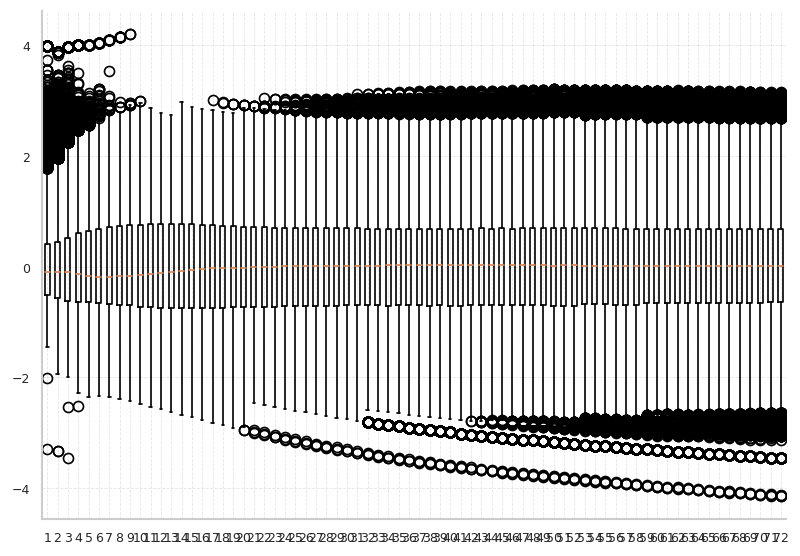

In [14]:
plt.boxplot(insulin_col_train)
plt.show()

The -5 value seems suspicious

In [15]:
all_ins =  ['insulin_av-5:55', 'insulin_av-5:50',
            'insulin_av-5:45', 'insulin_av-5:40', 'insulin_av-5:35',
            'insulin_av-5:30', 'insulin_av-5:25', 'insulin_av-5:20',
            'insulin_av-5:15', 'insulin_av-5:10', 'insulin_av-5:05',
            'insulin_av-5:00', 'insulin_av-4:55', 'insulin_av-4:50',
            'insulin_av-4:45', 'insulin_av-4:40', 'insulin_av-4:35',
            'insulin_av-4:30', 'insulin_av-4:25', 'insulin_av-4:20',
            'insulin_av-4:15', 'insulin_av-4:10', 'insulin_av-4:05',
            'insulin_av-4:00', 'insulin_av-3:55', 'insulin_av-3:50',
            'insulin_av-3:45', 'insulin_av-3:40', 'insulin_av-3:35',
            'insulin_av-3:30', 'insulin_av-3:25', 'insulin_av-3:20',
            'insulin_av-3:15', 'insulin_av-3:10', 'insulin_av-3:05',
            'insulin_av-3:00', 'insulin_av-2:55', 'insulin_av-2:50',
            'insulin_av-2:45', 'insulin_av-2:40', 'insulin_av-2:35',
            'insulin_av-2:30', 'insulin_av-2:25', 'insulin_av-2:20',
            'insulin_av-2:15', 'insulin_av-2:10', 'insulin_av-2:05',
            'insulin_av-2:00', 'insulin_av-1:55', 'insulin_av-1:50',
            'insulin_av-1:45', 'insulin_av-1:40', 'insulin_av-1:35',
            'insulin_av-1:30', 'insulin_av-1:25', 'insulin_av-1:20',
            'insulin_av-1:15', 'insulin_av-1:10', 'insulin_av-1:05',
            'insulin_av-1:00', 'insulin_av-0:55', 'insulin_av-0:50',
            'insulin_av-0:45', 'insulin_av-0:40', 'insulin_av-0:35',
            'insulin_av-0:30', 'insulin_av-0:25', 'insulin_av-0:20',
            'insulin_av-0:15', 'insulin_av-0:10', 'insulin_av-0:05',
            'insulin_av-0:00']

In [16]:
obs_index = set()

for c in all_ins:
  suspicius = insulin_col_train[insulin_col_train[c]==insulin_col_train[all_ins].min().min()]
  new_ind = set(suspicius.index)
  obs_index = obs_index.union(new_ind)

print(len(obs_index))
obs_index = list(obs_index)

1


In [17]:
insulin_col_train.loc[obs_index,all_ins]

insulin_av-5:55  insulin_av-5:50  insulin_av-5:45  insulin_av-5:40  \
id                                                                              
p12_23446        -3.295635         -3.31864        -3.456142        -2.521097   

           insulin_av-5:35  insulin_av-5:30  insulin_av-5:25  insulin_av-5:20  \
id                                                                              
p12_23446        -2.356646        -2.339636        -2.358774        -2.391604   

           insulin_av-5:15  insulin_av-5:10  insulin_av-5:05  insulin_av-5:00  \
id                                                                              
p12_23446         -2.43237        -2.477208        -2.524291        -2.573032   

           insulin_av-4:55  insulin_av-4:50  insulin_av-4:45  insulin_av-4:40  \
id                                                                              
p12_23446        -2.622113        -2.670768        -2.719411         -2.76766   

           insulin_av-4:35  insulin_av-4:30  insulin_av-4:25  insulin_av-4:20  \
id                                                                              
p12_23446        -2.815469         -2.86264        -2.908321         -2.95335   

           insulin_av-4:15  insulin_av-4:10  insulin_av-4:05  insulin_av-4:00  \
id                                                                              
p12_23446        -2.997009        -3.039381        -3.081047        -3.120936   

           insulin_av-3:55  insulin_av-3:50  insulin_av-3:45  insulin_av-3:40  \
id                                                                              
p12_23446        -3.159627        -3.197715        -3.233599        -3.268401   

           insulin_av-3:35  insulin_av-3:30  insulin_av-3:25  insulin_av-3:20  \
id                                                                              
p12_23446        -3.302232        -3.334561        -3.366081        -3.396911   

           insulin_av-3:15  insulin_av-3:10  insulin_av-3:05  insulin_av-3:00  \
id                                                                              
p12_23446         -3.42628        -3.454827        -3.482472        -3.509036   

           insulin_av-2:55  insulin_av-2:50  insulin_av-2:45  insulin_av-2:40  \
id                                                                              
p12_23446        -3.534875        -3.560099        -3.584574        -3.608084   

           insulin_av-2:35  insulin_av-2:30  insulin_av-2:25  insulin_av-2:20  \
id                                                                              
p12_23446        -3.631033        -3.653321        -3.674925        -3.695803   

           insulin_av-2:15  insulin_av-2:10  insulin_av-2:05  insulin_av-2:00  \
id                                                                              
p12_23446        -3.715945        -3.735894         -3.75513        -3.774261   

           insulin_av-1:55  insulin_av-1:50  insulin_av-1:45  insulin_av-1:40  \
id                                                                              
p12_23446        -3.792324        -3.810428        -3.828386        -3.845782   

           insulin_av-1:35  insulin_av-1:30  insulin_av-1:25  insulin_av-1:20  \
id                                                                              
p12_23446        -3.862812        -3.879737         -3.89633        -3.912664   

           insulin_av-1:15  insulin_av-1:10  insulin_av-1:05  insulin_av-1:00  \
id                                                                              
p12_23446        -3.928919        -3.944828        -3.960302        -3.975789   

           insulin_av-0:55  insulin_av-0:50  insulin_av-0:45  insulin_av-0:40  \
id                                                                              
p12_23446        -3.990841        -4.005467         -4.02025        -4.034582   

           insulin_av-0:35  insulin_av-0:30  insulin_av-0:25  insulin_av-0:20  \
id                        

- The analysis has highlighted some negative values for insuline. As a result the File *File_01_EDA* has been reviewed to remove all the negative values.

#### Carb

In [18]:
carb_col_train = df_train.filter(regex='carbs')
carb_col_test = df_test.filter(regex='carbs')
#carb_col_train["bg+1:00"] = df_train["bg+1:00"]

In [19]:
print(carb_col_train.shape,carb_col_test.shape)

(177024, 72) (3644, 72)


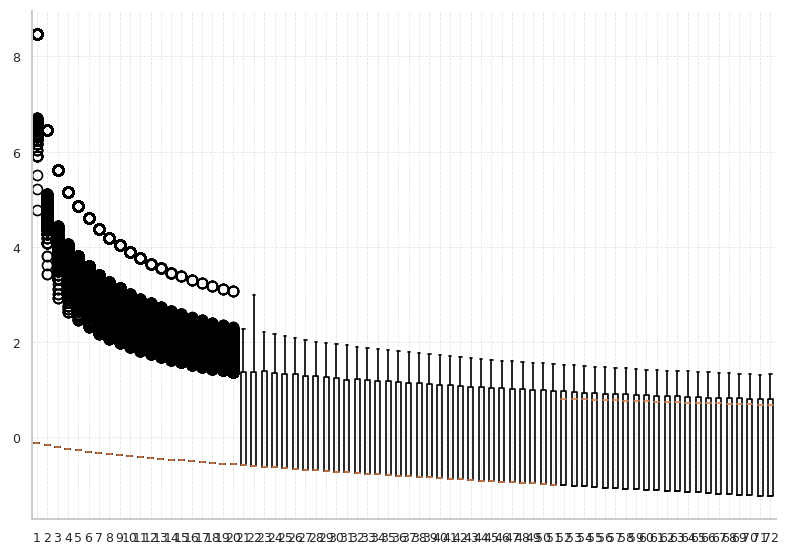

In [20]:
plt.boxplot(carb_col_train)
plt.show()

# Features Engeneering:

In [21]:
insulin_col_train = df_train.filter(regex='insulin|time|p_num|bg+1:00|hour|minute')
insulin_col_test = df_test.filter(regex='insulin|time|p_num|bg+1:00|hour|minute')
insulin_col_train["bg+1:00"] = df_train["bg+1:00"]

In [22]:
ins_subset_train = insulin_col_train[['hour', 'minute','insulin_av-1:00','insulin_av-0:00', 'bg+1:00']].copy()
ins_subset_train["Delta_past"] = ins_subset_train['insulin_av-0:00'] - ins_subset_train['insulin_av-1:00']
#ins_subset_train["Delta_fut"] = ins_subset_train['bg+1:00'] - ins_subset_train['bg-0:00']
ins_subset_train.isnull().sum()

hour               0
minute             0
insulin_av-1:00    0
insulin_av-0:00    0
bg+1:00            0
Delta_past         0
dtype: int64

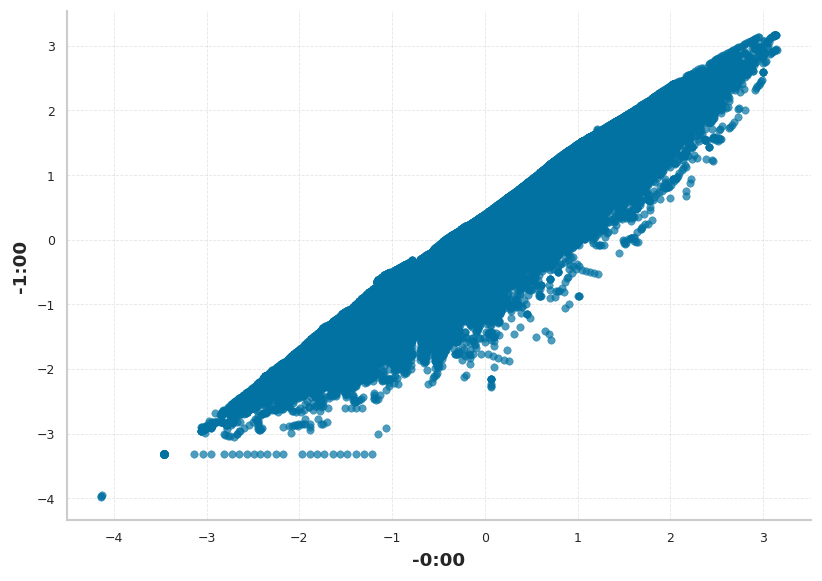

In [23]:
ins_subset_train.plot(kind="scatter",x="insulin_av-0:00",y="insulin_av-1:00",alpha=0.7)
plt.xlabel("-0:00")
plt.ylabel("-1:00")
plt.show()

## **CLUSTERS**

In [24]:
cols = ['bg-5:55', 'bg-5:50', 'bg-5:45', 'bg-5:40','bg-5:35', 'bg-5:30',
        'bg-5:25', 'bg-5:20', 'bg-5:15', 'bg-5:10','bg-5:05', 'bg-5:00',
        'bg-4:55', 'bg-4:50', 'bg-4:45', 'bg-4:40','bg-4:35', 'bg-4:30',
        'bg-4:25', 'bg-4:20', 'bg-4:15', 'bg-4:10','bg-4:05', 'bg-4:00',
        'bg-3:55', 'bg-3:50', 'bg-3:45', 'bg-3:40','bg-3:35', 'bg-3:30',
        'bg-3:25', 'bg-3:20', 'bg-3:15', 'bg-3:10','bg-3:05', 'bg-3:00',
        'bg-2:55', 'bg-2:50', 'bg-2:45', 'bg-2:40','bg-2:35', 'bg-2:30',
        'bg-2:25', 'bg-2:20', 'bg-2:15', 'bg-2:10','bg-2:05', 'bg-2:00',
        'bg-1:55', 'bg-1:50', 'bg-1:45', 'bg-1:40','bg-1:35', 'bg-1:30',
        'bg-1:25', 'bg-1:20', 'bg-1:15', 'bg-1:10','bg-1:05', 'bg-1:00',
        'bg-0:55', 'bg-0:50', 'bg-0:45', 'bg-0:40','bg-0:35', 'bg-0:30',
        'bg-0:25', 'bg-0:20', 'bg-0:15', 'bg-0:10','bg-0:05', 'bg-0:00']

# Train dataframe:
bg_col_train["mean_bg"] = bg_col_train[cols].mean(axis=1)
bg_col_train["std_bg"] = bg_col_train[cols].std(axis=1)
bg_col_train["med_bg"] = bg_col_train[cols].median(axis=1)
bg_col_train["skew_bg"] = bg_col_train[cols].skew(axis=1)
bg_col_train["curtosis_bg"] = bg_col_train[cols].kurtosis(axis=1)
# test dataframe:
bg_col_test["mean_bg"] = bg_col_test[cols].mean(axis=1)
bg_col_test["std_bg"] = bg_col_test[cols].std(axis=1)
bg_col_test["med_bg"] = bg_col_test[cols].median(axis=1)
bg_col_test["skew_bg"] = bg_col_test[cols].skew(axis=1)
bg_col_test["curtosis_bg"] = bg_col_test[cols].kurtosis(axis=1)

# Select Relevant Features
cluster_df_train = bg_col_train[["mean_bg","std_bg","skew_bg","curtosis_bg"]].copy()
cluster_df_test = bg_col_test[["mean_bg","std_bg","skew_bg","curtosis_bg"]].copy()

scaler = StandardScaler()
cluster_df_train = pd.DataFrame(scaler.fit_transform(cluster_df_train), columns=cluster_df_train.columns, index=cluster_df_train.index)
cluster_df_test = pd.DataFrame(scaler.transform(cluster_df_test), columns=cluster_df_test.columns, index=cluster_df_test.index)

In [25]:
cluster_df_train.sample(5)

mean_bg    std_bg   skew_bg  curtosis_bg
id                                                  
p03_11815  0.935339  1.148504  0.013463    -0.855767
p11_13236  1.303689  0.750689 -0.602727    -0.363495
p02_18917  0.407112 -0.030223 -0.572118    -0.384111
p04_22629  0.035400 -0.633683 -0.513646    -0.196687
p04_8723   0.158712 -0.752499  0.205271    -0.312926

#### K-Means

In [26]:
# # extra code – this cell generates and saves Figure 9–8

# kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(cluster_df_train)
#                 for k in range(1, 10)]
# inertias = [model.inertia_ for model in kmeans_per_k]

# plt.figure(figsize=(8, 3.5))
# plt.plot(range(1, 10), inertias, "bo-")
# plt.xlabel("$k$")
# plt.ylabel("Inertia")
# plt.show()

#### BayesianGaussianMixture

In [27]:
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture
from sklearn.metrics import silhouette_score

#gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(cluster_df_train)
#             for k in range(21, 30)]
#bics = [model.bic(cluster_df_train) for model in gms_per_k]
#aics = [model.aic(cluster_df_train) for model in gms_per_k]

In [28]:
# plt.figure(figsize=(8, 3))
# plt.plot(range(21, 30), bics, "bo-", label="BIC")
# plt.plot(range(21, 30), aics, "go--", label="AIC")
# plt.xlabel("$k$")
# plt.ylabel("Information Criterion")
# plt.axis([21, 30.5, min(aics) - 50, max(bics) + 50])
# plt.legend()

# plt.show()

In [29]:
id_train = set(bg_col_train.p_num.unique())
id_test = set(bg_col_test.p_num.unique())

id_train.union(id_test)

{'p01',
 'p02',
 'p03',
 'p04',
 'p05',
 'p06',
 'p10',
 'p11',
 'p12',
 'p15',
 'p16',
 'p18',
 'p19',
 'p21',
 'p22',
 'p24'}

In [30]:
# bgm = GaussianMixture(n_components=22, n_init=10, random_state=42)
# bgm.fit(cluster_df_train)

# df_train["cluster"] = bgm.predict(cluster_df_train)
# df_test["cluster"] = bgm.predict(cluster_df_test)

In [31]:
gc.collect()

49370

In [32]:
# df_train.to_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/train_cluster.csv")
# df_test.to_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/test_cluster.csv")

In [33]:
# df_train.drop(["cluster",	"p_num",	"hour",	"minute",	"obv_n","bg+1:00"], axis=1).mean(axis=0).max(),df_train.drop(["cluster",	"p_num",	"hour",	"minute",	"obv_n","bg+1:00"], axis=1).std(axis=0).max()

In [34]:
# df_train.drop(["cluster",	"p_num",	"hour",	"minute",	"obv_n","bg+1:00"], axis=1).mean(axis=0).min(),df_train.drop(["cluster",	"p_num",	"hour",	"minute",	"obv_n","bg+1:00"], axis=1).std(axis=0).min()

In [35]:
df_train = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/train_cluster.csv", index_col=0)
df_test = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/test_cluster.csv", index_col=0)

display(df_train.sample(3))
display(df_test.sample(3))

p_num  hour  minute    obv_n  brake-5:55  brake-5:50  brake-5:45  \
id                                                                           
p11_5198    p11    12      25   5198.0   -0.118020    0.053707   -0.073508   
p11_14774   p11    23      45  14774.0    1.410585    1.295931    1.191117   
p10_22745   p10     8      30  22745.0   -0.915011   -0.786403   -0.711232   

           brake-5:40  brake-5:35  brake-5:30  brake-5:25  brake-5:20  \
id                                                                      
p11_5198    -0.139105   -0.187598    0.040078   -0.013261    0.077794   
p11_14774    0.950230    0.791752    0.684843    0.608617    0.550511   
p10_22745   -0.680766   -0.677660   -0.681901   -0.693681   -0.715537   

           brake-5:15  brake-5:10  brake-5:05  brake-5:00  brake-4:55  \
id                                                                      
p11_5198     0.103777    0.148287    0.314298    0.350434    0.327500   
p11_14774    0.505069    0.468129    0.437247    0.411066    0.388327   
p10_22745   -0.735103   -0.744566   -0.784177   -0.825285   -0.819355   

           brake-4:50  brake-4:45  brake-4:40  brake-4:35  brake-4:30  \
id                                                                      
p11_5198     0.402546    0.356568    0.315679    0.300017    0.265143   
p11_14774    0.368226    0.350769    0.335241    0.321063    0.308441   
p10_22745   -0.799317   -0.772508   -0.755832   -0.749723   -0.753796   

           brake-4:25  brake-4:20  brake-4:15  brake-4:10  brake-4:05  \
id                                                                      
p11_5198     0.221029    0.345090    0.332771    0.354003    0.433007   
p11_14774    0.296984    0.286249    0.276539    0.267602    0.259089   
p10_22745   -0.808660   -0.812246   -0.815462   -0.818763   -0.874983   

           brake-4:00  brake-3:55  brake-3:50  brake-3:45  brake-3:40  \
id                                                                      
p11_5198     0.420574    0.609251    0.613064    0.601029    0.644843   
p11_14774    0.251399    0.244100    0.237171    0.818141    0.837555   
p10_22745   -0.921092   -0.952531   -0.953988   -0.953299   -0.934391   

           brake-3:35  brake-3:30  brake-3:25  brake-3:20  brake-3:15  \
id                                                                      
p11_5198     0.667179    0.719069    0.680793    0.657498    0.607877   
p11_14774    0.855739    0.873102    0.889568    0.905327    1.439601   
p10_22745   -0.934109   -0.933480   -0.915863   -0.901485   -0.872561   

           brake-3:10  brake-3:05  brake-3:00  brake-2:55  brake-2:50  \
id                                                                      
p11_5198     0.572898    0.520854    0.435674    0.491188    0.476303   
p11_14774    1.442042    1.444420    1.446707    1.449019    1.451383   
p10_22745   -0.837698   -0.842477   -0.879898   -0.915983   -0.933363   

           brake-2:45  brake-2:40  brake-2:35  brake-2:30  brake-2:25  \
id                                                                      
p11_5198     0.571017    0.494258    0.465119    0.551426    0.621755   
p11_14774    1.453542    1.455649    1.457843    1.459736    1.461543   
p10_22745   -0.911600   -0.872840   -0.856419   -0.860414   -0.888191   

           brake-2:20  brake-2:15  brake-2:10  ...  activity-3:35  \
id                                             ...                  
p11_5198     0.660447    0.687632    0.640282  ...      -0.124491   
p11_14774    1.463259    1.464908    1.466565  ...      -0.124491   
p10_22745   -0.908942   -0.924046   -0.955679  ...      -0.124491   

           activity-3:30  activity-3:25  activity-3:20  activity-3:15  \
id                                                                      
p11_5198       -0.123929      -0.124277      -0.124772      -0.124141   
p11_14774      -0.123929      -0.124277      -0.124772      -0.124141   
p10_22745      -0.123929      -0.124277      -0.12477

p_num  hour  minute    obv_n  brake-5:55  brake-5:50  brake-5:45  \
id                                                                           
p22_43      p22     7       0     43.0   -0.745118   -0.852162   -1.110454   
p04_24703   p04    20      45  24703.0   -0.849157   -0.880876   -0.918874   
p22_81      p22    10      10     81.0   -0.686652   -0.505568   -0.616173   

           brake-5:40  brake-5:35  brake-5:30  brake-5:25  brake-5:20  \
id                                                                      
p22_43      -1.256452   -1.346791   -1.411533   -1.432113   -1.422119   
p04_24703   -0.951519   -0.969879   -0.952358    0.453888    0.307639   
p22_81      -0.728691   -0.809565   -0.908455   -0.957021   -0.996970   

           brake-5:15  brake-5:10  brake-5:05  brake-5:00  brake-4:55  \
id                                                                      
p22_43      -1.428271   -1.465462   -1.425957   -1.325086   -1.206129   
p04_24703    1.513532    1.408059    1.279828    1.156867    1.037325   
p22_81      -1.036118   -1.046311   -1.039453   -1.037130   -1.039020   

           brake-4:50  brake-4:45  brake-4:40  brake-4:35  brake-4:30  \
id                                                                      
p22_43      -1.110940   -1.037193   -0.972307   -0.913291   -0.874776   
p04_24703    1.711715    1.622201    1.539371    1.457642    1.376179   
p22_81      -1.048190   -1.035705   -1.079466   -1.105866   -1.138687   

           brake-4:25  brake-4:20  brake-4:15  brake-4:10  brake-4:05  \
id                                                                      
p22_43      -0.854985   -0.850445   -0.854660   -0.868631   -0.896668   
p04_24703    1.297547    1.216168    1.136211    1.059990    1.021215   
p22_81      -1.170763   -1.201232   -1.229720   -1.256708   -1.304128   

           brake-4:00  brake-3:55  brake-3:50  brake-3:45  brake-3:40  \
id                                                                      
p22_43      -0.928381   -0.959655   -0.993427   -1.025449   -1.061476   
p04_24703    0.950970    0.882999    0.819989    0.760233    0.704977   
p22_81      -1.360805   -1.385756   -1.438063   -1.424018   -1.392660   

           brake-3:35  brake-3:30  brake-3:25  brake-3:20  brake-3:15  \
id                                                                      
p22_43      -1.113281   -1.177757   -1.226601   -1.267454   -1.294415   
p04_24703    0.651781    0.601576    0.553605    0.507982    0.464542   
p22_81      -1.381808   -1.390886   -1.400339   -1.388394   -1.362241   

           brake-3:10  brake-3:05  brake-3:00  brake-2:55  brake-2:50  \
id                                                                      
p22_43      -1.317208   -1.354317   -1.398217   -1.439396   -1.478929   
p04_24703    0.422739    0.381917    0.342679    0.305088    0.268814   
p22_81      -1.333862   -1.287008   -1.309195   -1.331005   -1.364861   

           brake-2:45  brake-2:40  brake-2:35  brake-2:30  brake-2:25  \
id                                                                      
p22_43      -1.513843   -1.529373   -1.517176   -1.491957   -1.469749   
p04_24703    0.233518    0.198534    0.163948    0.130225    0.096639   
p22_81      -1.382681   -1.360949   -1.329521   -1.300912   -1.302873   

           brake-2:20  brake-2:15  brake-2:10  ...  activity-3:40  \
id                                             ...                  
p22_43      -1.455955   -1.453385   -1.461448  ...      -0.124062   
p04_24703   -0.030674   -0.065903   -0.102213  ...      -0.124062   
p22_81      -1.316982   -1.293289   -1.343758  ...      -0.124062   

           activity-3:35  activity-3:30  activity-3:25  activity-3:20  \
id                                                                      
p22_43         -0.124491      -0.123929      -0.124277      -0.124772   
p04_24703      -0.124491      -0.123929      -0.124277      -0.124772   
p22_81         -0.124491      -0.123929      -0.12427

## PCA Based Clusters:

In [36]:
cols_bg = ['bg-5:55', 'bg-5:50', 'bg-5:45', 'bg-5:40','bg-5:35', 'bg-5:30',
           'bg-5:25', 'bg-5:20', 'bg-5:15', 'bg-5:10','bg-5:05', 'bg-5:00',
           'bg-4:55', 'bg-4:50', 'bg-4:45', 'bg-4:40','bg-4:35', 'bg-4:30',
           'bg-4:25', 'bg-4:20', 'bg-4:15', 'bg-4:10','bg-4:05', 'bg-4:00',
           'bg-3:55', 'bg-3:50', 'bg-3:45', 'bg-3:40','bg-3:35', 'bg-3:30',
           'bg-3:25', 'bg-3:20', 'bg-3:15', 'bg-3:10','bg-3:05', 'bg-3:00',
           'bg-2:55', 'bg-2:50', 'bg-2:45', 'bg-2:40','bg-2:35', 'bg-2:30',
           'bg-2:25', 'bg-2:20', 'bg-2:15', 'bg-2:10','bg-2:05', 'bg-2:00',
           'bg-1:55', 'bg-1:50', 'bg-1:45', 'bg-1:40','bg-1:35', 'bg-1:30',
           'bg-1:25', 'bg-1:20', 'bg-1:15', 'bg-1:10','bg-1:05', 'bg-1:00',
           'bg-0:55', 'bg-0:50', 'bg-0:45', 'bg-0:40','bg-0:35', 'bg-0:30',
           'bg-0:25', 'bg-0:20', 'bg-0:15', 'bg-0:10','bg-0:05', 'bg-0:00']

gc.collect()

0

In [37]:
# pca = PCA(n_components=4)

# train_pca_df = df_train[cols_bg]
# test_pca_df = df_test[cols_bg]

# train_pca_df_ = pca.fit_transform(train_pca_df)
# test_pca_df_ = pca.transform(test_pca_df)

In [38]:
# print("Explained Variance: {} - {}".format(np.sum(pca.explained_variance_ratio_),pca.explained_variance_ratio_))

# cols_df = ["PC_{}".format(i) for i in range(1, len(pca.explained_variance_ratio_) + 1)]
# bg_pca_train = pd.DataFrame(train_pca_df_, columns=cols_df, index=train_pca_df.index)
# bg_pca_test = pd.DataFrame(test_pca_df_, columns=cols_df, index=test_pca_df.index)

# bg_pca_train["bg+1:00"] = df_train["bg+1:00"]
# train_pca_df["bg+1:00"] = df_train["bg+1:00"]

* **Check Correlation:**

In [39]:
# fig, axs = plt.subplots(1, 2, figsize=(12, 3))

# train_pca_df.corr()["bg+1:00"][:-1].plot(ax=axs[0])
# bg_pca_train.corr()["bg+1:00"][:-1].plot(ax=axs[1])

In [40]:
# fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# sns.scatterplot(data=bg_pca_train, x="PC_1", y="PC_3", ax=axs[0], hue="bg+1:00")
# sns.histplot(data=bg_pca_train, x="bg+1:00", ax=axs[1])

# plt.show()

In [41]:
# cluster_df_train = bg_pca_train.drop("bg+1:00", axis=1).copy()

In [42]:
# kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(cluster_df_train)
#                 for k in range(1, 22)]
# inertias = [model.inertia_ for model in kmeans_per_k]

In [43]:
# plt.figure(figsize=(8, 3.5))
# plt.plot(range(1, 22), inertias, "bo-")
# plt.xlabel("$k$")
# plt.ylabel("Inertia")
# plt.show()

In [44]:
df_train.shape

(177024, 658)

In [45]:
# bgm = KMeans(n_clusters=4, n_init=10, random_state=42)
# bgm.fit(bg_pca_train.drop("bg+1:00", axis=1))

# df_train["cluster_pca"] = bgm.predict(bg_pca_train.drop("bg+1:00", axis=1))
# df_test["cluster_pca"] = bgm.predict(bg_pca_test)
# df_train.shape, df_test.shape

In [46]:
df_train.groupby(["cluster_pca"])["bg-0:00"].agg(["mean","std","skew","median","count"])

mean       std      skew    median  count
cluster_pca                                               
0.0          0.886169  1.002277  0.509888  0.808524  35374
1.0         -0.428165  0.672572  0.918566 -0.526139  88452
2.0         -0.174162  0.758258  0.648089 -0.259206  39148
3.0          0.949668  1.226025  0.577376  0.775158  14050

In [47]:
# df_train = pd.concat([df_train,bg_pca_train.loc[:,["PC_1",	"PC_2",	"PC_3"]]], axis=1)
# df_test = pd.concat([df_test,bg_pca_test.loc[:,["PC_1",	"PC_2",	"PC_3"]]], axis=1)
# df_train.head()

In [48]:
df_train.groupby(["cluster_pca","p_num"])["p_num"].agg(["count"])

count
cluster_pca p_num       
0.0         p01     1914
            p02     7470
            p03     6161
            p04     4262
            p05     1632
            p06     1801
            p10      787
            p11     7735
            p12     3612
1.0         p01     3248
            p02     6918
            p03    11069
            p04    15202
            p05     4025
            p06     3475
            p10    23630
            p11     5110
            p12    15775
2.0         p01     1889
            p02     8372
            p03     6533
            p04     4890
            p05     1913
            p06     1873
            p10      979
            p11     8467
            p12     4232
3.0         p01     1408
            p02     3112
            p03     2265
            p04      332
            p05      718
            p06     1234
            p10       58
            p11     3243
            p12     1680

In [49]:
df_train.shape,df_test.shape

((177024, 658), (3644, 657))

In [50]:
# df_train_final = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/train_cluster_enc_final.csv", index_col=0)
# df_test_final = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/test_cluster_enc_final.csv", index_col=0)

## Encoder Based Clusters:

In [ ]:
X_enc = df_train[["p_num","obv_n"]+cols_bg]
y_enc = df_train["bg+1:00"]
X_enc_test = df_test[cols_bg]
X_enc.shape

(177024, 74)

In [ ]:
X_enc.isnull().sum().sum(), y_enc.isna().sum()
#y_enc[:10]

(0, 0)

In [ ]:
p1_val = list(X_enc[(X_enc["p_num"]=="p01")&(X_enc["obv_n"]>=7600)].index)
p2_val = list(X_enc[(X_enc["p_num"]=="p02")&(X_enc["obv_n"]>=22500)].index)
p3_val = list(X_enc[(X_enc["p_num"]=="p03")&(X_enc["obv_n"]>=23000)].index)
p4_val = list(X_enc[(X_enc["p_num"]=="p04")&(X_enc["obv_n"]>=22000)].index)
p5_val = list(X_enc[(X_enc["p_num"]=="p05")&(X_enc["obv_n"]>=7600)].index)
p6_val = list(X_enc[(X_enc["p_num"]=="p06")&(X_enc["obv_n"]>=7600)].index)
p10_val = list(X_enc[(X_enc["p_num"]=="p10")&(X_enc["obv_n"]>=22500)].index)
p11_val = list(X_enc[(X_enc["p_num"]=="p11")&(X_enc["obv_n"]>=22000)].index)
p12_val = list(X_enc[(X_enc["p_num"]=="p12")&(X_enc["obv_n"]>=22500)].index)

matrix_val = p1_val+p2_val+p3_val+p4_val+p5_val+p6_val+p10_val+p11_val+p12_val
len(matrix_val)/X_enc.shape[0]

X_enc_train = X_enc.drop(matrix_val)
X_enc_valid = X_enc.loc[matrix_val]

y_enc_train = y_enc.drop(matrix_val)
y_enc_valid = y_enc.loc[matrix_val]

X_enc_train.drop(["p_num","obv_n"], axis=1, inplace=True)
X_enc_valid.drop(["p_num","obv_n"], axis=1, inplace=True)
X_enc.drop(["p_num","obv_n"], axis=1, inplace=True)

X_enc_train.shape, X_enc_valid.shape, X_enc.shape, y_enc_train.shape, y_enc_valid.shape, y_enc.shape

((157300, 72), (19724, 72), (177024, 72), (157300,), (19724,), (177024,))

In [ ]:
# Assuming your data is in a NumPy array called 'data'
train = X_enc_train.values.reshape((-1, 72, 1))  # Reshape for LSTM
valid = X_enc_valid.values.reshape((-1, 72, 1))
X_enc = X_enc.values.reshape((-1, 72, 1))
X_enc_test = X_enc_test.values.reshape((-1, 72, 1))

y_enc_train = y_enc_train.values.reshape((-1, 1))
y_enc_valid = y_enc_valid.values.reshape((-1, 1))

#### MODEL 1

In [ ]:
def model_autoencoder_v1():
  input_dim = 72
  latent_vec_dim = 2

  # 2. Build the autoencoder model
  input_ts = keras.Input(shape=(input_dim, 1))

  # Encoder
#  x = layers.LSTM(64, activation='relu', return_sequences=True)(input_ts)
  x = layers.LSTM(32, return_sequences=True)(input_ts) #(x)
  x = layers.LSTM(16)(x)
  encoded = layers.Dense(latent_vec_dim, activation='linear', kernel_regularizer = tf.keras.regularizers.L2(l2=0.1))(x)

  output_1 = Dense(1, activation='linear', name="Class_Output")(encoded)

  #encoder = encoded

  # Decoder
  x = layers.RepeatVector(72)(encoded)
  x = layers.LSTM(16, return_sequences=True)(x)
  x = layers.LSTM(32)(x) #, return_sequences=True
#  x = layers.LSTM(64, activation='relu', return_sequences=True)(x)

  decoded = layers.Dense(1)(x)

  # Connect both encoder and decoder
  autoencoder_mult = Model(inputs = input_ts, outputs = [decoded, output_1], name="Deep_Autoencoder")

  # Latent representation (Optional)
  latent_model = Model(input_ts, encoded)

  return autoencoder_mult, latent_model

In [ ]:
autoencoder_prellin_v1, latent_model_prellin_v1 = model_autoencoder_v1()

# Get summary
autoencoder_prellin_v1.summary()

Model: "Deep_Autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 72, 1)          │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ (None, 72, 32)         │          4,352 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_1 (LSTM)             │ (None, 16)             │          3,136 │ lstm[0][0]             │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 2)              │             34 │ lstm_1[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ repeat_vector             │ (None, 72, 2)          │              0 │ dense[0][0]            │
│ (RepeatVector)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_2 (LSTM)             │ (None, 72, 16)         │          1,216 │ repeat_vector[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_3 (LSTM)             │ (None, 32)             │          6,272 │ lstm_2[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 1)              │             33 │ lstm_3[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Class_Output (Dense)      │ (None, 1)              │              3 │ dense[0][0]            │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 15,046 (58.77 KB)

 Trainable params: 15,046 (58.77 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
lr = keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                        factor=0.75,
                        patience=10,
                        verbose=1,
                        mode="min")

early_stop = keras.callbacks.EarlyStopping(monitor="val_loss",
                            patience=25,
                            verbose=1,
                            mode="min",
                            restore_best_weights=True)


checkpoint_filepath = '/checkpoint/best_weights_v1.weights.h5'

Checkpoint = keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                 save_weights_only=True,
                                                 monitor="val_loss",
                                                 mode='min')

In [ ]:
# Compile the autoencoder model
optimizer = keras.optimizers.Adam(learning_rate=0.0005)
loss_0 = 'mse'
loss_1 = 'mse'

autoencoder_prellin_v1.compile(loss=[loss_0, loss_1], loss_weights=[0.75,0.25], optimizer=optimizer)

# Train the autoencoder with MNIST data
history_prellin_v1 = autoencoder_prellin_v1.fit(train, [train, y_enc_train], epochs=120, batch_size=256, callbacks = [early_stop, Checkpoint, lr],
                                                 shuffle=True, validation_data=(valid, [valid, y_enc_valid]))

Epoch 1/120
615/615 ━━━━━━━━━━━━━━━━━━━━ 16s 18ms/step - loss: 0.9006 - val_loss: 0.6338 - learning_rate: 5.0000e-04
Epoch 2/120
615/615 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - loss: 0.5488 - val_loss: 0.5747 - learning_rate: 5.0000e-04
Epoch 3/120
615/615 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - loss: 0.5089 - val_loss: 0.5543 - learning_rate: 5.0000e-04
Epoch 4/120
615/615 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - loss: 0.4953 - val_loss: 0.5428 - learning_rate: 5.0000e-04
Epoch 5/120
615/615 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - loss: 0.4861 - val_loss: 0.5391 - learning_rate: 5.0000e-04
Epoch 6/120
615/615 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - loss: 0.4782 - val_loss: 0.5326 - learning_rate: 5.0000e-04
Epoch 7/120
615/615 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - loss: 0.4791 - val_loss: 0.5294 - learning_rate: 5.0000e-04
Epoch 8/120
615/615 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - loss: 0.4731 - val_loss: 0.5271 - learning_rate: 5.0000e-04
Epoch 9/120
615/615 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - loss: 0

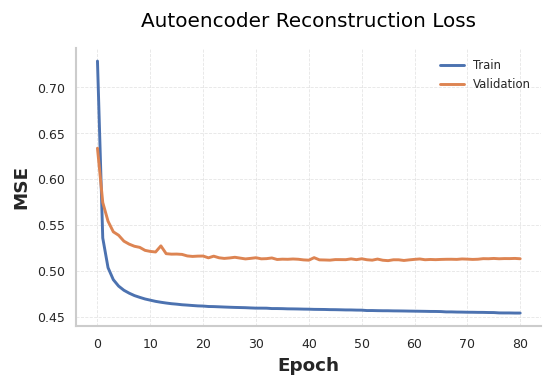

In [ ]:
# Plot training and validation loss scores
# against the number of epochs.
plt.figure(figsize=(5, 3))
plt.plot(history_prellin_v1.history['loss'], label='Train')
plt.plot(history_prellin_v1.history['val_loss'], label='Validation')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')

In [ ]:
latent_representation_v1 = latent_model_prellin_v1.predict(valid)
latent_representation_train_v1 = latent_model_prellin_v1.predict(train)

617/617 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
4916/4916 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step


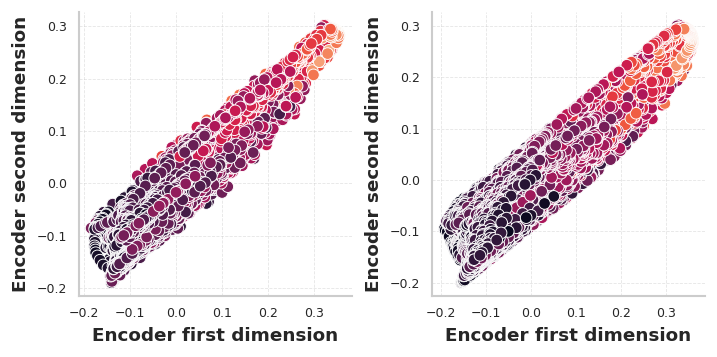

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(6, 3))

sns.scatterplot(x=latent_representation_v1[:,0],
                y=latent_representation_v1[:,1],
                c=y_enc_valid,
                palette='tab10',
                ax=axs[0])

sns.scatterplot(x=latent_representation_train_v1[:,0],
                y=latent_representation_train_v1[:,1],
                c=y_enc_train,
                palette='tab10',
                ax=axs[1]
                )

axs[0].set_xlabel("Encoder first dimension")
axs[0].set_ylabel("Encoder second dimension")

axs[1].set_xlabel("Encoder first dimension")
axs[1].set_ylabel("Encoder second dimension")

axs[0].grid(linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [ ]:
latent_representation_v1_final = latent_model_prellin_v1.predict(X_enc)
latent_representation_v1_final_test = latent_model_prellin_v1.predict(X_enc_test)

5532/5532 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
X_enc.shape

(177024, 72, 1)

In [ ]:
#latent_representation_v2_final

In [ ]:
model_version=1
for i in range(latent_representation_v1_final.shape[1]):
  df_train["enc_0{}_v{}".format(i, model_version)] = latent_representation_v1_final[:,i]
  df_test["enc_0{}_v{}".format(i, model_version)] = latent_representation_v1_final_test[:,i]

In [ ]:
df_train.isnull().sum().sum(), df_test.isnull().sum().sum(), df_train.shape, df_test.shape

(0, 0, (177024, 660), (3644, 659))

##### STORE ENCODED FEATURES from Model 1:

In [ ]:
#df_train.to_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/train_cluster_enc_v1.csv")
#df_test.to_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/test_cluster_enc_v1.csv")

df_train = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/train_cluster_enc_v1.csv", index_col=0)
df_test = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/test_cluster_enc_v1.csv", index_col=0)

##### Submission Model 1:

In [ ]:
recons, pred = autoencoder_prellin_v1.predict(X_enc_test)
#pred = y_test_pred

114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


In [ ]:
df_train_scaled=pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/X_train_scaled.csv", index_col=0)
df_test.shape

(3644, 659)

In [ ]:
target_scaler = StandardScaler()
target_scaler.fit(df_train_scaled["bg+1:00"].values.reshape(-1, 1))

StandardScaler()

In [ ]:
pred_resc = target_scaler.inverse_transform(pred.reshape(-1,1))

In [ ]:
sub = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/sample_submission.csv")
sub.shape

(3644, 2)

In [ ]:
sub["bg+1:00"] = pred_resc
sub["bg+1:00"]

0        8.974194
1        6.132302
2        6.817282
3       10.412985
4        7.433442
          ...    
3639     6.661324
3640     9.069978
3641     7.291888
3642     8.628159
3643     6.962098
Name: bg+1:00, Length: 3644, dtype: float32

In [ ]:
sub.to_csv(f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/submissions/Submission_val_encoder_v1.csv", index=False)

#### MODEL 2

In [ ]:
def model_autoencoder_v2():
  input_dim = 72
  latent_vec_dim = 3

  # 2. Build the autoencoder model
  input_ts = keras.Input(shape=(input_dim, 1))

  # Encoder
  x = layers.LSTM(64, return_sequences=True)(input_ts)
  x = layers.LSTM(32, return_sequences=True)(input_ts) #(x)
  x = layers.LSTM(16)(x)
  encoded = layers.Dense(latent_vec_dim, activation='linear', kernel_regularizer = tf.keras.regularizers.L2(l2=0.1))(x)

  output_1 = Dense(1, activation='linear', name="Class_Output")(encoded)

  #encoder = encoded

  # Decoder
  x = layers.RepeatVector(72)(encoded)
  x = layers.LSTM(16, return_sequences=True)(x)
  x = layers.LSTM(32, return_sequences=True)(x) #, return_sequences=True
  x = layers.LSTM(64, return_sequences=True)(x)

  decoded = layers.Dense(1, name="Deep_Autoencoder")(x)

  # Connect both encoder and decoder
  autoencoder_mult = Model(inputs = input_ts, outputs = [decoded, output_1])

  # Latent representation (Optional)
  latent_model = Model(input_ts, encoded)

  return autoencoder_mult, latent_model

In [ ]:
autoencoder_prellin_v2, latent_model_prellin_v2 = model_autoencoder_v2()

# Get summary
autoencoder_prellin_v2.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 72, 1)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_17 (LSTM)            │ (None, 72, 32)         │          4,352 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_18 (LSTM)            │ (None, 16)             │          3,136 │ lstm_17[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 3)              │             51 │ lstm_18[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ repeat_vector_3           │ (None, 72, 3)          │              0 │ dense_6[0][0]          │
│ (RepeatVector)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_19 (LSTM)            │ (None, 72, 16)         │          1,280 │ repeat_vector_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_20 (LSTM)            │ (None, 72, 32)         │          6,272 │ lstm_19[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_21 (LSTM)            │ (None, 72, 64)         │         24,832 │ lstm_20[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Deep_Autoencoder (Dense)  │ (None, 72, 1)          │             65 │ lstm_21[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Class_Output (Dense)      │ (None, 1)              │              4 │ dense_6[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 39,992 (156.22 KB)

 Trainable params: 39,992 (156.22 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
lr = keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                        factor=0.75,
                        patience=10,
                        verbose=1,
                        mode="min")

early_stop = keras.callbacks.EarlyStopping(monitor="val_loss",
                            patience=25,
                            verbose=1,
                            mode="min",
                            restore_best_weights=True)


checkpoint_filepath = '/checkpoint/best_weights_v2.weights.h5'

Checkpoint = keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                 save_weights_only=True,
                                                 monitor="val_loss",
                                                 mode='min')

In [ ]:
# Compile the autoencoder model
optimizer = keras.optimizers.Adam(learning_rate=0.0005)
loss_0 = 'mse'
loss_1 = 'mse'

autoencoder_prellin_v2.compile(loss=[loss_0, loss_1], loss_weights=[0.75,0.25], optimizer=optimizer, metrics={'Deep_Autoencoder': 'mse','Class_Output': RootMeanSquaredError()})

# Train the autoencoder with MNIST data
history_prellin_v2 = autoencoder_prellin_v2.fit(train, [train, y_enc_train], epochs=120, batch_size=256, callbacks = [early_stop, Checkpoint, lr],
                                                 shuffle=True, validation_data=(valid, [valid, y_enc_valid]))

Epoch 1/120
615/615 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - Class_Output_root_mean_squared_error: 0.7442 - Deep_Autoencoder_mse: 0.1560 - loss: 0.2651 - val_Class_Output_root_mean_squared_error: 0.7694 - val_Deep_Autoencoder_mse: 0.1551 - val_loss: 0.2732 - learning_rate: 5.0000e-04
Epoch 2/120
615/615 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - Class_Output_root_mean_squared_error: 0.7392 - Deep_Autoencoder_mse: 0.1444 - loss: 0.2535 - val_Class_Output_root_mean_squared_error: 0.7659 - val_Deep_Autoencoder_mse: 0.1519 - val_loss: 0.2685 - learning_rate: 5.0000e-04
Epoch 3/120
615/615 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - Class_Output_root_mean_squared_error: 0.7318 - Deep_Autoencoder_mse: 0.1418 - loss: 0.2479 - val_Class_Output_root_mean_squared_error: 0.7575 - val_Deep_Autoencoder_mse: 0.1515 - val_loss: 0.2643 - learning_rate: 5.0000e-04
Epoch 4/120
615/615 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - Class_Output_root_mean_squared_error: 0.7252 - Deep_Autoencoder_mse: 0.1402 - loss: 0.2436 - val_Cla

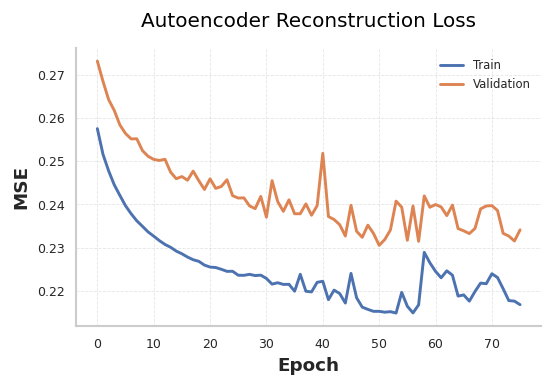

In [ ]:
# Plot training and validation loss scores
# against the number of epochs.
plt.figure(figsize=(5, 3))
plt.plot(history_prellin_v2.history['loss'], label='Train')
plt.plot(history_prellin_v2.history['val_loss'], label='Validation')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')

In [ ]:
latent_representation_v2 = latent_model_prellin_v2.predict(valid)
latent_representation_train_v2 = latent_model_prellin_v2.predict(train)

617/617 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
4916/4916 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step


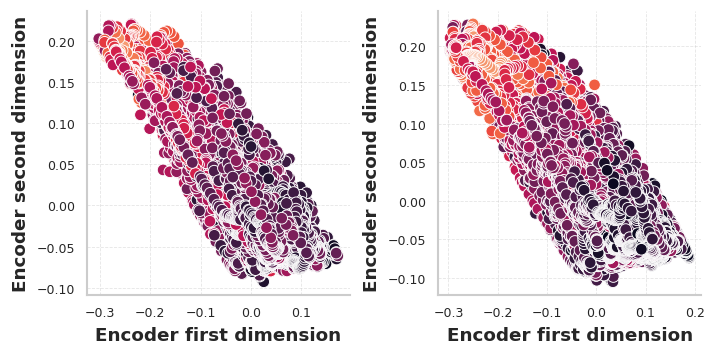

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(6, 3))

sns.scatterplot(x=latent_representation_v2[:,0],
                y=latent_representation_v2[:,1],
                c=y_enc_valid,
                palette='tab10',
                ax=axs[0])

sns.scatterplot(x=latent_representation_train_v2[:,0],
                y=latent_representation_train_v2[:,1],
                c=y_enc_train,
                palette='tab10',
                ax=axs[1]
                )

axs[0].set_xlabel("Encoder first dimension")
axs[0].set_ylabel("Encoder second dimension")

axs[1].set_xlabel("Encoder first dimension")
axs[1].set_ylabel("Encoder second dimension")

axs[0].grid(linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

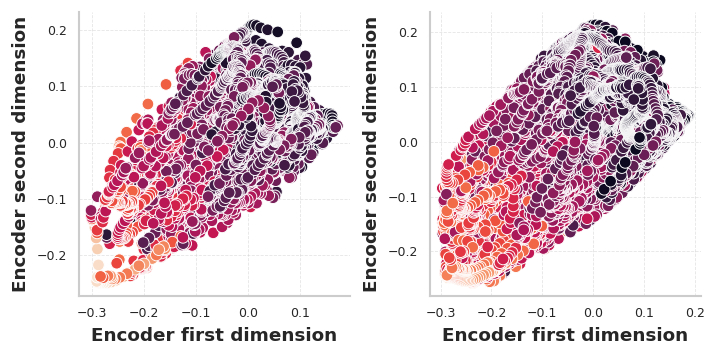

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(6, 3))

sns.scatterplot(x=latent_representation_v2[:,0],
                y=latent_representation_v2[:,2],
                c=y_enc_valid,
                palette='tab10',
                ax=axs[0])

sns.scatterplot(x=latent_representation_train_v2[:,0],
                y=latent_representation_train_v2[:,2],
                c=y_enc_train,
                palette='tab10',
                ax=axs[1]
                )

axs[0].set_xlabel("Encoder first dimension")
axs[0].set_ylabel("Encoder second dimension")

axs[1].set_xlabel("Encoder first dimension")
axs[1].set_ylabel("Encoder second dimension")

axs[0].grid(linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [ ]:
latent_representation_v2_final = latent_model_prellin_v2.predict(X_enc)
latent_representation_v2_final_test = latent_model_prellin_v2.predict(X_enc_test)

5532/5532 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
X_enc.shape

(177024, 72, 1)

In [ ]:
#latent_representation_v2_final

In [ ]:
model_version=2
for i in range(latent_representation_v2_final.shape[1]):
  df_train["enc_0{}_v{}".format(i, model_version)] = latent_representation_v2_final[:,i]
  df_test["enc_0{}_v{}".format(i, model_version)] = latent_representation_v2_final_test[:,i]

In [ ]:
df_train.isnull().sum().sum(), df_test.isnull().sum().sum(), df_train.shape, df_test.shape

(0, 0, (177024, 663), (3644, 662))

##### STORE ENCODED FEATURES from Model 2:

In [ ]:
#df_train.to_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/train_cluster_enc_v2.csv")
#df_test.to_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/test_cluster_enc_v2.csv")

df_train = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/train_cluster_enc_v2.csv", index_col=0)
df_test = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/test_cluster_enc_v2.csv", index_col=0)

##### Test Correlations:

In [ ]:
df_train[['PC_1', 'PC_2', 'PC_3', 'enc_0_v1','enc_1_v1', 'enc_00_v2', 'enc_01_v2', 'enc_02_v2',"bg+1:00"]].corr().style.background_gradient(cmap='viridis')

##### Submission Model 2:

In [ ]:
recons, pred = autoencoder_prellin_v2.predict(X_enc_test)
#pred = y_test_pred

114/114 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


In [ ]:
df_train_scaled=pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/X_train_scaled.csv", index_col=0)
df_test.shape

(3644, 662)

In [ ]:
target_scaler = StandardScaler()
target_scaler.fit(df_train_scaled["bg+1:00"].values.reshape(-1, 1))

StandardScaler()

In [ ]:
pred_resc = target_scaler.inverse_transform(pred.reshape(-1,1))

In [ ]:
sub = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/sample_submission.csv")
sub.shape

(3644, 2)

In [ ]:
sub["bg+1:00"] = pred_resc
sub["bg+1:00"]

0        8.700006
1        6.522532
2        7.278727
3       10.625414
4        6.308960
          ...    
3639     6.717507
3640    10.038125
3641     7.498047
3642     8.205389
3643     7.138685
Name: bg+1:00, Length: 3644, dtype: float32

In [ ]:
sub.to_csv(f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/submissions/Submission_val_encoder_v2.csv", index=False)

#### MODEL 3

In [ ]:
cols_bg = ['bg-5:55', 'bg-5:50', 'bg-5:45', 'bg-5:40','bg-5:35', 'bg-5:30',
           'bg-5:25', 'bg-5:20', 'bg-5:15', 'bg-5:10','bg-5:05', 'bg-5:00',
           'bg-4:55', 'bg-4:50', 'bg-4:45', 'bg-4:40','bg-4:35', 'bg-4:30',
           'bg-4:25', 'bg-4:20', 'bg-4:15', 'bg-4:10','bg-4:05', 'bg-4:00',
           'bg-3:55', 'bg-3:50', 'bg-3:45', 'bg-3:40','bg-3:35', 'bg-3:30',
           'bg-3:25', 'bg-3:20', 'bg-3:15', 'bg-3:10','bg-3:05', 'bg-3:00',
           'bg-2:55', 'bg-2:50', 'bg-2:45', 'bg-2:40','bg-2:35', 'bg-2:30',
           'bg-2:25', 'bg-2:20', 'bg-2:15', 'bg-2:10','bg-2:05', 'bg-2:00',
           'bg-1:55', 'bg-1:50', 'bg-1:45', 'bg-1:40','bg-1:35', 'bg-1:30',
           'bg-1:25', 'bg-1:20', 'bg-1:15', 'bg-1:10','bg-1:05', 'bg-1:00',
           'bg-0:55', 'bg-0:50', 'bg-0:45', 'bg-0:40','bg-0:35', 'bg-0:30',
           'bg-0:25', 'bg-0:20', 'bg-0:15', 'bg-0:10','bg-0:05', 'bg-0:00']

cols_brake = ['brake-5:55', 'brake-5:50', 'brake-5:45', 'brake-5:40','brake-5:35', 'brake-5:30',
              'brake-5:25', 'brake-5:20', 'brake-5:15', 'brake-5:10','brake-5:05', 'brake-5:00',
              'brake-4:55', 'brake-4:50', 'brake-4:45', 'brake-4:40','brake-4:35', 'brake-4:30',
              'brake-4:25', 'brake-4:20', 'brake-4:15', 'brake-4:10','brake-4:05', 'brake-4:00',
              'brake-3:55', 'brake-3:50', 'brake-3:45', 'brake-3:40','brake-3:35', 'brake-3:30',
              'brake-3:25', 'brake-3:20', 'brake-3:15', 'brake-3:10','brake-3:05', 'brake-3:00',
              'brake-2:55', 'brake-2:50', 'brake-2:45', 'brake-2:40','brake-2:35', 'brake-2:30',
              'brake-2:25', 'brake-2:20', 'brake-2:15', 'brake-2:10','brake-2:05', 'brake-2:00',
              'brake-1:55', 'brake-1:50', 'brake-1:45', 'brake-1:40','brake-1:35', 'brake-1:30',
              'brake-1:25', 'brake-1:20', 'brake-1:15', 'brake-1:10','brake-1:05', 'brake-1:00',
              'brake-0:55', 'brake-0:50', 'brake-0:45', 'brake-0:40','brake-0:35', 'brake-0:30',
              'brake-0:25', 'brake-0:20', 'brake-0:15', 'brake-0:10','brake-0:05', 'brake-0:00']


In [ ]:
X_enc = df_train[["p_num","obv_n"]+cols_bg+cols_brake]
y_enc = df_train["bg+1:00"]
X_enc_test = df_test[cols_bg+cols_brake]
X_enc.shape

(177024, 146)

In [ ]:
X_enc.isnull().sum().sum(), y_enc.isna().sum()
#y_enc[:10]

(0, 0)

In [ ]:
p1_val = list(X_enc[(X_enc["p_num"]=="p01")&(X_enc["obv_n"]>=7600)].index)
p2_val = list(X_enc[(X_enc["p_num"]=="p02")&(X_enc["obv_n"]>=22500)].index)
p3_val = list(X_enc[(X_enc["p_num"]=="p03")&(X_enc["obv_n"]>=23000)].index)
p4_val = list(X_enc[(X_enc["p_num"]=="p04")&(X_enc["obv_n"]>=22000)].index)
p5_val = list(X_enc[(X_enc["p_num"]=="p05")&(X_enc["obv_n"]>=7600)].index)
p6_val = list(X_enc[(X_enc["p_num"]=="p06")&(X_enc["obv_n"]>=7600)].index)
p10_val = list(X_enc[(X_enc["p_num"]=="p10")&(X_enc["obv_n"]>=22500)].index)
p11_val = list(X_enc[(X_enc["p_num"]=="p11")&(X_enc["obv_n"]>=22000)].index)
p12_val = list(X_enc[(X_enc["p_num"]=="p12")&(X_enc["obv_n"]>=22500)].index)

matrix_val = p1_val+p2_val+p3_val+p4_val+p5_val+p6_val+p10_val+p11_val+p12_val
len(matrix_val)/X_enc.shape[0]

X_enc_train = X_enc.drop(matrix_val)
X_enc_valid = X_enc.loc[matrix_val]

y_enc_train = y_enc.drop(matrix_val)
y_enc_valid = y_enc.loc[matrix_val]

X_enc_train.drop(["p_num","obv_n"], axis=1, inplace=True)
X_enc_valid.drop(["p_num","obv_n"], axis=1, inplace=True)
X_enc.drop(["p_num","obv_n"], axis=1, inplace=True)

X_enc_train.shape, X_enc_valid.shape, X_enc.shape, y_enc_train.shape, y_enc_valid.shape, y_enc.shape

((157300, 144), (19724, 144), (177024, 144), (157300,), (19724,), (177024,))

In [ ]:
# Assuming your data is in a NumPy array called 'data'
train = X_enc_train.values.reshape((-1, 72, 2))  # Reshape for LSTM
valid = X_enc_valid.values.reshape((-1, 72, 2))
X_enc = X_enc.values.reshape((-1, 72, 2))
X_enc_test = X_enc_test.values.reshape((-1, 72, 2))

y_enc_train = y_enc_train.values.reshape((-1, 1))
y_enc_valid = y_enc_valid.values.reshape((-1, 1))

In [ ]:
def model_autoencoder_v3():
  input_dim = 72
  latent_vec_dim = 5

  # 2. Build the autoencoder model
  input_ts = keras.Input(shape=(input_dim, 2))

  # Encoder
  x = layers.LSTM(64, return_sequences=True)(input_ts)
  x = layers.LSTM(32, return_sequences=True)(input_ts) #(x)
  x = layers.LSTM(16)(x)
  encoded = layers.Dense(latent_vec_dim, activation='linear', kernel_regularizer = tf.keras.regularizers.L2(l2=0.1))(x)

  output_1 = Dense(1, activation='linear', name="Reg_Output")(encoded)

  #encoder = encoded

  # Decoder
  x = layers.RepeatVector(72)(encoded)
  x = layers.LSTM(16, return_sequences=True)(x)
  x = layers.LSTM(32, return_sequences=True)(x) #, return_sequences=True
  x = layers.LSTM(64, return_sequences=True)(x)

  decoded = layers.Dense(2, name="decoded")(x)

  # Connect both encoder and decoder
  autoencoder_mult = Model(inputs = input_ts, outputs = [decoded, output_1], name="Deep_Autoencoder")

  # Latent representation (Optional)
  latent_model = Model(input_ts, encoded)

  return autoencoder_mult, latent_model

In [ ]:
autoencoder_prellin_v3, latent_model_prellin_v3 = model_autoencoder_v3()

# Get summary
autoencoder_prellin_v3.summary()

Model: "Deep_Autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 72, 2)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_23 (LSTM)            │ (None, 72, 32)         │          4,480 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_24 (LSTM)            │ (None, 16)             │          3,136 │ lstm_23[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 5)              │             85 │ lstm_24[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ repeat_vector_4           │ (None, 72, 5)          │              0 │ dense_7[0][0]          │
│ (RepeatVector)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_25 (LSTM)            │ (None, 72, 16)         │          1,408 │ repeat_vector_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_26 (LSTM)            │ (None, 72, 32)         │          6,272 │ lstm_25[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_27 (LSTM)            │ (None, 72, 64)         │         24,832 │ lstm_26[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ decoded (Dense)           │ (None, 72, 2)          │            130 │ lstm_27[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Reg_Output (Dense)        │ (None, 1)              │              6 │ dense_7[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 40,349 (157.61 KB)

 Trainable params: 40,349 (157.61 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
lr = keras.callbacks.ReduceLROnPlateau(monitor="val_Reg_Output_root_mean_squared_error",
                        factor=0.75,
                        patience=10,
                        verbose=1,
                        mode="min")

early_stop = keras.callbacks.EarlyStopping(monitor="val_Reg_Output_root_mean_squared_error",
                            patience=25,
                            verbose=1,
                            mode="min",
                            restore_best_weights=True)


checkpoint_filepath = '/checkpoint/best_weights_v3.weights.h5'

Checkpoint = keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                 save_weights_only=True,
                                                 monitor="val_Reg_Output_root_mean_squared_error",
                                                 mode='min')

In [ ]:
# Compile the autoencoder model
optimizer = keras.optimizers.Adam(learning_rate=0.0005)
loss_0 = 'mse'
loss_1 = 'mse'

autoencoder_prellin_v3.compile(loss=[loss_0, loss_1], loss_weights=[0.75,0.25], optimizer=optimizer, metrics={'decoded': 'mse','Reg_Output': RootMeanSquaredError()})

# Train the autoencoder with MNIST data
history_prellin_v3 = autoencoder_prellin_v3.fit(train, [train, y_enc_train], epochs=120, batch_size=256, callbacks = [early_stop, Checkpoint, lr],
                                                 shuffle=True, validation_data=(valid, [valid, y_enc_valid]))

Epoch 1/120
615/615 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - Reg_Output_root_mean_squared_error: 0.9511 - decoded_mse: 0.5964 - loss: 1.2973 - val_Reg_Output_root_mean_squared_error: 0.9474 - val_decoded_mse: 0.3771 - val_loss: 0.6548 - learning_rate: 5.0000e-04
Epoch 2/120
615/615 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - Reg_Output_root_mean_squared_error: 0.8752 - decoded_mse: 0.2798 - loss: 0.5015 - val_Reg_Output_root_mean_squared_error: 0.8856 - val_decoded_mse: 0.2524 - val_loss: 0.4137 - learning_rate: 5.0000e-04
Epoch 3/120
615/615 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - Reg_Output_root_mean_squared_error: 0.8298 - decoded_mse: 0.2172 - loss: 0.3582 - val_Reg_Output_root_mean_squared_error: 0.8626 - val_decoded_mse: 0.2436 - val_loss: 0.3834 - learning_rate: 5.0000e-04
Epoch 4/120
615/615 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - Reg_Output_root_mean_squared_error: 0.8088 - decoded_mse: 0.2052 - loss: 0.3313 - val_Reg_Output_root_mean_squared_error: 0.8421 - val_decoded_mse: 0.2199 - val_loss:

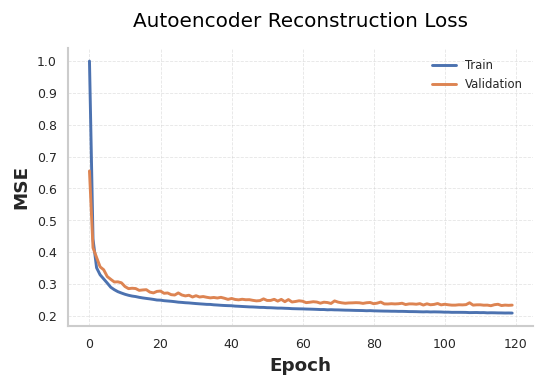

In [ ]:
# Plot training and validation loss scores
# against the number of epochs.
plt.figure(figsize=(5, 3))
plt.plot(history_prellin_v3.history['loss'], label='Train')
plt.plot(history_prellin_v3.history['val_loss'], label='Validation')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')
plt.show()

In [ ]:
latent_representation_v3 = latent_model_prellin_v3.predict(valid)
latent_representation_train_v3 = latent_model_prellin_v3.predict(train)

617/617 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
4916/4916 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step


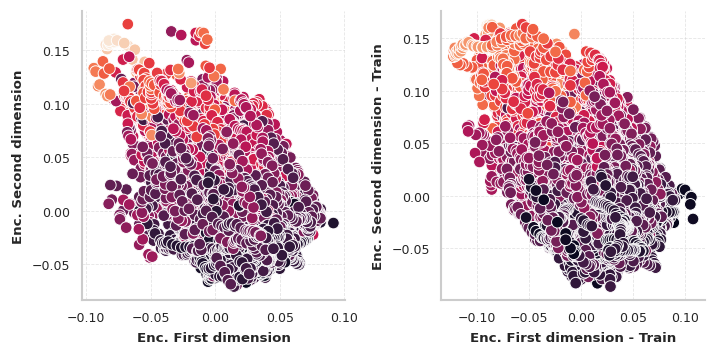

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(6, 3))

sns.scatterplot(x=latent_representation_v3[:,0],
                y=latent_representation_v3[:,1],
                c=y_enc_valid,
                palette='tab10',
                ax=axs[0])

sns.scatterplot(x=latent_representation_train_v3[:,0],
                y=latent_representation_train_v3[:,1],
                c=y_enc_train,
                palette='tab10',
                ax=axs[1]
                )

axs[0].set_xlabel("Enc. First dimension", fontsize=8)
axs[0].set_ylabel("Enc. Second dimension", fontsize=8)

axs[1].set_xlabel("Enc. First dimension - Train", fontsize=8)
axs[1].set_ylabel("Enc. Second dimension - Train", fontsize=8)

axs[0].grid(linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

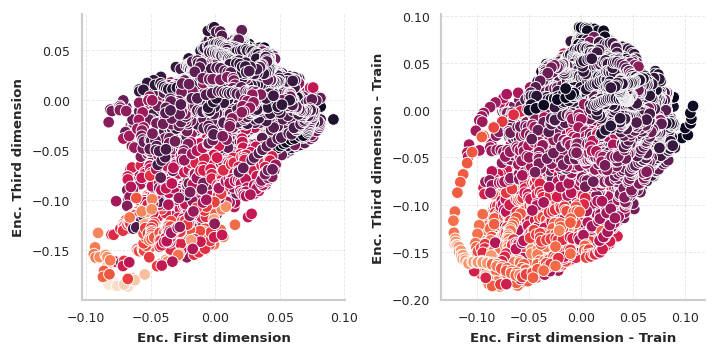

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(6, 3))

sns.scatterplot(x=latent_representation_v3[:,0],
                y=latent_representation_v3[:,2],
                c=y_enc_valid,
                palette='tab10',
                ax=axs[0])

sns.scatterplot(x=latent_representation_train_v3[:,0],
                y=latent_representation_train_v3[:,2],
                c=y_enc_train,
                palette='tab10',
                ax=axs[1]
                )

axs[0].set_xlabel("Enc. First dimension", fontsize=8)
axs[0].set_ylabel("Enc. Third dimension", fontsize=8)

axs[1].set_xlabel("Enc. First dimension - Train", fontsize=8)
axs[1].set_ylabel("Enc. Third dimension - Train", fontsize=8)

axs[0].grid(linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [ ]:
latent_representation_v3_final = latent_model_prellin_v3.predict(X_enc)
latent_representation_v3_final_test = latent_model_prellin_v3.predict(X_enc_test)

5532/5532 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
X_enc.shape

(177024, 72, 2)

In [ ]:
latent_representation_v3_final.shape

(177024, 5)

In [ ]:
df_train["enc_01_v3"] = latent_representation_v3_final[:,0]
df_train["enc_02_v3"] = latent_representation_v3_final[:,1]
df_train["enc_03_v3"] = latent_representation_v3_final[:,2]
df_train["enc_04_v3"] = latent_representation_v3_final[:,3]
df_train["enc_05_v3"] = latent_representation_v3_final[:,4]

df_test["enc_01_v3"] = latent_representation_v3_final_test[:,0]
df_test["enc_02_v3"] = latent_representation_v3_final_test[:,1]
df_test["enc_03_v3"] = latent_representation_v3_final_test[:,2]
df_test["enc_04_v3"] = latent_representation_v3_final_test[:,3]
df_test["enc_05_v3"] = latent_representation_v3_final_test[:,4]

In [ ]:
df_train.isnull().sum().sum(), df_test.isnull().sum().sum(), df_train.shape, df_test.shape

(0, 0, (177024, 668), (3644, 667))

##### STORE ENCODED FEATURES from Model 3:

In [ ]:
#df_train.to_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/train_cluster_enc_v3.csv")
#df_test.to_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/test_cluster_enc_v3.csv")

df_train = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/train_cluster_enc_v3.csv", index_col=0)
df_test = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/test_cluster_enc_v3.csv", index_col=0)

##### Test Correlations:

In [ ]:
df_train[['PC_1', 'PC_2', 'PC_3', 'enc_01_v3', 'enc_02_v3', 'enc_03_v3','enc_04_v3','enc_05_v3',"bg+1:00"]].corr().style.background_gradient(cmap='viridis')

##### Submission Model 3:

In [ ]:
recons, pred = autoencoder_prellin_v3.predict(X_enc_test)
#pred = y_test_pred

114/114 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


In [ ]:
df_train_scaled=pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/X_train_scaled.csv", index_col=0)
df_test.shape

(3644, 667)

In [ ]:
target_scaler = StandardScaler()
target_scaler.fit(df_train_scaled["bg+1:00"].values.reshape(-1, 1))

StandardScaler()

In [ ]:
pred_resc = target_scaler.inverse_transform(pred.reshape(-1,1))

In [ ]:
sub = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/sample_submission.csv")
sub.shape

(3644, 2)

In [ ]:
sub["bg+1:00"] = pred_resc
sub["bg+1:00"]

0        9.786799
1        6.747181
2        6.189708
3       11.269092
4        6.237927
          ...    
3639     6.610612
3640     9.947528
3641     7.132609
3642     8.987616
3643     7.194005
Name: bg+1:00, Length: 3644, dtype: float32

In [ ]:
sub.to_csv(f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/submissions/Submission_val_encoder_v3.csv", index=False)

#### MODEL 4

In [ ]:
cols_bg = ['bg-5:55', 'bg-5:50', 'bg-5:45', 'bg-5:40','bg-5:35', 'bg-5:30',
           'bg-5:25', 'bg-5:20', 'bg-5:15', 'bg-5:10','bg-5:05', 'bg-5:00',
           'bg-4:55', 'bg-4:50', 'bg-4:45', 'bg-4:40','bg-4:35', 'bg-4:30',
           'bg-4:25', 'bg-4:20', 'bg-4:15', 'bg-4:10','bg-4:05', 'bg-4:00',
           'bg-3:55', 'bg-3:50', 'bg-3:45', 'bg-3:40','bg-3:35', 'bg-3:30',
           'bg-3:25', 'bg-3:20', 'bg-3:15', 'bg-3:10','bg-3:05', 'bg-3:00',
           'bg-2:55', 'bg-2:50', 'bg-2:45', 'bg-2:40','bg-2:35', 'bg-2:30',
           'bg-2:25', 'bg-2:20', 'bg-2:15', 'bg-2:10','bg-2:05', 'bg-2:00',
           'bg-1:55', 'bg-1:50', 'bg-1:45', 'bg-1:40','bg-1:35', 'bg-1:30',
           'bg-1:25', 'bg-1:20', 'bg-1:15', 'bg-1:10','bg-1:05', 'bg-1:00',
           'bg-0:55', 'bg-0:50', 'bg-0:45', 'bg-0:40','bg-0:35', 'bg-0:30',
           'bg-0:25', 'bg-0:20', 'bg-0:15', 'bg-0:10','bg-0:05', 'bg-0:00']

cols_brake = ['brake-5:55', 'brake-5:50', 'brake-5:45', 'brake-5:40','brake-5:35', 'brake-5:30',
              'brake-5:25', 'brake-5:20', 'brake-5:15', 'brake-5:10','brake-5:05', 'brake-5:00',
              'brake-4:55', 'brake-4:50', 'brake-4:45', 'brake-4:40','brake-4:35', 'brake-4:30',
              'brake-4:25', 'brake-4:20', 'brake-4:15', 'brake-4:10','brake-4:05', 'brake-4:00',
              'brake-3:55', 'brake-3:50', 'brake-3:45', 'brake-3:40','brake-3:35', 'brake-3:30',
              'brake-3:25', 'brake-3:20', 'brake-3:15', 'brake-3:10','brake-3:05', 'brake-3:00',
              'brake-2:55', 'brake-2:50', 'brake-2:45', 'brake-2:40','brake-2:35', 'brake-2:30',
              'brake-2:25', 'brake-2:20', 'brake-2:15', 'brake-2:10','brake-2:05', 'brake-2:00',
              'brake-1:55', 'brake-1:50', 'brake-1:45', 'brake-1:40','brake-1:35', 'brake-1:30',
              'brake-1:25', 'brake-1:20', 'brake-1:15', 'brake-1:10','brake-1:05', 'brake-1:00',
              'brake-0:55', 'brake-0:50', 'brake-0:45', 'brake-0:40','brake-0:35', 'brake-0:30',
              'brake-0:25', 'brake-0:20', 'brake-0:15', 'brake-0:10','brake-0:05', 'brake-0:00']


In [ ]:
X_enc = df_train[["p_num","obv_n"]+cols_bg+cols_brake]
y_enc = df_train["bg+1:00"]
X_enc_test = df_test[cols_bg+cols_brake]
X_enc.shape

(177024, 146)

In [ ]:
X_enc.isnull().sum().sum(), y_enc.isna().sum()
#y_enc[:10]

(0, 0)

In [ ]:
p1_val = list(X_enc[(X_enc["p_num"]=="p01")&(X_enc["obv_n"]>=7600)].index)
p2_val = list(X_enc[(X_enc["p_num"]=="p02")&(X_enc["obv_n"]>=22500)].index)
p3_val = list(X_enc[(X_enc["p_num"]=="p03")&(X_enc["obv_n"]>=23000)].index)
p4_val = list(X_enc[(X_enc["p_num"]=="p04")&(X_enc["obv_n"]>=22000)].index)
p5_val = list(X_enc[(X_enc["p_num"]=="p05")&(X_enc["obv_n"]>=7600)].index)
p6_val = list(X_enc[(X_enc["p_num"]=="p06")&(X_enc["obv_n"]>=7600)].index)
p10_val = list(X_enc[(X_enc["p_num"]=="p10")&(X_enc["obv_n"]>=22500)].index)
p11_val = list(X_enc[(X_enc["p_num"]=="p11")&(X_enc["obv_n"]>=22000)].index)
p12_val = list(X_enc[(X_enc["p_num"]=="p12")&(X_enc["obv_n"]>=22500)].index)

matrix_val = p1_val+p2_val+p3_val+p4_val+p5_val+p6_val+p10_val+p11_val+p12_val
len(matrix_val)/X_enc.shape[0]

X_enc_train = X_enc.drop(matrix_val)
X_enc_valid = X_enc.loc[matrix_val]

y_enc_train = y_enc.drop(matrix_val)
y_enc_valid = y_enc.loc[matrix_val]

X_enc_train.drop(["p_num","obv_n"], axis=1, inplace=True)
X_enc_valid.drop(["p_num","obv_n"], axis=1, inplace=True)
X_enc.drop(["p_num","obv_n"], axis=1, inplace=True)

X_enc_train.shape, X_enc_valid.shape, X_enc.shape, y_enc_train.shape, y_enc_valid.shape, y_enc.shape

((157300, 144), (19724, 144), (177024, 144), (157300,), (19724,), (177024,))

In [ ]:
# Assuming your data is in a NumPy array called 'data'
train = X_enc_train.values.reshape((-1, 72, 2))  # Reshape for LSTM
valid = X_enc_valid.values.reshape((-1, 72, 2))
X_enc = X_enc.values.reshape((-1, 72, 2))
X_enc_test = X_enc_test.values.reshape((-1, 72, 2))

y_enc_train = y_enc_train.values.reshape((-1, 1))
y_enc_valid = y_enc_valid.values.reshape((-1, 1))

In [ ]:
def model_autoencoder_v4():
  input_dim = 72
  latent_vec_dim = 8

  # 2. Build the autoencoder model
  input_ts = keras.Input(shape=(input_dim, 2))

  # Encoder
  x = layers.LSTM(64, return_sequences=True, name="encode_step1")(input_ts)
  x = layers.LSTM(32, return_sequences=True, name="encode_step2")(x) #(x)
  x = layers.LSTM(16, name="encode_step3")(x)
  encoded = layers.Dense(latent_vec_dim, activation='linear', kernel_regularizer = tf.keras.regularizers.L2(l2=0.1))(x)

  output_1 = Dense(1, activation='linear', name="Reg_Output")(encoded)

  #encoder = encoded

  # Decoder
  x = layers.RepeatVector(72)(encoded)
  x = layers.LSTM(16, name="decoder_step1", return_sequences=True)(x)
  x = layers.LSTM(32,  name="decoder_step2",return_sequences=True)(x) #, return_sequences=True
  x = layers.LSTM(64, return_sequences=True, name="decoder_step3",)(x)

  decoded = layers.Dense(2, name="decoded")(x)

  # Connect both encoder and decoder
  autoencoder_mult = Model(inputs = input_ts, outputs = [decoded, output_1], name="Deep_Autoencoder")

  # Latent representation (Optional)
  latent_model = Model(input_ts, encoded)

  return autoencoder_mult, latent_model

In [ ]:
autoencoder_prellin_v4, latent_model_prellin_v4 = model_autoencoder_v4()

# Get summary
autoencoder_prellin_v4.summary()

Model: "Deep_Autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, 72, 2)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ encode_step1 (LSTM)       │ (None, 72, 64)         │         17,152 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ encode_step2 (LSTM)       │ (None, 72, 32)         │         12,416 │ encode_step1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ encode_step3 (LSTM)       │ (None, 16)             │          3,136 │ encode_step2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_8 (Dense)           │ (None, 8)              │            136 │ encode_step3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ repeat_vector_5           │ (None, 72, 8)          │              0 │ dense_8[0][0]          │
│ (RepeatVector)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ decoder_step1 (LSTM)      │ (None, 72, 16)         │          1,600 │ repeat_vector_5[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ decoder_step2 (LSTM)      │ (None, 72, 32)         │          6,272 │ decoder_step1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ decoder_step3 (LSTM)      │ (None, 72, 64)         │         24,832 │ decoder_step2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ decoded (Dense)           │ (None, 72, 2)          │            130 │ decoder_step3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Reg_Output (Dense)        │ (None, 1)              │              9 │ dense_8[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 65,683 (256.57 KB)

 Trainable params: 65,683 (256.57 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
lr = keras.callbacks.ReduceLROnPlateau(monitor="val_Reg_Output_root_mean_squared_error",
                        factor=0.75,
                        patience=10,
                        verbose=1,
                        mode="min")

early_stop = keras.callbacks.EarlyStopping(monitor="val_Reg_Output_root_mean_squared_error",
                            patience=25,
                            verbose=1,
                            mode="min",
                            restore_best_weights=True)


checkpoint_filepath = '/checkpoint/best_weights_v4.weights.h5'

Checkpoint = keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                 save_weights_only=True,
                                                 monitor="val_Reg_Output_root_mean_squared_error",
                                                 mode='min')

In [ ]:
# Compile the autoencoder model
optimizer = keras.optimizers.Adam(learning_rate=0.0005)
loss_0 = 'mse'
loss_1 = 'mse'

autoencoder_prellin_v4.compile(loss=[loss_0, loss_1], loss_weights=[0.7,0.30], optimizer=optimizer, metrics={'decoded': 'mse','Reg_Output': RootMeanSquaredError()})

# Train the autoencoder with MNIST data
history_prellin_v4 = autoencoder_prellin_v4.fit(train, [train, y_enc_train], epochs=120, batch_size=256, callbacks = [early_stop, Checkpoint, lr],
                                                 shuffle=True, validation_data=(valid, [valid, y_enc_valid]))

Epoch 1/120
615/615 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - Reg_Output_root_mean_squared_error: 0.8963 - decoded_mse: 0.5297 - loss: 1.4084 - val_Reg_Output_root_mean_squared_error: 0.8653 - val_decoded_mse: 0.3162 - val_loss: 0.6164 - learning_rate: 5.0000e-04
Epoch 2/120
615/615 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - Reg_Output_root_mean_squared_error: 0.8042 - decoded_mse: 0.2503 - loss: 0.4812 - val_Reg_Output_root_mean_squared_error: 0.8354 - val_decoded_mse: 0.2385 - val_loss: 0.4046 - learning_rate: 5.0000e-04
Epoch 3/120
615/615 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - Reg_Output_root_mean_squared_error: 0.7856 - decoded_mse: 0.2118 - loss: 0.3561 - val_Reg_Output_root_mean_squared_error: 0.8113 - val_decoded_mse: 0.2128 - val_loss: 0.3609 - learning_rate: 5.0000e-04
Epoch 4/120
615/615 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - Reg_Output_root_mean_squared_error: 0.7685 - decoded_mse: 0.1890 - loss: 0.3228 - val_Reg_Output_root_mean_squared_error: 0.8140 - val_decoded_mse: 0.1970 - val_loss:

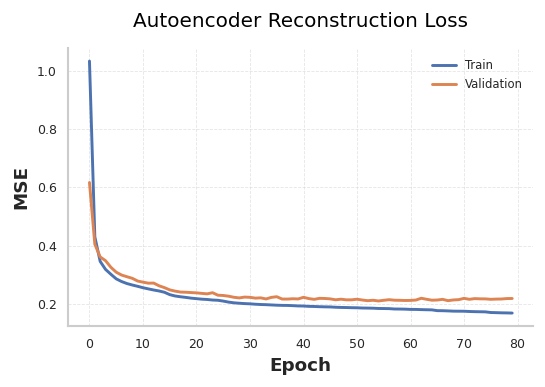

In [ ]:
# Plot training and validation loss scores
# against the number of epochs.
plt.figure(figsize=(5, 3))
plt.plot(history_prellin_v4.history['loss'], label='Train')
plt.plot(history_prellin_v4.history['val_loss'], label='Validation')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')
plt.show()

In [ ]:
latent_representation_v4 = latent_model_prellin_v4.predict(valid)
latent_representation_train_v4 = latent_model_prellin_v4.predict(train)

617/617 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
4916/4916 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step


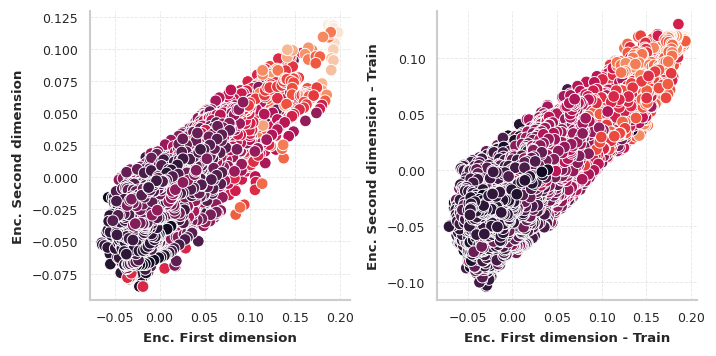

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(6, 3))

sns.scatterplot(x=latent_representation_v4[:,0],
                y=latent_representation_v4[:,1],
                c=y_enc_valid,
                palette='tab10',
                ax=axs[0])

sns.scatterplot(x=latent_representation_train_v4[:,0],
                y=latent_representation_train_v4[:,1],
                c=y_enc_train,
                palette='tab10',
                ax=axs[1]
                )

axs[0].set_xlabel("Enc. First dimension", fontsize=8)
axs[0].set_ylabel("Enc. Second dimension", fontsize=8)

axs[1].set_xlabel("Enc. First dimension - Train", fontsize=8)
axs[1].set_ylabel("Enc. Second dimension - Train", fontsize=8)

axs[0].grid(linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

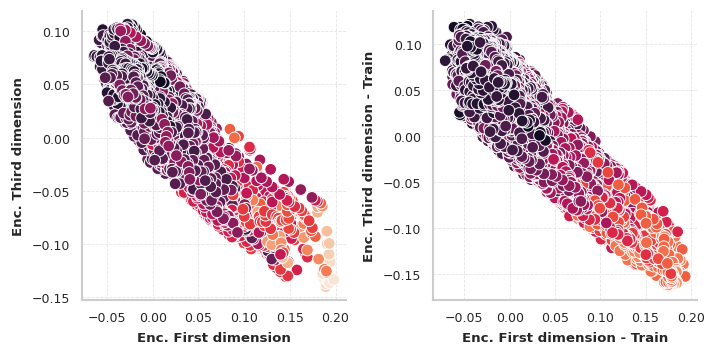

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(6, 3))

sns.scatterplot(x=latent_representation_v4[:,0],
                y=latent_representation_v4[:,2],
                c=y_enc_valid,
                palette='tab10',
                ax=axs[0])

sns.scatterplot(x=latent_representation_train_v4[:,0],
                y=latent_representation_train_v4[:,2],
                c=y_enc_train,
                palette='tab10',
                ax=axs[1]
                )

axs[0].set_xlabel("Enc. First dimension", fontsize=8)
axs[0].set_ylabel("Enc. Third dimension", fontsize=8)

axs[1].set_xlabel("Enc. First dimension - Train", fontsize=8)
axs[1].set_ylabel("Enc. Third dimension - Train", fontsize=8)

axs[0].grid(linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [ ]:
latent_representation_v4_final = latent_model_prellin_v4.predict(X_enc)
latent_representation_v4_final_test = latent_model_prellin_v4.predict(X_enc_test)

5532/5532 ━━━━━━━━━━━━━━━━━━━━ 26s 5ms/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [ ]:
X_enc.shape

(177024, 72, 2)

In [ ]:
latent_representation_v4_final.shape

(177024, 8)

In [ ]:
df_train["enc_01_v4"] = latent_representation_v4_final[:,0]
df_train["enc_02_v4"] = latent_representation_v4_final[:,1]
df_train["enc_03_v4"] = latent_representation_v4_final[:,2]
df_train["enc_04_v4"] = latent_representation_v4_final[:,3]
df_train["enc_05_v4"] = latent_representation_v4_final[:,4]
df_train["enc_06_v4"] = latent_representation_v4_final[:,5]
df_train["enc_07_v4"] = latent_representation_v4_final[:,6]
df_train["enc_08_v4"] = latent_representation_v4_final[:,7]

df_test["enc_01_v4"] = latent_representation_v4_final_test[:,0]
df_test["enc_02_v4"] = latent_representation_v4_final_test[:,1]
df_test["enc_03_v4"] = latent_representation_v4_final_test[:,2]
df_test["enc_04_v4"] = latent_representation_v4_final_test[:,3]
df_test["enc_05_v4"] = latent_representation_v4_final_test[:,4]
df_test["enc_06_v4"] = latent_representation_v4_final_test[:,5]
df_test["enc_07_v4"] = latent_representation_v4_final_test[:,6]
df_test["enc_08_v4"] = latent_representation_v4_final_test[:,7]

In [ ]:
df_train.isnull().sum().sum(), df_test.isnull().sum().sum(), df_train.shape, df_test.shape

(0, 0, (177024, 676), (3644, 675))

##### STORE ENCODED FEATURES from Model 4:

In [51]:
#df_train.to_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/train_cluster_enc_v4.csv")
#df_test.to_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/test_cluster_enc_v4.csv")

df_train = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/train_cluster_enc_v4.csv", index_col=0)
df_test = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/test_cluster_enc_v4.csv", index_col=0)

##### Test Correlations:

In [52]:
df_train[['PC_1', 'PC_2', 'PC_3', 'enc_01_v4', 'enc_02_v4', 'enc_03_v4','enc_04_v4','enc_05_v4',
          'enc_06_v4','enc_07_v4','enc_08_v4',"bg+1:00"]].corr().style.background_gradient(cmap='viridis')

##### Submission Model 4:

In [ ]:
recons, pred = autoencoder_prellin_v4.predict(X_enc_test)
#pred = y_test_pred

114/114 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step


In [ ]:
df_train_scaled=pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/X_train_scaled.csv", index_col=0)
df_test.shape

(3644, 675)

In [ ]:
target_scaler = StandardScaler()
target_scaler.fit(df_train_scaled["bg+1:00"].values.reshape(-1, 1))

StandardScaler()

In [ ]:
pred_resc = target_scaler.inverse_transform(pred.reshape(-1,1))

In [ ]:
sub = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/sample_submission.csv")
sub.shape

(3644, 2)

In [ ]:
sub["bg+1:00"] = pred_resc
sub["bg+1:00"]

0       10.408672
1        6.948123
2        7.048969
3        9.887237
4        5.951649
          ...    
3639     6.415550
3640     9.472010
3641     7.254022
3642     9.083566
3643     6.563693
Name: bg+1:00, Length: 3644, dtype: float32

In [ ]:
sub.to_csv(f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/submissions/Submission_val_encoder_v4.csv", index=False)

#### MODEL 5 - Convol

In [53]:
cols_bg = ['bg-5:55', 'bg-5:50', 'bg-5:45', 'bg-5:40','bg-5:35', 'bg-5:30',
           'bg-5:25', 'bg-5:20', 'bg-5:15', 'bg-5:10','bg-5:05', 'bg-5:00',
           'bg-4:55', 'bg-4:50', 'bg-4:45', 'bg-4:40','bg-4:35', 'bg-4:30',
           'bg-4:25', 'bg-4:20', 'bg-4:15', 'bg-4:10','bg-4:05', 'bg-4:00',
           'bg-3:55', 'bg-3:50', 'bg-3:45', 'bg-3:40','bg-3:35', 'bg-3:30',
           'bg-3:25', 'bg-3:20', 'bg-3:15', 'bg-3:10','bg-3:05', 'bg-3:00',
           'bg-2:55', 'bg-2:50', 'bg-2:45', 'bg-2:40','bg-2:35', 'bg-2:30',
           'bg-2:25', 'bg-2:20', 'bg-2:15', 'bg-2:10','bg-2:05', 'bg-2:00',
           'bg-1:55', 'bg-1:50', 'bg-1:45', 'bg-1:40','bg-1:35', 'bg-1:30',
           'bg-1:25', 'bg-1:20', 'bg-1:15', 'bg-1:10','bg-1:05', 'bg-1:00',
           'bg-0:55', 'bg-0:50', 'bg-0:45', 'bg-0:40','bg-0:35', 'bg-0:30',
           'bg-0:25', 'bg-0:20', 'bg-0:15', 'bg-0:10','bg-0:05', 'bg-0:00']

cols_brake = ['brake-5:55', 'brake-5:50', 'brake-5:45', 'brake-5:40','brake-5:35', 'brake-5:30',
              'brake-5:25', 'brake-5:20', 'brake-5:15', 'brake-5:10','brake-5:05', 'brake-5:00',
              'brake-4:55', 'brake-4:50', 'brake-4:45', 'brake-4:40','brake-4:35', 'brake-4:30',
              'brake-4:25', 'brake-4:20', 'brake-4:15', 'brake-4:10','brake-4:05', 'brake-4:00',
              'brake-3:55', 'brake-3:50', 'brake-3:45', 'brake-3:40','brake-3:35', 'brake-3:30',
              'brake-3:25', 'brake-3:20', 'brake-3:15', 'brake-3:10','brake-3:05', 'brake-3:00',
              'brake-2:55', 'brake-2:50', 'brake-2:45', 'brake-2:40','brake-2:35', 'brake-2:30',
              'brake-2:25', 'brake-2:20', 'brake-2:15', 'brake-2:10','brake-2:05', 'brake-2:00',
              'brake-1:55', 'brake-1:50', 'brake-1:45', 'brake-1:40','brake-1:35', 'brake-1:30',
              'brake-1:25', 'brake-1:20', 'brake-1:15', 'brake-1:10','brake-1:05', 'brake-1:00',
              'brake-0:55', 'brake-0:50', 'brake-0:45', 'brake-0:40','brake-0:35', 'brake-0:30',
              'brake-0:25', 'brake-0:20', 'brake-0:15', 'brake-0:10','brake-0:05', 'brake-0:00']


In [54]:
X_enc = df_train[["p_num","obv_n"]+cols_bg+cols_brake]
y_enc = df_train["bg+1:00"]
X_enc_test = df_test[cols_bg+cols_brake]
X_enc.shape

(177024, 146)

In [55]:
X_enc.isnull().sum().sum(), y_enc.isna().sum()
#y_enc[:10]

(0, 0)

In [56]:
p1_val = list(X_enc[(X_enc["p_num"]=="p01")&(X_enc["obv_n"]>=7600)].index)
p2_val = list(X_enc[(X_enc["p_num"]=="p02")&(X_enc["obv_n"]>=22500)].index)
p3_val = list(X_enc[(X_enc["p_num"]=="p03")&(X_enc["obv_n"]>=23000)].index)
p4_val = list(X_enc[(X_enc["p_num"]=="p04")&(X_enc["obv_n"]>=22000)].index)
p5_val = list(X_enc[(X_enc["p_num"]=="p05")&(X_enc["obv_n"]>=7600)].index)
p6_val = list(X_enc[(X_enc["p_num"]=="p06")&(X_enc["obv_n"]>=7600)].index)
p10_val = list(X_enc[(X_enc["p_num"]=="p10")&(X_enc["obv_n"]>=22500)].index)
p11_val = list(X_enc[(X_enc["p_num"]=="p11")&(X_enc["obv_n"]>=22000)].index)
p12_val = list(X_enc[(X_enc["p_num"]=="p12")&(X_enc["obv_n"]>=22500)].index)

matrix_val = p1_val+p2_val+p3_val+p4_val+p5_val+p6_val+p10_val+p11_val+p12_val
len(matrix_val)/X_enc.shape[0]

X_enc_train = X_enc.drop(matrix_val)
X_enc_valid = X_enc.loc[matrix_val]

y_enc_train = y_enc.drop(matrix_val)
y_enc_valid = y_enc.loc[matrix_val]

X_enc_train.drop(["p_num","obv_n"], axis=1, inplace=True)
X_enc_valid.drop(["p_num","obv_n"], axis=1, inplace=True)
X_enc.drop(["p_num","obv_n"], axis=1, inplace=True)

X_enc_train.shape, X_enc_valid.shape, X_enc.shape, y_enc_train.shape, y_enc_valid.shape, y_enc.shape

((157300, 144), (19724, 144), (177024, 144), (157300,), (19724,), (177024,))

In [57]:
# Assuming your data is in a NumPy array called 'data'
train = X_enc_train.values.reshape((-1, 72, 2))  # Reshape for LSTM
valid = X_enc_valid.values.reshape((-1, 72, 2))
X_enc = X_enc.values.reshape((-1, 72, 2))
X_enc_test = X_enc_test.values.reshape((-1, 72, 2))

y_enc_train = y_enc_train.values.reshape((-1, 1))
y_enc_valid = y_enc_valid.values.reshape((-1, 1))

In [58]:
def model_autoencoder_v5():
  input_dim = 72
  latent_vec_dim = 8

  # 2. Build the autoencoder model
  input_ts = keras.Input(shape=(input_dim, 2))

  # Encoder
  x = layers.Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(input_ts)
  x = layers.MaxPooling1D(pool_size=2)(x)
  x = layers.Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(x)
  x = layers.MaxPooling1D(pool_size=2)(x)
  x = layers.Flatten()(x)
  encoded = layers.Dense(latent_vec_dim, activation='linear', kernel_regularizer = tf.keras.regularizers.L2(l2=0.1))(x)  # Bottleneck layer with 5 dimensions

  output_1 = Dense(1, activation='linear', name="Reg_Output")(encoded)

  #encoder = encoded

  # Decoder
  x = layers.Dense(18 * 32)(encoded)  # Adjusted output size
  x = layers.Reshape((18, 32))(x)  # Adjusted reshape
  x = layers.Conv1DTranspose(filters=32, kernel_size=3, activation='relu', padding='same')(x)
  x = layers.UpSampling1D(size=2)(x)
  x = layers.Conv1DTranspose(filters=64, kernel_size=3, activation='relu', padding='same')(x)
  x = layers.UpSampling1D(size=2)(x)
  decoded = layers.Conv1D(filters=2, kernel_size=3, activation='linear', padding='same', name="decoded")(x)


  # Connect both encoder and decoder
  autoencoder_mult = Model(inputs = input_ts, outputs = [decoded, output_1], name="Deep_Autoencoder")

  # Latent representation (Optional)
  latent_model = Model(input_ts, encoded)

  return autoencoder_mult, latent_model

In [59]:
autoencoder_prellin_v5, latent_model_prellin_v5 = model_autoencoder_v5()

# Get summary
autoencoder_prellin_v5.summary()

Model: "Deep_Autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 72, 2)          │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d (Conv1D)           │ (None, 72, 64)         │            448 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d             │ (None, 36, 64)         │              0 │ conv1d[0][0]           │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_1 (Conv1D)         │ (None, 36, 32)         │          6,176 │ max_pooling1d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_1           │ (None, 18, 32)         │              0 │ conv1d_1[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 576)            │              0 │ max_pooling1d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 8)              │          4,616 │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 576)            │          5,184 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape (Reshape)         │ (None, 18, 32)         │              0 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_transpose          │ (None, 18, 32)         │          3,104 │ reshape[0][0]          │
│ (Conv1DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling1d             │ (None, 36, 32)         │              0 │ conv1d_transpose[0][0] │
│ (UpSampling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_transpose_1        │ (None, 36, 64)         │          6,208 │ up_sampling1d[0][0]    │
│ (Conv1DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling1d_1           │ (None, 72, 64)         │              0 │ conv1d_transpose_1[0]… │
│ (UpSampling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ decoded (Conv1D)          │ (None, 72, 2)          │            386 │ up_sampling1d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Reg_Output (Dense)        │ (None, 1)              │              9 │ dense[0][0]            │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 26,131 (102.07 KB)

 Trainable params: 26,131 (102.07 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
lr = keras.callbacks.ReduceLROnPlateau(monitor="val_Reg_Output_root_mean_squared_error",
                        factor=0.75,
                        patience=10,
                        verbose=1,
                        mode="min")

early_stop = keras.callbacks.EarlyStopping(monitor="val_Reg_Output_root_mean_squared_error",
                            patience=25,
                            verbose=1,
                            mode="min",
                            restore_best_weights=True)


checkpoint_filepath = '/checkpoint/best_weights_v5.weights.h5'

Checkpoint = keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                 save_weights_only=True,
                                                 monitor="val_Reg_Output_root_mean_squared_error",
                                                 mode='min')

In [61]:
# Compile the autoencoder model
optimizer = keras.optimizers.Adam(learning_rate=0.0005)
loss_0 = 'mse'
loss_1 = 'mse'

autoencoder_prellin_v5.compile(loss=[loss_0, loss_1], loss_weights=[0.7,0.30], optimizer=optimizer, metrics={'decoded': 'mse','Reg_Output': RootMeanSquaredError()})

# Train the autoencoder with MNIST data
history_prellin_v5 = autoencoder_prellin_v5.fit(train, [train, y_enc_train], epochs=120, batch_size=256, callbacks = [early_stop, Checkpoint, lr],
                                                 shuffle=True, validation_data=(valid, [valid, y_enc_valid]))

Epoch 1/120
615/615 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - Reg_Output_root_mean_squared_error: 0.7920 - decoded_mse: 0.3349 - loss: 0.9303 - val_Reg_Output_root_mean_squared_error: 0.7406 - val_decoded_mse: 0.0827 - val_loss: 0.2317 - learning_rate: 5.0000e-04
Epoch 2/120
615/615 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Reg_Output_root_mean_squared_error: 0.7133 - decoded_mse: 0.0769 - loss: 0.2144 - val_Reg_Output_root_mean_squared_error: 0.7268 - val_decoded_mse: 0.0798 - val_loss: 0.2206 - learning_rate: 5.0000e-04
Epoch 3/120
615/615 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Reg_Output_root_mean_squared_error: 0.6992 - decoded_mse: 0.0749 - loss: 0.2051 - val_Reg_Output_root_mean_squared_error: 0.7164 - val_decoded_mse: 0.0775 - val_loss: 0.2136 - learning_rate: 5.0000e-04
Epoch 4/120
615/615 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Reg_Output_root_mean_squared_error: 0.6965 - decoded_mse: 0.0740 - loss: 0.2026 - val_Reg_Output_root_mean_squared_error: 0.7231 - val_decoded_mse: 0.0793 - val_loss: 0.217

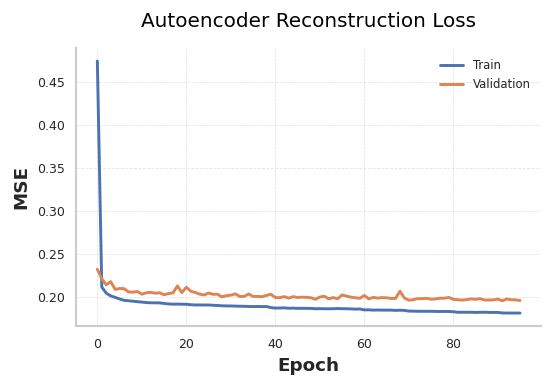

In [62]:
# Plot training and validation loss scores
# against the number of epochs.
plt.figure(figsize=(5, 3))
plt.plot(history_prellin_v5.history['loss'], label='Train')
plt.plot(history_prellin_v5.history['val_loss'], label='Validation')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')
plt.show()

In [63]:
latent_representation_v5 = latent_model_prellin_v5.predict(valid)
latent_representation_train_v5 = latent_model_prellin_v5.predict(train)

617/617 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
4916/4916 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step


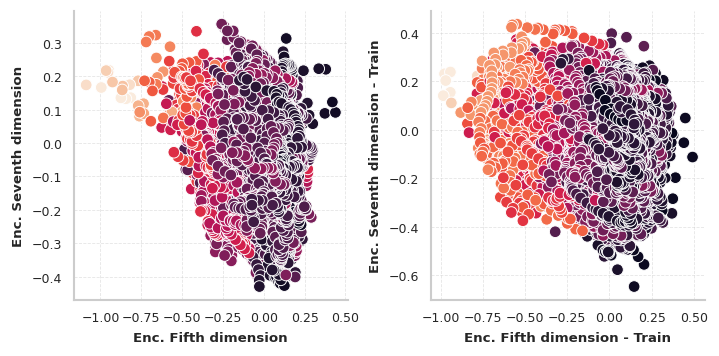

In [65]:
fig, axs = plt.subplots(1,2,figsize=(6, 3))

sns.scatterplot(x=latent_representation_v5[:,5],
                y=latent_representation_v5[:,7],
                c=y_enc_valid,
                palette='tab10',
                ax=axs[0])

sns.scatterplot(x=latent_representation_train_v5[:,5],
                y=latent_representation_train_v5[:,7],
                c=y_enc_train,
                palette='tab10',
                ax=axs[1]
                )

axs[0].set_xlabel("Enc. Fifth dimension", fontsize=8)
axs[0].set_ylabel("Enc. Seventh dimension", fontsize=8)

axs[1].set_xlabel("Enc. Fifth dimension - Train", fontsize=8)
axs[1].set_ylabel("Enc. Seventh dimension - Train", fontsize=8)

axs[0].grid(linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

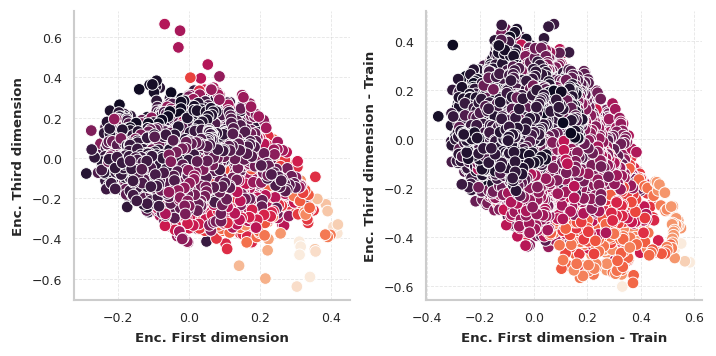

In [66]:
fig, axs = plt.subplots(1,2,figsize=(6, 3))

sns.scatterplot(x=latent_representation_v5[:,0],
                y=latent_representation_v5[:,2],
                c=y_enc_valid,
                palette='tab10',
                ax=axs[0])

sns.scatterplot(x=latent_representation_train_v5[:,0],
                y=latent_representation_train_v5[:,2],
                c=y_enc_train,
                palette='tab10',
                ax=axs[1]
                )

axs[0].set_xlabel("Enc. First dimension", fontsize=8)
axs[0].set_ylabel("Enc. Third dimension", fontsize=8)

axs[1].set_xlabel("Enc. First dimension - Train", fontsize=8)
axs[1].set_ylabel("Enc. Third dimension - Train", fontsize=8)

axs[0].grid(linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [67]:
latent_representation_v5_final = latent_model_prellin_v5.predict(X_enc)
latent_representation_v5_final_test = latent_model_prellin_v5.predict(X_enc_test)

5532/5532 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [68]:
X_enc.shape

(177024, 72, 2)

In [69]:
latent_representation_v5_final.shape

(177024, 8)

In [70]:
df_train["enc_01_v5"] = latent_representation_v5_final[:,0]
df_train["enc_02_v5"] = latent_representation_v5_final[:,1]
df_train["enc_03_v5"] = latent_representation_v5_final[:,2]
df_train["enc_04_v5"] = latent_representation_v5_final[:,3]
df_train["enc_05_v5"] = latent_representation_v5_final[:,4]
df_train["enc_06_v5"] = latent_representation_v5_final[:,5]
df_train["enc_07_v5"] = latent_representation_v5_final[:,6]
df_train["enc_08_v5"] = latent_representation_v5_final[:,7]

df_test["enc_01_v5"] = latent_representation_v5_final_test[:,0]
df_test["enc_02_v5"] = latent_representation_v5_final_test[:,1]
df_test["enc_03_v5"] = latent_representation_v5_final_test[:,2]
df_test["enc_04_v5"] = latent_representation_v5_final_test[:,3]
df_test["enc_05_v5"] = latent_representation_v5_final_test[:,4]
df_test["enc_06_v5"] = latent_representation_v5_final_test[:,5]
df_test["enc_07_v5"] = latent_representation_v5_final_test[:,6]
df_test["enc_08_v5"] = latent_representation_v5_final_test[:,7]

In [71]:
df_train.isnull().sum().sum(), df_test.isnull().sum().sum(), df_train.shape, df_test.shape

(0, 0, (177024, 684), (3644, 683))

##### STORE ENCODED FEATURES from Model 5:

In [72]:
#df_train.to_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/train_cluster_enc_v5.csv")
#df_test.to_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/test_cluster_enc_v5.csv")

df_train = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/train_cluster_enc_v5.csv", index_col=0)
df_test = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/test_cluster_enc_v5.csv", index_col=0)

In [73]:
df_train.shape, df_test.shape

((177024, 684), (3644, 683))

##### Test Correlations:

In [74]:
df_train[['PC_1', 'PC_2', 'PC_3', 'enc_01_v5', 'enc_02_v5', 'enc_03_v5','enc_04_v5','enc_05_v5',
          'enc_06_v5','enc_07_v5','enc_08_v5',"bg+1:00"]].corr().style.background_gradient(cmap='viridis')

##### Submission Model 5:

In [75]:
recons, pred = autoencoder_prellin_v5.predict(X_enc_test)
#pred = y_test_pred

114/114 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


In [76]:
df_train_scaled=pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/X_train_scaled.csv", index_col=0)
df_test.shape

(3644, 683)

In [77]:
target_scaler = StandardScaler()
target_scaler.fit(df_train_scaled["bg+1:00"].values.reshape(-1, 1))

StandardScaler()

In [78]:
pred_resc = target_scaler.inverse_transform(pred.reshape(-1,1))

In [79]:
sub = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/sample_submission.csv")
sub.shape

(3644, 2)

In [80]:
sub["bg+1:00"] = pred_resc
sub["bg+1:00"]

0        8.867164
1        6.370409
2        7.418729
3       10.987234
4        7.040670
          ...    
3639     6.489468
3640     9.468616
3641     7.109794
3642     8.349582
3643     7.280101
Name: bg+1:00, Length: 3644, dtype: float32

In [81]:
sub.to_csv(f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/submissions/Submission_val_encoder_v5.csv", index=False)

#### MODEL 6 - Convol + Intake

In [82]:
cols_bg = ['bg-5:55', 'bg-5:50', 'bg-5:45', 'bg-5:40','bg-5:35', 'bg-5:30',
           'bg-5:25', 'bg-5:20', 'bg-5:15', 'bg-5:10','bg-5:05', 'bg-5:00',
           'bg-4:55', 'bg-4:50', 'bg-4:45', 'bg-4:40','bg-4:35', 'bg-4:30',
           'bg-4:25', 'bg-4:20', 'bg-4:15', 'bg-4:10','bg-4:05', 'bg-4:00',
           'bg-3:55', 'bg-3:50', 'bg-3:45', 'bg-3:40','bg-3:35', 'bg-3:30',
           'bg-3:25', 'bg-3:20', 'bg-3:15', 'bg-3:10','bg-3:05', 'bg-3:00',
           'bg-2:55', 'bg-2:50', 'bg-2:45', 'bg-2:40','bg-2:35', 'bg-2:30',
           'bg-2:25', 'bg-2:20', 'bg-2:15', 'bg-2:10','bg-2:05', 'bg-2:00',
           'bg-1:55', 'bg-1:50', 'bg-1:45', 'bg-1:40','bg-1:35', 'bg-1:30',
           'bg-1:25', 'bg-1:20', 'bg-1:15', 'bg-1:10','bg-1:05', 'bg-1:00',
           'bg-0:55', 'bg-0:50', 'bg-0:45', 'bg-0:40','bg-0:35', 'bg-0:30',
           'bg-0:25', 'bg-0:20', 'bg-0:15', 'bg-0:10','bg-0:05', 'bg-0:00']

cols_brake = ['brake-5:55', 'brake-5:50', 'brake-5:45', 'brake-5:40','brake-5:35', 'brake-5:30',
              'brake-5:25', 'brake-5:20', 'brake-5:15', 'brake-5:10','brake-5:05', 'brake-5:00',
              'brake-4:55', 'brake-4:50', 'brake-4:45', 'brake-4:40','brake-4:35', 'brake-4:30',
              'brake-4:25', 'brake-4:20', 'brake-4:15', 'brake-4:10','brake-4:05', 'brake-4:00',
              'brake-3:55', 'brake-3:50', 'brake-3:45', 'brake-3:40','brake-3:35', 'brake-3:30',
              'brake-3:25', 'brake-3:20', 'brake-3:15', 'brake-3:10','brake-3:05', 'brake-3:00',
              'brake-2:55', 'brake-2:50', 'brake-2:45', 'brake-2:40','brake-2:35', 'brake-2:30',
              'brake-2:25', 'brake-2:20', 'brake-2:15', 'brake-2:10','brake-2:05', 'brake-2:00',
              'brake-1:55', 'brake-1:50', 'brake-1:45', 'brake-1:40','brake-1:35', 'brake-1:30',
              'brake-1:25', 'brake-1:20', 'brake-1:15', 'brake-1:10','brake-1:05', 'brake-1:00',
              'brake-0:55', 'brake-0:50', 'brake-0:45', 'brake-0:40','brake-0:35', 'brake-0:30',
              'brake-0:25', 'brake-0:20', 'brake-0:15', 'brake-0:10','brake-0:05', 'brake-0:00']

cols_intake = ['intake-5:55', 'intake-5:50', 'intake-5:45', 'intake-5:40','intake-5:35', 'intake-5:30',
              'intake-5:25', 'intake-5:20', 'intake-5:15', 'intake-5:10','intake-5:05', 'intake-5:00',
              'intake-4:55', 'intake-4:50', 'intake-4:45', 'intake-4:40','intake-4:35', 'intake-4:30',
              'intake-4:25', 'intake-4:20', 'intake-4:15', 'intake-4:10','intake-4:05', 'intake-4:00',
              'intake-3:55', 'intake-3:50', 'intake-3:45', 'intake-3:40','intake-3:35', 'intake-3:30',
              'intake-3:25', 'intake-3:20', 'intake-3:15', 'intake-3:10','intake-3:05', 'intake-3:00',
              'intake-2:55', 'intake-2:50', 'intake-2:45', 'intake-2:40','intake-2:35', 'intake-2:30',
              'intake-2:25', 'intake-2:20', 'intake-2:15', 'intake-2:10','intake-2:05', 'intake-2:00',
              'intake-1:55', 'intake-1:50', 'intake-1:45', 'intake-1:40','intake-1:35', 'intake-1:30',
              'intake-1:25', 'intake-1:20', 'intake-1:15', 'intake-1:10','intake-1:05', 'intake-1:00',
              'intake-0:55', 'intake-0:50', 'intake-0:45', 'intake-0:40','intake-0:35', 'intake-0:30',
              'intake-0:25', 'intake-0:20', 'intake-0:15', 'intake-0:10','intake-0:05', 'intake-0:00']

In [83]:
X_enc = df_train[["p_num","obv_n"]+cols_bg+cols_brake+cols_intake]
y_enc = df_train["bg+1:00"]
X_enc_test = df_test[cols_bg+cols_brake+cols_intake]
X_enc.shape, X_enc_test.shape

((177024, 218), (3644, 216))

In [84]:
X_enc.isnull().sum().sum(), y_enc.isna().sum()
#y_enc[:10]

(0, 0)

In [85]:
p1_val = list(X_enc[(X_enc["p_num"]=="p01")&(X_enc["obv_n"]>=7600)].index)
p2_val = list(X_enc[(X_enc["p_num"]=="p02")&(X_enc["obv_n"]>=22500)].index)
p3_val = list(X_enc[(X_enc["p_num"]=="p03")&(X_enc["obv_n"]>=23000)].index)
p4_val = list(X_enc[(X_enc["p_num"]=="p04")&(X_enc["obv_n"]>=22000)].index)
p5_val = list(X_enc[(X_enc["p_num"]=="p05")&(X_enc["obv_n"]>=7600)].index)
p6_val = list(X_enc[(X_enc["p_num"]=="p06")&(X_enc["obv_n"]>=7600)].index)
p10_val = list(X_enc[(X_enc["p_num"]=="p10")&(X_enc["obv_n"]>=22500)].index)
p11_val = list(X_enc[(X_enc["p_num"]=="p11")&(X_enc["obv_n"]>=22000)].index)
p12_val = list(X_enc[(X_enc["p_num"]=="p12")&(X_enc["obv_n"]>=22500)].index)

matrix_val = p1_val+p2_val+p3_val+p4_val+p5_val+p6_val+p10_val+p11_val+p12_val
len(matrix_val)/X_enc.shape[0]

X_enc_train = X_enc.drop(matrix_val)
X_enc_valid = X_enc.loc[matrix_val]

y_enc_train = y_enc.drop(matrix_val)
y_enc_valid = y_enc.loc[matrix_val]

X_enc_train.drop(["p_num","obv_n"], axis=1, inplace=True)
X_enc_valid.drop(["p_num","obv_n"], axis=1, inplace=True)
X_enc.drop(["p_num","obv_n"], axis=1, inplace=True)

X_enc_train.shape, X_enc_valid.shape, X_enc.shape, y_enc_train.shape, y_enc_valid.shape, y_enc.shape

((157300, 216), (19724, 216), (177024, 216), (157300,), (19724,), (177024,))

In [86]:
# Assuming your data is in a NumPy array called 'data'
train = X_enc_train.values.reshape((-1, 72, 3))  # Reshape for LSTM
valid = X_enc_valid.values.reshape((-1, 72, 3))
X_enc = X_enc.values.reshape((-1, 72, 3))
X_enc_test = X_enc_test.values.reshape((-1, 72, 3))

y_enc_train = y_enc_train.values.reshape((-1, 1))
y_enc_valid = y_enc_valid.values.reshape((-1, 1))

In [87]:
def model_autoencoder_v6():
  input_dim = 72
  latent_vec_dim = 8

  # 2. Build the autoencoder model
  input_ts = keras.Input(shape=(input_dim, 3))

  # Encoder
  x = layers.Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(input_ts)
  x = layers.MaxPooling1D(pool_size=2)(x)
  x = layers.Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(x)
  x = layers.MaxPooling1D(pool_size=2)(x)
  x = layers.Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(x)
  x = layers.MaxPooling1D(pool_size=2)(x)
  x = layers.Flatten()(x)
  encoded = layers.Dense(latent_vec_dim, activation='linear', kernel_regularizer = tf.keras.regularizers.L2(l2=0.1))(x)  # Bottleneck layer with 5 dimensions

  output_1 = Dense(1, activation='linear', name="Reg_Output")(encoded)

  #encoder = encoded

  # Decoder
  x = layers.Dense(9 * 32)(encoded)  # Adjusted output size
  x = layers.Reshape((9, 32))(x)  # Adjusted reshape
  x = layers.Conv1DTranspose(filters=32, kernel_size=3, activation='relu', padding='same')(x)
  x = layers.UpSampling1D(size=2)(x)
  x = layers.Conv1DTranspose(filters=64, kernel_size=3, activation='relu', padding='same')(x)
  x = layers.UpSampling1D(size=2)(x)
  x = layers.Conv1DTranspose(filters=128, kernel_size=3, activation='relu', padding='same')(x)
  x = layers.UpSampling1D(size=2)(x)
  decoded = layers.Conv1D(filters=3, kernel_size=3, activation='linear', padding='same', name="decoded")(x)

  # Connect both encoder and decoder
  autoencoder_mult = Model(inputs = input_ts, outputs = [decoded, output_1], name="Deep_Autoencoder")

  # Latent representation (Optional)
  latent_model = Model(input_ts, encoded)

  return autoencoder_mult, latent_model

In [88]:
autoencoder_prellin_v6, latent_model_prellin_v6 = model_autoencoder_v6()

# Get summary
autoencoder_prellin_v6.summary()

Model: "Deep_Autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 72, 3)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_2 (Conv1D)         │ (None, 72, 128)        │          1,280 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_2           │ (None, 36, 128)        │              0 │ conv1d_2[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_3 (Conv1D)         │ (None, 36, 64)         │         24,640 │ max_pooling1d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_3           │ (None, 18, 64)         │              0 │ conv1d_3[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_4 (Conv1D)         │ (None, 18, 32)         │          6,176 │ max_pooling1d_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_4           │ (None, 9, 32)          │              0 │ conv1d_4[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_1 (Flatten)       │ (None, 288)            │              0 │ max_pooling1d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 8)              │          2,312 │ flatten_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 288)            │          2,592 │ dense_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_1 (Reshape)       │ (None, 9, 32)          │              0 │ dense_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_transpose_2        │ (None, 9, 32)          │          3,104 │ reshape_1[0][0]        │
│ (Conv1DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling1d_2           │ (None, 18, 32)         │              0 │ conv1d_transpose_2[0]… │
│ (UpSampling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_transpose_3        │ (None, 18, 64)         │          6,208 │ up_sampling1d_2[0][0]  │
│ (Conv1DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling1d_3           │ (None, 36, 64)         │              0 │ conv1d_transpose_3[0]… │
│ (UpSampling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_transpose_4   

 Total params: 72,180 (281.95 KB)

 Trainable params: 72,180 (281.95 KB)

 Non-trainable params: 0 (0.00 B)

In [89]:
lr = keras.callbacks.ReduceLROnPlateau(monitor="val_Reg_Output_root_mean_squared_error",
                        factor=0.75,
                        patience=10,
                        verbose=1,
                        mode="min")

early_stop = keras.callbacks.EarlyStopping(monitor="val_Reg_Output_root_mean_squared_error",
                            patience=25,
                            verbose=1,
                            mode="min",
                            restore_best_weights=True)


checkpoint_filepath = '/checkpoint/best_weights_v6.weights.h5'

Checkpoint = keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                 save_weights_only=True,
                                                 monitor="val_Reg_Output_root_mean_squared_error",
                                                 mode='min')

In [90]:
# Compile the autoencoder model
optimizer = keras.optimizers.Adam(learning_rate=0.0005)
loss_0 = 'mse'
loss_1 = 'mse'

autoencoder_prellin_v6.compile(loss=[loss_0, loss_1], loss_weights=[0.7,0.30], optimizer=optimizer, metrics={'decoded': 'mse','Reg_Output': RootMeanSquaredError()})

# Train the autoencoder with MNIST data
history_prellin_v6 = autoencoder_prellin_v6.fit(train, [train, y_enc_train], epochs=121, batch_size=256, callbacks = [early_stop, Checkpoint, lr],
                                                 shuffle=True, validation_data=(valid, [valid, y_enc_valid]))

Epoch 1/121
615/615 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - Reg_Output_root_mean_squared_error: 0.8037 - decoded_mse: 0.3689 - loss: 1.0278 - val_Reg_Output_root_mean_squared_error: 0.7384 - val_decoded_mse: 0.1505 - val_loss: 0.2823 - learning_rate: 5.0000e-04
Epoch 2/121
615/615 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Reg_Output_root_mean_squared_error: 0.7102 - decoded_mse: 0.1364 - loss: 0.2570 - val_Reg_Output_root_mean_squared_error: 0.7142 - val_decoded_mse: 0.1375 - val_loss: 0.2554 - learning_rate: 5.0000e-04
Epoch 3/121
615/615 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Reg_Output_root_mean_squared_error: 0.6973 - decoded_mse: 0.1282 - loss: 0.2415 - val_Reg_Output_root_mean_squared_error: 0.7056 - val_decoded_mse: 0.1347 - val_loss: 0.2486 - learning_rate: 5.0000e-04
Epoch 4/121
615/615 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Reg_Output_root_mean_squared_error: 0.6922 - decoded_mse: 0.1251 - loss: 0.2362 - val_Reg_Output_root_mean_squared_error: 0.7102 - val_decoded_mse: 0.1326 - val_loss: 0.248

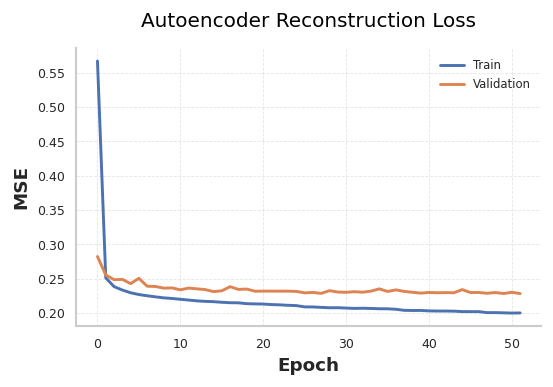

In [91]:
# Plot training and validation loss scores
# against the number of epochs.
plt.figure(figsize=(5, 3))
plt.plot(history_prellin_v6.history['loss'], label='Train')
plt.plot(history_prellin_v6.history['val_loss'], label='Validation')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')
plt.show()

In [92]:
latent_representation_v6 = latent_model_prellin_v6.predict(valid)
latent_representation_train_v6 = latent_model_prellin_v6.predict(train)

617/617 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
4916/4916 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step


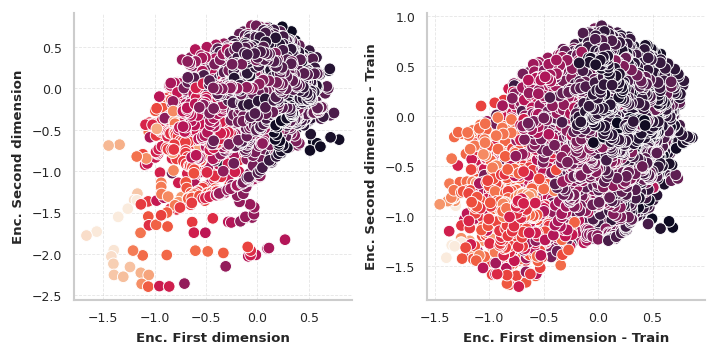

In [93]:
fig, axs = plt.subplots(1,2,figsize=(6, 3))

sns.scatterplot(x=latent_representation_v6[:,0],
                y=latent_representation_v6[:,1],
                c=y_enc_valid,
                palette='tab10',
                ax=axs[0])

sns.scatterplot(x=latent_representation_train_v6[:,0],
                y=latent_representation_train_v6[:,1],
                c=y_enc_train,
                palette='tab10',
                ax=axs[1]
                )

axs[0].set_xlabel("Enc. First dimension", fontsize=8)
axs[0].set_ylabel("Enc. Second dimension", fontsize=8)

axs[1].set_xlabel("Enc. First dimension - Train", fontsize=8)
axs[1].set_ylabel("Enc. Second dimension - Train", fontsize=8)

axs[0].grid(linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

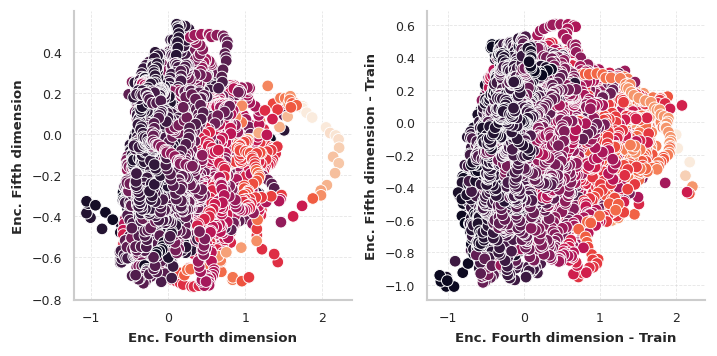

In [94]:
fig, axs = plt.subplots(1,2,figsize=(6, 3))

sns.scatterplot(x=latent_representation_v6[:,4],
                y=latent_representation_v6[:,5],
                c=y_enc_valid,
                palette='tab10',
                ax=axs[0])

sns.scatterplot(x=latent_representation_train_v6[:,4],
                y=latent_representation_train_v6[:,5],
                c=y_enc_train,
                palette='tab10',
                ax=axs[1]
                )

axs[0].set_xlabel("Enc. Fourth dimension", fontsize=8)
axs[0].set_ylabel("Enc. Fifth dimension", fontsize=8)

axs[1].set_xlabel("Enc. Fourth dimension - Train", fontsize=8)
axs[1].set_ylabel("Enc. Fifth dimension - Train", fontsize=8)

axs[0].grid(linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [95]:
latent_representation_v6_final = latent_model_prellin_v6.predict(X_enc)
latent_representation_v6_final_test = latent_model_prellin_v6.predict(X_enc_test)

5532/5532 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [96]:
X_enc.shape

(177024, 72, 3)

In [97]:
latent_representation_v6_final.shape

(177024, 8)

In [98]:
df_train["enc_01_v6"] = latent_representation_v6_final[:,0]
df_train["enc_02_v6"] = latent_representation_v6_final[:,1]
df_train["enc_03_v6"] = latent_representation_v6_final[:,2]
df_train["enc_04_v6"] = latent_representation_v6_final[:,3]
df_train["enc_05_v6"] = latent_representation_v6_final[:,4]
df_train["enc_06_v6"] = latent_representation_v6_final[:,5]
df_train["enc_07_v6"] = latent_representation_v6_final[:,6]
df_train["enc_08_v6"] = latent_representation_v6_final[:,7]

df_test["enc_01_v6"] = latent_representation_v6_final_test[:,0]
df_test["enc_02_v6"] = latent_representation_v6_final_test[:,1]
df_test["enc_03_v6"] = latent_representation_v6_final_test[:,2]
df_test["enc_04_v6"] = latent_representation_v6_final_test[:,3]
df_test["enc_05_v6"] = latent_representation_v6_final_test[:,4]
df_test["enc_06_v6"] = latent_representation_v6_final_test[:,5]
df_test["enc_07_v6"] = latent_representation_v6_final_test[:,6]
df_test["enc_08_v6"] = latent_representation_v6_final_test[:,7]

In [99]:
df_train.isnull().sum().sum(), df_test.isnull().sum().sum(), df_train.shape, df_test.shape

(0, 0, (177024, 692), (3644, 691))

##### STORE ENCODED FEATURES from Model 6:

In [100]:
#df_train.to_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/train_cluster_enc_v6.csv")
#df_test.to_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/test_cluster_enc_v6.csv")

df_train = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/train_cluster_enc_v6.csv", index_col=0)
df_test = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/test_cluster_enc_v6.csv", index_col=0)

##### Test Correlations:

In [101]:
df_train[['PC_1', 'PC_2', 'PC_3', 'enc_01_v6', 'enc_02_v6', 'enc_03_v6','enc_04_v6','enc_05_v6',
          'enc_06_v6','enc_07_v6','enc_08_v6',"bg+1:00"]].corr().style.background_gradient(cmap='viridis')

##### Submission Model 6:

In [102]:
recons, pred = autoencoder_prellin_v6.predict(X_enc_test)
#pred = y_test_pred

114/114 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


In [103]:
df_train_scaled=pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/X_train_scaled.csv", index_col=0)
df_test.shape

(3644, 691)

In [104]:
target_scaler = StandardScaler()
target_scaler.fit(df_train_scaled["bg+1:00"].values.reshape(-1, 1))

StandardScaler()

In [105]:
pred_resc = target_scaler.inverse_transform(pred.reshape(-1,1))

In [106]:
sub = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/sample_submission.csv")
sub.shape

(3644, 2)

In [107]:
sub["bg+1:00"] = pred_resc
sub["bg+1:00"]

0        8.861173
1        6.134916
2        7.427709
3       10.797711
4        6.352938
          ...    
3639     6.516623
3640    10.178872
3641     6.622346
3642     8.767309
3643     7.215529
Name: bg+1:00, Length: 3644, dtype: float32

In [108]:
sub.to_csv(f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/submissions/Submission_val_encoder_v6.csv", index=False)

#### MODEL 7 - Convol + Intake / 10 latent dimensions

In [109]:
cols_bg = ['bg-5:55', 'bg-5:50', 'bg-5:45', 'bg-5:40','bg-5:35', 'bg-5:30',
           'bg-5:25', 'bg-5:20', 'bg-5:15', 'bg-5:10','bg-5:05', 'bg-5:00',
           'bg-4:55', 'bg-4:50', 'bg-4:45', 'bg-4:40','bg-4:35', 'bg-4:30',
           'bg-4:25', 'bg-4:20', 'bg-4:15', 'bg-4:10','bg-4:05', 'bg-4:00',
           'bg-3:55', 'bg-3:50', 'bg-3:45', 'bg-3:40','bg-3:35', 'bg-3:30',
           'bg-3:25', 'bg-3:20', 'bg-3:15', 'bg-3:10','bg-3:05', 'bg-3:00',
           'bg-2:55', 'bg-2:50', 'bg-2:45', 'bg-2:40','bg-2:35', 'bg-2:30',
           'bg-2:25', 'bg-2:20', 'bg-2:15', 'bg-2:10','bg-2:05', 'bg-2:00',
           'bg-1:55', 'bg-1:50', 'bg-1:45', 'bg-1:40','bg-1:35', 'bg-1:30',
           'bg-1:25', 'bg-1:20', 'bg-1:15', 'bg-1:10','bg-1:05', 'bg-1:00',
           'bg-0:55', 'bg-0:50', 'bg-0:45', 'bg-0:40','bg-0:35', 'bg-0:30',
           'bg-0:25', 'bg-0:20', 'bg-0:15', 'bg-0:10','bg-0:05', 'bg-0:00']

cols_brake = ['brake-5:55', 'brake-5:50', 'brake-5:45', 'brake-5:40','brake-5:35', 'brake-5:30',
              'brake-5:25', 'brake-5:20', 'brake-5:15', 'brake-5:10','brake-5:05', 'brake-5:00',
              'brake-4:55', 'brake-4:50', 'brake-4:45', 'brake-4:40','brake-4:35', 'brake-4:30',
              'brake-4:25', 'brake-4:20', 'brake-4:15', 'brake-4:10','brake-4:05', 'brake-4:00',
              'brake-3:55', 'brake-3:50', 'brake-3:45', 'brake-3:40','brake-3:35', 'brake-3:30',
              'brake-3:25', 'brake-3:20', 'brake-3:15', 'brake-3:10','brake-3:05', 'brake-3:00',
              'brake-2:55', 'brake-2:50', 'brake-2:45', 'brake-2:40','brake-2:35', 'brake-2:30',
              'brake-2:25', 'brake-2:20', 'brake-2:15', 'brake-2:10','brake-2:05', 'brake-2:00',
              'brake-1:55', 'brake-1:50', 'brake-1:45', 'brake-1:40','brake-1:35', 'brake-1:30',
              'brake-1:25', 'brake-1:20', 'brake-1:15', 'brake-1:10','brake-1:05', 'brake-1:00',
              'brake-0:55', 'brake-0:50', 'brake-0:45', 'brake-0:40','brake-0:35', 'brake-0:30',
              'brake-0:25', 'brake-0:20', 'brake-0:15', 'brake-0:10','brake-0:05', 'brake-0:00']

cols_intake = ['intake-5:55', 'intake-5:50', 'intake-5:45', 'intake-5:40','intake-5:35', 'intake-5:30',
              'intake-5:25', 'intake-5:20', 'intake-5:15', 'intake-5:10','intake-5:05', 'intake-5:00',
              'intake-4:55', 'intake-4:50', 'intake-4:45', 'intake-4:40','intake-4:35', 'intake-4:30',
              'intake-4:25', 'intake-4:20', 'intake-4:15', 'intake-4:10','intake-4:05', 'intake-4:00',
              'intake-3:55', 'intake-3:50', 'intake-3:45', 'intake-3:40','intake-3:35', 'intake-3:30',
              'intake-3:25', 'intake-3:20', 'intake-3:15', 'intake-3:10','intake-3:05', 'intake-3:00',
              'intake-2:55', 'intake-2:50', 'intake-2:45', 'intake-2:40','intake-2:35', 'intake-2:30',
              'intake-2:25', 'intake-2:20', 'intake-2:15', 'intake-2:10','intake-2:05', 'intake-2:00',
              'intake-1:55', 'intake-1:50', 'intake-1:45', 'intake-1:40','intake-1:35', 'intake-1:30',
              'intake-1:25', 'intake-1:20', 'intake-1:15', 'intake-1:10','intake-1:05', 'intake-1:00',
              'intake-0:55', 'intake-0:50', 'intake-0:45', 'intake-0:40','intake-0:35', 'intake-0:30',
              'intake-0:25', 'intake-0:20', 'intake-0:15', 'intake-0:10','intake-0:05', 'intake-0:00']

In [110]:
X_enc = df_train[["p_num","obv_n"]+cols_bg+cols_brake+cols_intake]
y_enc = df_train["bg+1:00"]
X_enc_test = df_test[cols_bg+cols_brake+cols_intake]
X_enc.shape, X_enc_test.shape

((177024, 218), (3644, 216))

In [111]:
X_enc.isnull().sum().sum(), y_enc.isna().sum()
#y_enc[:10]

(0, 0)

In [112]:
p1_val = list(X_enc[(X_enc["p_num"]=="p01")&(X_enc["obv_n"]>=7600)].index)
p2_val = list(X_enc[(X_enc["p_num"]=="p02")&(X_enc["obv_n"]>=22500)].index)
p3_val = list(X_enc[(X_enc["p_num"]=="p03")&(X_enc["obv_n"]>=23000)].index)
p4_val = list(X_enc[(X_enc["p_num"]=="p04")&(X_enc["obv_n"]>=22000)].index)
p5_val = list(X_enc[(X_enc["p_num"]=="p05")&(X_enc["obv_n"]>=7600)].index)
p6_val = list(X_enc[(X_enc["p_num"]=="p06")&(X_enc["obv_n"]>=7600)].index)
p10_val = list(X_enc[(X_enc["p_num"]=="p10")&(X_enc["obv_n"]>=22500)].index)
p11_val = list(X_enc[(X_enc["p_num"]=="p11")&(X_enc["obv_n"]>=22000)].index)
p12_val = list(X_enc[(X_enc["p_num"]=="p12")&(X_enc["obv_n"]>=22500)].index)

matrix_val = p1_val+p2_val+p3_val+p4_val+p5_val+p6_val+p10_val+p11_val+p12_val
len(matrix_val)/X_enc.shape[0]

X_enc_train = X_enc.drop(matrix_val)
X_enc_valid = X_enc.loc[matrix_val]

y_enc_train = y_enc.drop(matrix_val)
y_enc_valid = y_enc.loc[matrix_val]

X_enc_train.drop(["p_num","obv_n"], axis=1, inplace=True)
X_enc_valid.drop(["p_num","obv_n"], axis=1, inplace=True)
X_enc.drop(["p_num","obv_n"], axis=1, inplace=True)

X_enc_train.shape, X_enc_valid.shape, X_enc.shape, y_enc_train.shape, y_enc_valid.shape, y_enc.shape

((157300, 216), (19724, 216), (177024, 216), (157300,), (19724,), (177024,))

In [113]:
# Assuming your data is in a NumPy array called 'data'
train = X_enc_train.values.reshape((-1, 72, 3))  # Reshape for LSTM
valid = X_enc_valid.values.reshape((-1, 72, 3))
X_enc = X_enc.values.reshape((-1, 72, 3))
X_enc_test = X_enc_test.values.reshape((-1, 72, 3))

y_enc_train = y_enc_train.values.reshape((-1, 1))
y_enc_valid = y_enc_valid.values.reshape((-1, 1))

In [114]:
def dense_block(cells, dropout=0.3,activation="selu", reg=0.0, name=None):
  if activation == "selu":
    block = keras.Sequential(name=name)
    block.add(Dense(cells,
                    activity_regularizer=keras.regularizers.l1(reg),
                    name=f"{name}_dense",
                    kernel_initializer="lecun_normal"))
    block.add(layers.BatchNormalization(name=f"{name}_bn"))
    block.add(layers.Activation(activation, name=f"{name}_activ"))
    block.add(layers.AlphaDropout(dropout, name=f"{name}_do_alpha"))

  else:
    block = keras.Sequential(name=name)
    block.add(Dense(cells,
                    activity_regularizer=keras.regularizers.l1(reg),
                    name=f"{name}_dense",
                    kernel_initializer="he_normal"))
    block.add(layers.BatchNormalization(name=f"{name}_bn"))
    block.add(layers.Activation(activation, name=f"{name}_activ"))
    block.add(layers.Dropout(dropout, name=f"{name}_do"))

  return block


def model_autoencoder_v7():
  input_dim = 72
  latent_vec_dim = 10

  # 2. Build the autoencoder model
  input_ts = keras.Input(shape=(input_dim, 3))

  # Encoder
  x = layers.Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(input_ts)
  x = layers.MaxPooling1D(pool_size=2)(x)
  x = layers.Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(x)
  x = layers.MaxPooling1D(pool_size=2)(x)
  x = layers.Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(x)
  x = layers.MaxPooling1D(pool_size=2)(x)
  x = layers.Flatten()(x)
  encoded = layers.Dense(latent_vec_dim, activation='linear', kernel_regularizer = tf.keras.regularizers.L2(l2=0.1))(x)  # Bottleneck layer with 5 dimensions

  output_1 = Dense(1, activation='linear', name="Reg_Output")(encoded)

  #encoder = encoded

  # Decoder
  x = layers.Dense(9 * 32)(encoded)  # Adjusted output size
  x = layers.Reshape((9, 32))(x)  # Adjusted reshape
  x = layers.Conv1DTranspose(filters=32, kernel_size=3, activation='relu', padding='same')(x)
  x = layers.UpSampling1D(size=2)(x)
  x = layers.Conv1DTranspose(filters=64, kernel_size=3, activation='relu', padding='same')(x)
  x = layers.UpSampling1D(size=2)(x)
  x = layers.Conv1DTranspose(filters=128, kernel_size=3, activation='relu', padding='same')(x)
  x = layers.UpSampling1D(size=2)(x)
  decoded = layers.Conv1D(filters=3, kernel_size=3, activation='linear', padding='same', name="decoded")(x)

  # Connect both encoder and decoder
  autoencoder_mult = Model(inputs = input_ts, outputs = [decoded, output_1], name="Deep_Autoencoder")

  # Latent representation (Optional)
  latent_model = Model(input_ts, encoded)

  return autoencoder_mult, latent_model

In [115]:
autoencoder_prellin_v7, latent_model_prellin_v7 = model_autoencoder_v7()

# Get summary
autoencoder_prellin_v7.summary()

Model: "Deep_Autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 72, 3)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_5 (Conv1D)         │ (None, 72, 128)        │          1,280 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_5           │ (None, 36, 128)        │              0 │ conv1d_5[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_6 (Conv1D)         │ (None, 36, 64)         │         24,640 │ max_pooling1d_5[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_6           │ (None, 18, 64)         │              0 │ conv1d_6[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_7 (Conv1D)         │ (None, 18, 32)         │          6,176 │ max_pooling1d_6[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_7           │ (None, 9, 32)          │              0 │ conv1d_7[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_2 (Flatten)       │ (None, 288)            │              0 │ max_pooling1d_7[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 10)             │          2,890 │ flatten_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 288)            │          3,168 │ dense_4[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_2 (Reshape)       │ (None, 9, 32)          │              0 │ dense_5[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_transpose_5        │ (None, 9, 32)          │          3,104 │ reshape_2[0][0]        │
│ (Conv1DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling1d_5           │ (None, 18, 32)         │              0 │ conv1d_transpose_5[0]… │
│ (UpSampling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_transpose_6        │ (None, 18, 64)         │          6,208 │ up_sampling1d_5[0][0]  │
│ (Conv1DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling1d_6           │ (None, 36, 64)         │              0 │ conv1d_transpose_6[0]… │
│ (UpSampling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_transpose_7   

 Total params: 73,336 (286.47 KB)

 Trainable params: 73,336 (286.47 KB)

 Non-trainable params: 0 (0.00 B)

In [116]:
lr = keras.callbacks.ReduceLROnPlateau(monitor="val_Reg_Output_root_mean_squared_error",
                        factor=0.75,
                        patience=10,
                        verbose=1,
                        mode="min")

early_stop = keras.callbacks.EarlyStopping(monitor="val_Reg_Output_root_mean_squared_error",
                            patience=25,
                            verbose=1,
                            mode="min",
                            restore_best_weights=True)


checkpoint_filepath = '/checkpoint/best_weights_v7.weights.h5'

Checkpoint = keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                 save_weights_only=True,
                                                 monitor="val_Reg_Output_root_mean_squared_error",
                                                 mode='min')

In [117]:
# Compile the autoencoder model
optimizer = keras.optimizers.Adam(learning_rate=0.0005)
loss_0 = 'mse'
loss_1 = 'mse'

autoencoder_prellin_v7.compile(loss=[loss_0, loss_1], loss_weights=[0.6,0.40], optimizer=optimizer, metrics={'decoded': 'mse','Reg_Output': RootMeanSquaredError()})

# Train the autoencoder with MNIST data
history_prellin_v7 = autoencoder_prellin_v7.fit(train, [train, y_enc_train], epochs=121, batch_size=256, callbacks = [early_stop, Checkpoint, lr],
                                                 shuffle=True, validation_data=(valid, [valid, y_enc_valid]))

Epoch 1/121
615/615 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - Reg_Output_root_mean_squared_error: 0.7719 - decoded_mse: 0.3612 - loss: 1.1891 - val_Reg_Output_root_mean_squared_error: 0.7351 - val_decoded_mse: 0.1250 - val_loss: 0.3092 - learning_rate: 5.0000e-04
Epoch 2/121
615/615 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Reg_Output_root_mean_squared_error: 0.7042 - decoded_mse: 0.1124 - loss: 0.2796 - val_Reg_Output_root_mean_squared_error: 0.7073 - val_decoded_mse: 0.1146 - val_loss: 0.2769 - learning_rate: 5.0000e-04
Epoch 3/121
615/615 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Reg_Output_root_mean_squared_error: 0.6884 - decoded_mse: 0.1032 - loss: 0.2588 - val_Reg_Output_root_mean_squared_error: 0.7004 - val_decoded_mse: 0.1082 - val_loss: 0.2675 - learning_rate: 5.0000e-04
Epoch 4/121
615/615 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Reg_Output_root_mean_squared_error: 0.6831 - decoded_mse: 0.1005 - loss: 0.2530 - val_Reg_Output_root_mean_squared_error: 0.7013 - val_decoded_mse: 0.1046 - val_loss: 0.265

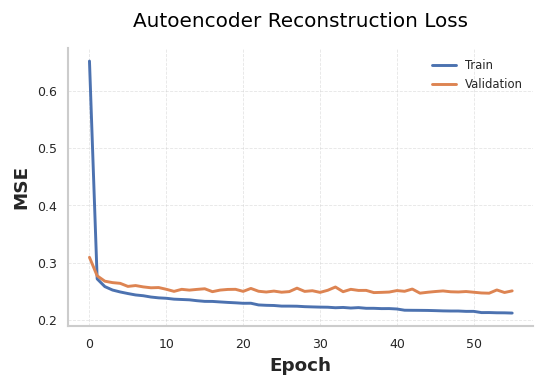

In [118]:
# Plot training and validation loss scores
# against the number of epochs.
plt.figure(figsize=(5, 3))
plt.plot(history_prellin_v7.history['loss'], label='Train')
plt.plot(history_prellin_v7.history['val_loss'], label='Validation')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')
plt.show()

In [119]:
latent_representation_v7 = latent_model_prellin_v7.predict(valid)
latent_representation_train_v7 = latent_model_prellin_v7.predict(train)

617/617 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
4916/4916 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step


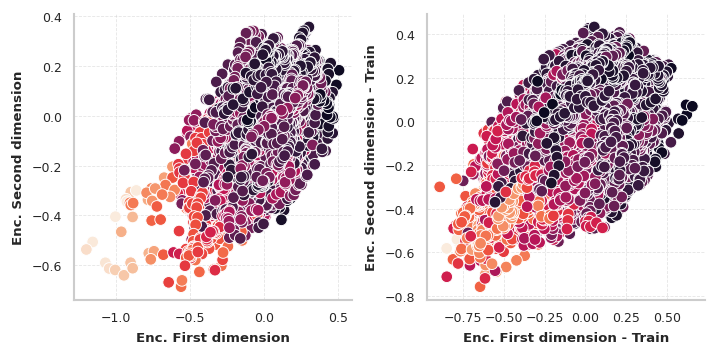

In [120]:
fig, axs = plt.subplots(1,2,figsize=(6, 3))

sns.scatterplot(x=latent_representation_v7[:,0],
                y=latent_representation_v7[:,1],
                c=y_enc_valid,
                palette='tab10',
                ax=axs[0])

sns.scatterplot(x=latent_representation_train_v7[:,0],
                y=latent_representation_train_v7[:,1],
                c=y_enc_train,
                palette='tab10',
                ax=axs[1]
                )

axs[0].set_xlabel("Enc. First dimension", fontsize=8)
axs[0].set_ylabel("Enc. Second dimension", fontsize=8)

axs[1].set_xlabel("Enc. First dimension - Train", fontsize=8)
axs[1].set_ylabel("Enc. Second dimension - Train", fontsize=8)

axs[0].grid(linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

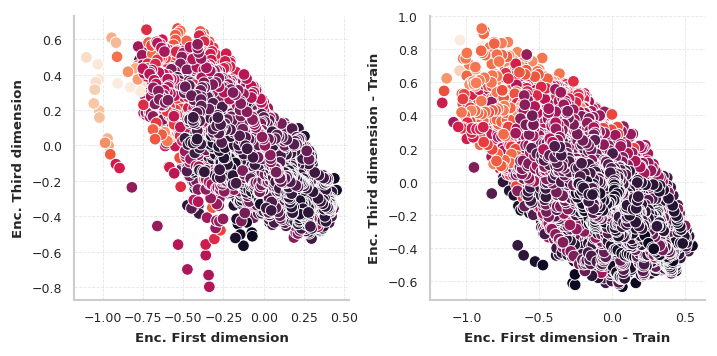

In [121]:
fig, axs = plt.subplots(1,2,figsize=(6, 3))

sns.scatterplot(x=latent_representation_v7[:,5],
                y=latent_representation_v7[:,6],
                c=y_enc_valid,
                palette='tab10',
                ax=axs[0])

sns.scatterplot(x=latent_representation_train_v7[:,5],
                y=latent_representation_train_v7[:,6],
                c=y_enc_train,
                palette='tab10',
                ax=axs[1]
                )

axs[0].set_xlabel("Enc. First dimension", fontsize=8)
axs[0].set_ylabel("Enc. Third dimension", fontsize=8)

axs[1].set_xlabel("Enc. First dimension - Train", fontsize=8)
axs[1].set_ylabel("Enc. Third dimension - Train", fontsize=8)

axs[0].grid(linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [122]:
latent_representation_v7_final = latent_model_prellin_v7.predict(X_enc)
latent_representation_v7_final_test = latent_model_prellin_v7.predict(X_enc_test)

5532/5532 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [123]:
X_enc.shape

(177024, 72, 3)

In [124]:
latent_representation_v7_final.shape

(177024, 10)

In [125]:
df_train["enc_01_v7"] = latent_representation_v7_final[:,0]
df_train["enc_02_v7"] = latent_representation_v7_final[:,1]
df_train["enc_03_v7"] = latent_representation_v7_final[:,2]
df_train["enc_04_v7"] = latent_representation_v7_final[:,3]
df_train["enc_05_v7"] = latent_representation_v7_final[:,4]
df_train["enc_06_v7"] = latent_representation_v7_final[:,5]
df_train["enc_07_v7"] = latent_representation_v7_final[:,6]
df_train["enc_08_v7"] = latent_representation_v7_final[:,7]
df_train["enc_09_v7"] = latent_representation_v7_final[:,8]
df_train["enc_10_v7"] = latent_representation_v7_final[:,9]

df_test["enc_01_v7"] = latent_representation_v7_final_test[:,0]
df_test["enc_02_v7"] = latent_representation_v7_final_test[:,1]
df_test["enc_03_v7"] = latent_representation_v7_final_test[:,2]
df_test["enc_04_v7"] = latent_representation_v7_final_test[:,3]
df_test["enc_05_v7"] = latent_representation_v7_final_test[:,4]
df_test["enc_06_v7"] = latent_representation_v7_final_test[:,5]
df_test["enc_07_v7"] = latent_representation_v7_final_test[:,6]
df_test["enc_08_v7"] = latent_representation_v7_final_test[:,7]
df_test["enc_09_v7"] = latent_representation_v7_final_test[:,8]
df_test["enc_10_v7"] = latent_representation_v7_final_test[:,9]

In [126]:
df_train.isnull().sum().sum(), df_test.isnull().sum().sum(), df_train.shape, df_test.shape

(0, 0, (177024, 702), (3644, 701))

##### STORE ENCODED FEATURES from Model 7:

In [127]:
df_train.to_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/train_cluster_enc_v7.csv")
df_test.to_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/test_cluster_enc_v7.csv")

df_train = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/train_cluster_enc_v7.csv", index_col=0)
df_test = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/test_cluster_enc_v7.csv", index_col=0)

##### Test Correlations:

In [128]:
df_train[['PC_1', 'PC_2', 'PC_3', 'enc_01_v7', 'enc_02_v7', 'enc_03_v7','enc_04_v7','enc_05_v7',
          'enc_06_v7','enc_07_v7','enc_08_v7',"bg+1:00"]].corr().style.background_gradient(cmap='viridis')

##### Submission Model 7:

In [129]:
recons, pred = autoencoder_prellin_v7.predict(X_enc_test)
#pred = y_test_pred

114/114 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


In [130]:
df_train_scaled=pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/X_train_scaled.csv", index_col=0)
df_test.shape

(3644, 701)

In [131]:
target_scaler = StandardScaler()
target_scaler.fit(df_train_scaled["bg+1:00"].values.reshape(-1, 1))

StandardScaler()

In [132]:
pred_resc = target_scaler.inverse_transform(pred.reshape(-1,1))

In [133]:
sub = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/sample_submission.csv")
sub.shape

(3644, 2)

In [134]:
sub["bg+1:00"] = pred_resc
sub["bg+1:00"]

0        8.998234
1        5.666031
2        7.006019
3       10.906050
4        7.223146
          ...    
3639     6.306315
3640     9.324853
3641     7.049063
3642     8.368939
3643     7.170988
Name: bg+1:00, Length: 3644, dtype: float32

In [135]:
sub.to_csv(f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/submissions/Submission_val_encoder_v7.csv", index=False)

## Encoded Features Analysis:

In [138]:
list_columns_final = list(df_train.columns)
new_features = list_columns_final[:4]+list_columns_final[-50:]+["bg-0:00"]
new_features_test = list_columns_final[:4]+list_columns_final[-49:]+["bg-0:00"]
#print(new_features_test)
#new_features_test = new_features.remove("bg+1:00")
new_features_df = df_train[new_features]
new_features_df_test = df_test[new_features_test]
new_features_df_test.shape,new_features_df.shape

((3644, 54), (177024, 55))

In [139]:
new_features

['p_num',
 'hour',
 'minute',
 'obv_n',
 'bg+1:00',
 'cluster',
 'cluster_pca',
 'PC_1',
 'PC_2',
 'PC_3',
 'enc_0_v1',
 'enc_1_v1',
 'enc_00_v2',
 'enc_01_v2',
 'enc_02_v2',
 'enc_01_v3',
 'enc_02_v3',
 'enc_03_v3',
 'enc_04_v3',
 'enc_05_v3',
 'enc_01_v4',
 'enc_02_v4',
 'enc_03_v4',
 'enc_04_v4',
 'enc_05_v4',
 'enc_06_v4',
 'enc_07_v4',
 'enc_08_v4',
 'enc_01_v5',
 'enc_02_v5',
 'enc_03_v5',
 'enc_04_v5',
 'enc_05_v5',
 'enc_06_v5',
 'enc_07_v5',
 'enc_08_v5',
 'enc_01_v6',
 'enc_02_v6',
 'enc_03_v6',
 'enc_04_v6',
 'enc_05_v6',
 'enc_06_v6',
 'enc_07_v6',
 'enc_08_v6',
 'enc_01_v7',
 'enc_02_v7',
 'enc_03_v7',
 'enc_04_v7',
 'enc_05_v7',
 'enc_06_v7',
 'enc_07_v7',
 'enc_08_v7',
 'enc_09_v7',
 'enc_10_v7',
 'bg-0:00']

In [140]:
new_features_df.drop(columns=['p_num','hour','minute','obv_n']).corr().style.background_gradient(cmap='viridis')

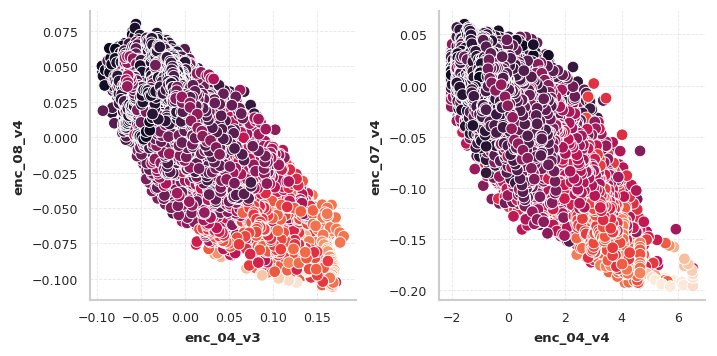

In [141]:
fig, axs = plt.subplots(1,2,figsize=(6, 3))

sns.scatterplot(x=new_features_df["enc_04_v3"],
                y=new_features_df["enc_08_v4"],
                c=new_features_df["bg+1:00"],
                palette='tab10',
                ax=axs[0])

sns.scatterplot(x=new_features_df["bg-0:00"],
                y=new_features_df["enc_07_v4"],
                c=new_features_df["bg+1:00"],
                palette='tab10',
                ax=axs[1]
                )

axs[0].set_xlabel("enc_04_v3", fontsize=8)
axs[0].set_ylabel("enc_08_v4", fontsize=8)

axs[1].set_xlabel("enc_04_v4", fontsize=8)
axs[1].set_ylabel("enc_07_v4", fontsize=8)

axs[0].grid(linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

### **FEATURES SELECTIONS**

##### **Select K-Best**

In [142]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest, f_regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Separate features (X) and target variable (y)

X = new_features_df.drop(["p_num","obv_n", "bg+1:00","cluster",	"cluster_pca","bg-0:00","hour",	"minute"], axis=1)
y = new_features_df["bg+1:00"]
X_test_lasso = new_features_df_test.drop(["p_num","obv_n", "cluster",	"cluster_pca","bg-0:00","hour",	"minute"], axis=1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Perform feature selection with cross-validation
k_best = 25
selector = SelectKBest(score_func=f_regression, k=k_best)
X_train_selected = selector.fit_transform(X_train, y_train)
selected_feature_indices = selector.get_support(indices=True)
X_test_selected = selector.transform(X_test)

# Train and evaluate a regression model with the selected features
model = LinearRegression()

# Perform cross-validation on the training data with selected features
cv_scores = cross_val_score(model, X_train_selected, y_train, cv=5, scoring='neg_root_mean_squared_error')

# Print cross-validation scores (RMSE)
print("Cross-validation RMSE scores:", -cv_scores)  # Negate to get positive RMSE values
print("Average cross-validation RMSE score:", -cv_scores.mean())

# Train the model on the full training data with selected features
model.fit(X_train_selected, y_train)

# Predict on the test data
y_pred = model.predict(X_test_selected)

# Calculate RMSE on the test data
rmse = mean_squared_error(y_test, y_pred, squared=False)  # squared=False for RMSE
print("Test RMSE:", rmse)

Cross-validation RMSE scores: [0.62705078 0.63015363 0.6382381  0.63899686 0.63431771]
Average cross-validation RMSE score: 0.6337514174563076
Test RMSE: 0.64152368044619


In [143]:
X.columns[selected_feature_indices]

Index(['enc_0_v1', 'enc_1_v1', 'enc_00_v2', 'enc_01_v2', 'enc_02_v3',
       'enc_03_v3', 'enc_04_v3', 'enc_05_v3', 'enc_01_v4', 'enc_02_v4',
       'enc_03_v4', 'enc_04_v4', 'enc_05_v4', 'enc_06_v4', 'enc_07_v4',
       'enc_08_v4', 'enc_04_v5', 'enc_06_v5', 'enc_07_v5', 'enc_01_v6',
       'enc_05_v6', 'enc_07_v6', 'enc_03_v7', 'enc_04_v7', 'enc_07_v7'],
      dtype='object')

##### LassoCV:

In [160]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform feature selection with cross-validation using LassoCV
model = LassoCV(cv=5, random_state=42)  # 5-fold cross-validation
model.fit(X_train, y_train)

# Get the selected features
selected_feature_indices = model.coef_ != 0
X_train_selected = X_train.loc[:, selected_feature_indices]
X_test_selected = X_test.loc[:, selected_feature_indices]

# Print the number of selected features
print("Number of selected features:", sum(selected_feature_indices))

# Evaluate the model with cross-validation
cv_scores = cross_val_score(model, X_train_selected, y_train, cv=5, scoring='neg_root_mean_squared_error')

# Print cross-validation scores (RMSE)
print("Cross-validation RMSE scores:", -cv_scores)
print("Average cross-validation RMSE score:", -cv_scores.mean())

# Predict on the test data
y_pred = model.predict(X_test)

y_test_pred = model.predict(X_test_lasso)

# Calculate RMSE on the test data
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Test RMSE:", rmse)

Number of selected features: 11
Cross-validation RMSE scores: [0.63196061 0.63462721 0.64334794 0.64322406 0.63870951]
Average cross-validation RMSE score: 0.6383738648386974
Test RMSE: 0.6463744058432955


In [146]:
selected_features_final = X.columns[selected_feature_indices]
selected_features_final

Index(['PC_1', 'PC_3', 'enc_01_v6', 'enc_04_v6', 'enc_05_v6', 'enc_07_v6',
       'enc_01_v7', 'enc_02_v7', 'enc_03_v7', 'enc_04_v7', 'enc_09_v7'],
      dtype='object')

In [173]:
new_feat = ['enc_0_v1','enc_03_v4', "enc_01_v4", 'enc_01_v6', 'enc_04_v6', 'enc_05_v6',
            'enc_07_v6','enc_01_v7', 'enc_02_v7', 'enc_03_v7', 'enc_04_v7', 'enc_09_v7']
new_feat = list(set(new_feat))

df_train.head()

p_num  hour  minute  obv_n  brake-5:55  brake-5:50  brake-5:45  \
id                                                                     
p01_0   p01     6      10    0.0   -1.157431   -1.143185   -1.169954   
p01_1   p01     6      25    1.0   -1.118211   -1.142661   -1.155765   
p01_2   p01     6      40    2.0   -1.064244   -1.091012   -1.134496   
p01_3   p01     6      55    3.0   -1.081109   -1.106353   -1.123390   
p01_4   p01     7      10    4.0   -1.023167   -1.062014   -1.104278   

       brake-5:40  brake-5:35  brake-5:30  brake-5:25  brake-5:20  brake-5:15  \
id                                                                              
p01_0   -1.207103   -1.245293   -1.272997   -1.301345   -1.334866   -1.370234   
p01_1   -1.184454   -1.219376   -1.257748   -1.294172   -1.330247   -1.358414   
p01_2   -1.173724   -1.212690   -1.241066   -1.271696   -1.304910   -1.337880   
p01_3   -1.150911   -1.187392   -1.224852   -1.259297   -1.291313   -1.322548   
p01_4   -1.140611   -1.175523   -1.209045   -1.241753   -1.272413   -1.300604   

       brake-5:10  brake-5:05  brake-5:00  brake-4:55  brake-4:50  brake-4:45  \
id                                                                              
p01_0   -1.397142   -1.430575   -1.454937   -1.477174   -1.498075   -1.523195   
p01_1   -1.383418   -1.407105   -1.435910   -1.462353   -1.484797   -1.502670   
p01_2   -1.367635   -1.394151   -1.415986   -1.437668   -1.456877   -1.480236   
p01_3   -1.347414   -1.368584   -1.394153   -1.416460   -1.432216   -1.442521   
p01_4   -1.326911   -1.346195   -1.360692   -1.375837   -1.390442   -1.405929   

       brake-4:40  brake-4:35  brake-4:30  brake-4:25  brake-4:20  brake-4:15  \
id                                                                              
p01_0   -1.546026   -1.565938   -1.580628   -1.595535   -1.608597   -1.626168   
p01_1   -1.520559   -1.536555   -1.556921   -1.573495   -1.584605   -1.590570   
p01_2   -1.499697   -1.513807   -1.522684   -1.531385   -1.540253   -1.549908   
p01_3   -1.453963   -1.465965   -1.478026   -1.488608   -1.501407   -1.516625   
p01_4   -1.419434   -1.434513   -1.452041   -1.467694   -1.485268   -1.504638   

       brake-4:10  brake-4:05  brake-4:00  brake-3:55  brake-3:50  brake-3:45  \
id                                                                              
p01_0   -1.640264   -1.648749   -1.651859   -1.654809   -1.658605   -1.663082   
p01_1   -1.596059   -1.602269   -1.609212   -1.615286   -1.622093   -1.631938   
p01_2   -1.557957   -1.566461   -1.578233   -1.589580   -1.602311   -1.616730   
p01_3   -1.530403   -1.545966   -1.562654   -1.580411   -1.596375   -1.611569   
p01_4   -1.524026   -1.541700   -1.558858   -1.577663   -1.594845   -1.609278   

       brake-3:40  brake-3:35  brake-3:30  brake-3:25  brake-3:20  brake-3:15  \
id                                                                              
p01_0   -1.666331   -1.670034   -1.677567   -1.684440   -1.693137   -1.704127   
p01_1   -1.641032   -1.651504   -1.664660   -1.678620   -1.690982   -1.702813   
p01_2   -1.632097   -1.646085   -1.659362   -1.674426   -1.687838   -1.698734   
p01_3   -1.628231   -1.643317   -1.655857   -1.670310   -1.682709   -1.696637   
p01_4   -1.624854   -1.639451   -1.655774   -1.669475   -1.685700   -1.698500   

       brake-3:10  brake-3:05  brake-3:00  brake-2:55  brake-2:50  brake-2:45  \
id                                                                              
p01_0   -1.716623   -1.727405   -1.737783   -1.749894   -1.760841   -1.769188   
p01_1   -1.716001   -1.727171   -1.736295   -1.747374   -1.756933   -1.767735   
p01_2   -1.711271   -1.722026   -1.734561   -1.745865   -1.759890   -1.771257   
p01_3   -1.708887   -1.723741   -1.734992   -1.745346   -1.722960   -1.711354   
p01_4   -1.710248   -1.687260   -1.675979   -1.665612   -1.656120   -1.643693   

       brake-2:40  brake-2:35  brake-2:30  brake-2:25  brake-2:20  brake-2:15  \
id          

##### 3.0 RFE

In [149]:
from sklearn.model_selection import train_test_split, cross_val_score, TimeSeriesSplit
from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Recursive Feature Elimination (RFE) with cross-validation
estimator = LinearRegression()
selector = RFECV(estimator, step=1, cv=5, scoring='neg_root_mean_squared_error')
selector = selector.fit(X_train, y_train)

# Get the selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Print the number of selected features
print("Number of features selected by RFE:", selector.n_features_)

# Evaluate the model with cross-validation
cv_scores = cross_val_score(estimator, X_train_selected, y_train, cv=5, scoring='neg_root_mean_squared_error')

# Print cross-validation scores (RMSE)
print("Cross-validation RMSE scores (RFE):", -cv_scores)
print("Average cross-validation RMSE score (RFE):", -cv_scores.mean())

# Train the model on the full training data with selected features
estimator.fit(X_train_selected, y_train)

# Predict on the test data
y_pred = estimator.predict(X_test_selected)

# Calculate RMSE on the test data
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Test RMSE (RFE):", rmse)

Number of features selected by RFE: 44
Cross-validation RMSE scores (RFE): [0.62597099 0.62773495 0.6363919  0.6371255  0.63240919]
Average cross-validation RMSE score (RFE): 0.6319265063306931
Test RMSE (RFE): 0.639267470868458


In [159]:
selector.ranking_
selector.get_feature_names_out()

array(['PC_2', 'PC_3', 'enc_0_v1', 'enc_1_v1', 'enc_00_v2', 'enc_01_v2',
       'enc_02_v2', 'enc_01_v3', 'enc_02_v3', 'enc_03_v3', 'enc_04_v3',
       'enc_05_v3', 'enc_01_v4', 'enc_02_v4', 'enc_03_v4', 'enc_04_v4',
       'enc_05_v4', 'enc_06_v4', 'enc_07_v4', 'enc_08_v4', 'enc_01_v5',
       'enc_02_v5', 'enc_03_v5', 'enc_04_v5', 'enc_05_v5', 'enc_06_v5',
       'enc_07_v5', 'enc_08_v5', 'enc_01_v6', 'enc_02_v6', 'enc_03_v6',
       'enc_04_v6', 'enc_05_v6', 'enc_06_v6', 'enc_07_v6', 'enc_08_v6',
       'enc_02_v7', 'enc_03_v7', 'enc_04_v7', 'enc_05_v7', 'enc_06_v7',
       'enc_07_v7', 'enc_08_v7', 'enc_09_v7'], dtype=object)

In [163]:
X.head()
#X_train_selected.shape, X.shape

PC_1       PC_2      PC_3  enc_0_v1  enc_1_v1  enc_00_v2  \
id                                                                     
p01_0  14.063925  10.131723  1.246828  0.108894  0.116497  -0.154217   
p01_1  14.887753   9.640414 -0.345446  0.090939  0.105597  -0.139794   
p01_2  15.613632   8.875769 -1.923373  0.063150  0.086909  -0.127549   
p01_3  16.325735   7.799258 -3.189621  0.085107  0.103928  -0.129884   
p01_4  17.013631   6.433715 -4.050562  0.062972  0.089077  -0.116193   

       enc_01_v2  enc_02_v2  enc_01_v3  enc_02_v3  enc_03_v3  enc_04_v3  \
id                                                                        
p01_0   0.071646  -0.053600  -0.047929   0.053118  -0.110389   0.033042   
p01_1   0.054354  -0.035555  -0.046454   0.051265  -0.106389   0.030995   
p01_2   0.040976  -0.020185  -0.042732   0.047434  -0.099174   0.025541   
p01_3   0.042880  -0.018223  -0.042294   0.053737  -0.096429   0.026957   
p01_4   0.028437   0.001706  -0.037259   0.055229  -0.090476   0.021378   

       enc_05_v3  enc_01_v4  enc_02_v4  enc_03_v4  enc_04_v4  enc_05_v4  \
id                                                                        
p01_0  -0.043939   0.096896   0.044208  -0.027844   0.068319   0.053643   
p01_1  -0.032623   0.093998   0.039130  -0.023101   0.062425   0.050692   
p01_2  -0.019088   0.091754   0.033688  -0.019369   0.057620   0.048280   
p01_3  -0.016382   0.095481   0.031139  -0.021511   0.059170   0.050065   
p01_4  -0.011392   0.093231   0.024851  -0.017984   0.055990   0.049470   

       enc_06_v4  enc_07_v4  enc_08_v4  enc_01_v5  enc_02_v5  enc_03_v5  \
id                                                                        
p01_0   0.036929  -0.070021  -0.053227   0.142855  -0.093135   0.067518   
p01_1   0.032834  -0.068847  -0.053775   0.133104  -0.091971   0.081104   
p01_2   0.029347  -0.068987  -0.053903   0.124532  -0.097793   0.084737   
p01_3   0.030975  -0.074195  -0.055053   0.132864  -0.132345   0.058569   
p01_4   0.026731  -0.072699  -0.052600   0.115326  -0.143750   0.079797   

       enc_04_v5  enc_05_v5  enc_06_v5  enc_07_v5  enc_08_v5  enc_01_v6  \
id                                                                        
p01_0  -0.057473   0.397427  -0.271274  -0.306117   0.063822   0.004859   
p01_1  -0.027504   0.400844  -0.253137  -0.280120   0.033626   0.024659   
p01_2   0.000803   0.408399  -0.235796  -0.249999   0.006455   0.063011   
p01_3   0.003658   0.428275  -0.242442  -0.241465   0.001194   0.001419   
p01_4   0.027227   0.425076  -0.207577  -0.203903  -0.020021   0.018895   

       enc_02_v6  enc_03_v6  enc_04_v6  enc_05_v6  enc_06_v6  enc_07_v6  \
id                                                                        
p01_0  -0.687674   0.003666  -0.534354   0.959677  -0.081663   0.089535   
p01_1  -0.717357  -0.051618  -0.516102   0.902096  -0.083264   0.102675   
p01_2  -0.733418  -0.102164  -0.488682   0.820825  -0.092496   0.140971   
p01_3  -0.801702  -0.139987  -0.503975   0.794484  -0.108048   0.064394   
p01_4  -0.801276  -0.169651  -0.486632   0.695896  -0.136832   0.090994   

       enc_08_v6  enc_01_v7  enc_02_v7  enc_03_v7  enc_04_v7  enc_05_v7  \
id                                                                        
p01_0   0.231611  -0.080332  -0.219044  -0.415802   0.339221  -0.109781   
p01_1   0.252309  -0.070387  -0.226204  -0.393310   0.325222  -0.116548   
p01_2   0.268515  -0.061362  -0.233092  -0.377767   0.313451  -0.125392   
p01_3   0.271151  -0.096059  -0.275286  -0.402343   0.333677  -0.117395   
p01_4   0.288469  -0.083711  -0.292808  -0.373914   0.312440  -0.135813   

       enc_06_v7  enc_07_v7  enc_08_v7  enc_09_v7  enc_10_v7  
id                                                            
p01_0  -0.308570  -0.128743   0.210591  -0.265008  -0.048441  
p01_1  -0.317889  -0.146981   0.181885  -0.257318  -0.053964  
p01_2  -0.322483  -0.167782   0.145915  -0.250468  -0.065085  
p01_3  -0.345854  -0.154659   0.1024

##### Update Dataset:

In [174]:
df_train_original = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/train_cluster.csv", index_col=0)
df_test_original = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/test_cluster.csv", index_col=0)

df_train_original.head()

p_num  hour  minute  obv_n  brake-5:55  brake-5:50  brake-5:45  \
id                                                                     
p01_0   p01     6      10    0.0   -1.157431   -1.143185   -1.169954   
p01_1   p01     6      25    1.0   -1.118211   -1.142661   -1.155765   
p01_2   p01     6      40    2.0   -1.064244   -1.091012   -1.134496   
p01_3   p01     6      55    3.0   -1.081109   -1.106353   -1.123390   
p01_4   p01     7      10    4.0   -1.023167   -1.062014   -1.104278   

       brake-5:40  brake-5:35  brake-5:30  brake-5:25  brake-5:20  brake-5:15  \
id                                                                              
p01_0   -1.207103   -1.245293   -1.272997   -1.301345   -1.334866   -1.370234   
p01_1   -1.184454   -1.219376   -1.257748   -1.294172   -1.330247   -1.358414   
p01_2   -1.173724   -1.212690   -1.241066   -1.271696   -1.304910   -1.337880   
p01_3   -1.150911   -1.187392   -1.224852   -1.259297   -1.291313   -1.322548   
p01_4   -1.140611   -1.175523   -1.209045   -1.241753   -1.272413   -1.300604   

       brake-5:10  brake-5:05  brake-5:00  brake-4:55  brake-4:50  brake-4:45  \
id                                                                              
p01_0   -1.397142   -1.430575   -1.454937   -1.477174   -1.498075   -1.523195   
p01_1   -1.383418   -1.407105   -1.435910   -1.462353   -1.484797   -1.502670   
p01_2   -1.367635   -1.394151   -1.415986   -1.437668   -1.456877   -1.480236   
p01_3   -1.347414   -1.368584   -1.394153   -1.416460   -1.432216   -1.442521   
p01_4   -1.326911   -1.346195   -1.360692   -1.375837   -1.390442   -1.405929   

       brake-4:40  brake-4:35  brake-4:30  brake-4:25  brake-4:20  brake-4:15  \
id                                                                              
p01_0   -1.546026   -1.565938   -1.580628   -1.595535   -1.608597   -1.626168   
p01_1   -1.520559   -1.536555   -1.556921   -1.573495   -1.584605   -1.590570   
p01_2   -1.499697   -1.513807   -1.522684   -1.531385   -1.540253   -1.549908   
p01_3   -1.453963   -1.465965   -1.478026   -1.488608   -1.501407   -1.516625   
p01_4   -1.419434   -1.434513   -1.452041   -1.467694   -1.485268   -1.504638   

       brake-4:10  brake-4:05  brake-4:00  brake-3:55  brake-3:50  brake-3:45  \
id                                                                              
p01_0   -1.640264   -1.648749   -1.651859   -1.654809   -1.658605   -1.663082   
p01_1   -1.596059   -1.602269   -1.609212   -1.615286   -1.622093   -1.631938   
p01_2   -1.557957   -1.566461   -1.578233   -1.589580   -1.602311   -1.616730   
p01_3   -1.530403   -1.545966   -1.562654   -1.580411   -1.596375   -1.611569   
p01_4   -1.524026   -1.541700   -1.558858   -1.577663   -1.594845   -1.609278   

       brake-3:40  brake-3:35  brake-3:30  brake-3:25  brake-3:20  brake-3:15  \
id                                                                              
p01_0   -1.666331   -1.670034   -1.677567   -1.684440   -1.693137   -1.704127   
p01_1   -1.641032   -1.651504   -1.664660   -1.678620   -1.690982   -1.702813   
p01_2   -1.632097   -1.646085   -1.659362   -1.674426   -1.687838   -1.698734   
p01_3   -1.628231   -1.643317   -1.655857   -1.670310   -1.682709   -1.696637   
p01_4   -1.624854   -1.639451   -1.655774   -1.669475   -1.685700   -1.698500   

       brake-3:10  brake-3:05  brake-3:00  brake-2:55  brake-2:50  brake-2:45  \
id                                                                              
p01_0   -1.716623   -1.727405   -1.737783   -1.749894   -1.760841   -1.769188   
p01_1   -1.716001   -1.727171   -1.736295   -1.747374   -1.756933   -1.767735   
p01_2   -1.711271   -1.722026   -1.734561   -1.745865   -1.759890   -1.771257   
p01_3   -1.708887   -1.723741   -1.734992   -1.745346   -1.722960   -1.711354   
p01_4   -1.710248   -1.687260   -1.675979   -1.665612   -1.656120   -1.643693   

       brake-2:40  brake-2:35  brake-2:30  brake-2:25  brake-2:20  brake-2:15  \
id          

In [175]:
df_train_final = pd.concat([df_train_original,df_train[new_feat]], axis=1)
df_test_final = pd.concat([df_test_original,df_test[new_feat]], axis=1)

In [167]:
df_train_final.shape, df_test_final.shape,df_train.shape, df_test.shape

((177024, 668), (3644, 667), (177024, 702), (3644, 701))

In [168]:
df_train_final.head()

p_num  hour  minute  obv_n  brake-5:55  brake-5:50  brake-5:45  \
id                                                                     
p01_0   p01     6      10    0.0   -1.157431   -1.143185   -1.169954   
p01_1   p01     6      25    1.0   -1.118211   -1.142661   -1.155765   
p01_2   p01     6      40    2.0   -1.064244   -1.091012   -1.134496   
p01_3   p01     6      55    3.0   -1.081109   -1.106353   -1.123390   
p01_4   p01     7      10    4.0   -1.023167   -1.062014   -1.104278   

       brake-5:40  brake-5:35  brake-5:30  brake-5:25  brake-5:20  brake-5:15  \
id                                                                              
p01_0   -1.207103   -1.245293   -1.272997   -1.301345   -1.334866   -1.370234   
p01_1   -1.184454   -1.219376   -1.257748   -1.294172   -1.330247   -1.358414   
p01_2   -1.173724   -1.212690   -1.241066   -1.271696   -1.304910   -1.337880   
p01_3   -1.150911   -1.187392   -1.224852   -1.259297   -1.291313   -1.322548   
p01_4   -1.140611   -1.175523   -1.209045   -1.241753   -1.272413   -1.300604   

       brake-5:10  brake-5:05  brake-5:00  brake-4:55  brake-4:50  brake-4:45  \
id                                                                              
p01_0   -1.397142   -1.430575   -1.454937   -1.477174   -1.498075   -1.523195   
p01_1   -1.383418   -1.407105   -1.435910   -1.462353   -1.484797   -1.502670   
p01_2   -1.367635   -1.394151   -1.415986   -1.437668   -1.456877   -1.480236   
p01_3   -1.347414   -1.368584   -1.394153   -1.416460   -1.432216   -1.442521   
p01_4   -1.326911   -1.346195   -1.360692   -1.375837   -1.390442   -1.405929   

       brake-4:40  brake-4:35  brake-4:30  brake-4:25  brake-4:20  brake-4:15  \
id                                                                              
p01_0   -1.546026   -1.565938   -1.580628   -1.595535   -1.608597   -1.626168   
p01_1   -1.520559   -1.536555   -1.556921   -1.573495   -1.584605   -1.590570   
p01_2   -1.499697   -1.513807   -1.522684   -1.531385   -1.540253   -1.549908   
p01_3   -1.453963   -1.465965   -1.478026   -1.488608   -1.501407   -1.516625   
p01_4   -1.419434   -1.434513   -1.452041   -1.467694   -1.485268   -1.504638   

       brake-4:10  brake-4:05  brake-4:00  brake-3:55  brake-3:50  brake-3:45  \
id                                                                              
p01_0   -1.640264   -1.648749   -1.651859   -1.654809   -1.658605   -1.663082   
p01_1   -1.596059   -1.602269   -1.609212   -1.615286   -1.622093   -1.631938   
p01_2   -1.557957   -1.566461   -1.578233   -1.589580   -1.602311   -1.616730   
p01_3   -1.530403   -1.545966   -1.562654   -1.580411   -1.596375   -1.611569   
p01_4   -1.524026   -1.541700   -1.558858   -1.577663   -1.594845   -1.609278   

       brake-3:40  brake-3:35  brake-3:30  brake-3:25  brake-3:20  brake-3:15  \
id                                                                              
p01_0   -1.666331   -1.670034   -1.677567   -1.684440   -1.693137   -1.704127   
p01_1   -1.641032   -1.651504   -1.664660   -1.678620   -1.690982   -1.702813   
p01_2   -1.632097   -1.646085   -1.659362   -1.674426   -1.687838   -1.698734   
p01_3   -1.628231   -1.643317   -1.655857   -1.670310   -1.682709   -1.696637   
p01_4   -1.624854   -1.639451   -1.655774   -1.669475   -1.685700   -1.698500   

       brake-3:10  brake-3:05  brake-3:00  brake-2:55  brake-2:50  brake-2:45  \
id                                                                              
p01_0   -1.716623   -1.727405   -1.737783   -1.749894   -1.760841   -1.769188   
p01_1   -1.716001   -1.727171   -1.736295   -1.747374   -1.756933   -1.767735   
p01_2   -1.711271   -1.722026   -1.734561   -1.745865   -1.759890   -1.771257   
p01_3   -1.708887   -1.723741   -1.734992   -1.745346   -1.722960   -1.711354   
p01_4   -1.710248   -1.687260   -1.675979   -1.665612   -1.656120   -1.643693   

       brake-2:40  brake-2:35  brake-2:30  brake-2:25  brake-2:20  brake-2:15  \
id          

In [176]:
df_train_final.iloc[:,-16:].corr().style.background_gradient(cmap='viridis')

In [177]:
df_test_final.head()

p_num  hour  minute   obv_n  brake-5:55  brake-5:50  brake-5:45  \
id                                                                         
p01_8459   p01     6      45  8459.0   -1.491538   -1.499681   -1.522640   
p01_8460   p01    11      25  8460.0   -0.952342   -0.980274   -1.017595   
p01_8461   p01    14      45  8461.0   -0.952342   -0.980274   -1.017595   
p01_8462   p01     4      30  8462.0   -1.449591   -1.383967   -1.392730   
p01_8463   p01     4      20  8463.0    2.981656    2.645778    2.305345   

          brake-5:40  brake-5:35  brake-5:30  brake-5:25  brake-5:20  \
id                                                                     
p01_8459   -1.561205   -1.624699   -1.659314   -1.693529   -1.730812   
p01_8460   -1.055098   -1.091831   -1.130939   -1.165771   -1.223236   
p01_8461   -1.127050   -1.150678   -1.180985   -1.212134   -1.270791   
p01_8462   -1.523518   -1.992199   -2.154449   -2.318199   -2.283247   
p01_8463    2.001242    1.691410    1.316445    0.888088    0.643177   

          brake-5:15  brake-5:10  brake-5:05  brake-5:00  brake-4:55  \
id                                                                     
p01_8459   -1.767033   -1.800866   -1.833523   -1.869369   -1.902464   
p01_8460   -1.279398   -1.327037   -1.370874   -1.413910   -1.453646   
p01_8461   -1.301301   -1.338224   -1.372180   -1.403375   -1.400585   
p01_8462   -2.269626   -2.323968   -2.375969   -2.471396   -2.465214   
p01_8463    1.128591    0.920860    0.664859    0.487793    0.341015   

          brake-4:50  brake-4:45  brake-4:40  brake-4:35  brake-4:30  \
id                                                                     
p01_8459   -1.917367   -1.950131   -1.984419   -2.016550   -2.048992   
p01_8460   -1.491637   -1.525157   -1.561361   -1.592712   -1.622643   
p01_8461   -1.428849   -1.491678   -1.516101   -1.512090   -1.531906   
p01_8462   -2.226053   -2.105417   -1.988668   -1.993728   -2.059099   
p01_8463    0.180413    0.072626    0.073847   -0.226400   -0.631804   

          brake-4:25  brake-4:20  brake-4:15  brake-4:10  brake-4:05  \
id                                                                     
p01_8459   -2.078774   -2.109396   -1.481627   -1.539151   -1.591381   
p01_8460   -1.653089   -1.682776   -1.709190   -1.774755   -1.858011   
p01_8461   -1.579885   -1.600842   -1.797207   -1.914568   -2.064082   
p01_8462   -2.202784   -2.380734   -2.482691   -2.620675   -2.656126   
p01_8463   -1.008892   -0.789177   -1.085482   -1.213220   -1.323371   

          brake-4:00  brake-3:55  brake-3:50  brake-3:45  brake-3:40  \
id                                                                     
p01_8459   -1.637948   -1.684847   -1.726739   -1.764766   -1.806035   
p01_8460   -1.886363   -1.907690   -1.932885   -1.984281   -2.003013   
p01_8461   -2.058781   -0.902161   -0.972056   -1.034798   -1.066433   
p01_8462   -2.714371   -2.744092   -2.779028   -2.756932   -2.660700   
p01_8463   -1.354525   -1.406454   -1.321696   -1.196279   -1.013167   

          brake-3:35  brake-3:30  brake-3:25  brake-3:20  brake-3:15  \
id                                                                     
p01_8459   -1.845352   -1.878732   -2.002032   -2.102731   -2.132165   
p01_8460   -2.021213   -2.068595   -2.105490   -2.134019   -2.141408   
p01_8461   -1.224989   -1.109640   -1.002399   -0.828682   -0.876005   
p01_8462   -2.581545   -2.484309   -2.377574   -2.395662   -2.387705   
p01_8463   -0.959943   -0.852433   -0.908185   -0.965722   -1.026188   

          brake-3:10  brake-3:05  brake-3:00  brake-2:55  brake-2:50  \
id                                                                     
p01_8459   -2.160458   -2.187619   -2.213537   -2.238445   -2.262909   
p01_8460   -2.152696   -2.168110   -2.207647   -2.364190   -2.527006   
p01_8461   -0.981943   -1.155304   -1.322152   -1.597098   -1.699081   
p01_8462   -2.405414   -2.420772   -2.435084   -2.454123   -2.419439   
p01_8463   -1.

In [ ]:
df_train_final.to_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/train_cluster_enc_final.csv")
df_test_final.to_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/test_cluster_enc_final.csv")

df_train_final = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/train_cluster_enc_final.csv", index_col=0)
df_test_final = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/test_cluster_enc_final.csv", index_col=0)

# END

In [ ]:
df_train_final.head()

p_num  hour  minute  obv_n  brake-5:55  brake-5:50  brake-5:45  \
id                                                                     
p01_0   p01     6      10    0.0   -1.157431   -1.143185   -1.169954   
p01_1   p01     6      25    1.0   -1.118211   -1.142661   -1.155765   
p01_2   p01     6      40    2.0   -1.064244   -1.091012   -1.134496   
p01_3   p01     6      55    3.0   -1.081109   -1.106353   -1.123390   
p01_4   p01     7      10    4.0   -1.023167   -1.062014   -1.104278   

       brake-5:40  brake-5:35  brake-5:30  brake-5:25  brake-5:20  brake-5:15  \
id                                                                              
p01_0   -1.207103   -1.245293   -1.272997   -1.301345   -1.334866   -1.370234   
p01_1   -1.184454   -1.219376   -1.257748   -1.294172   -1.330247   -1.358414   
p01_2   -1.173724   -1.212690   -1.241066   -1.271696   -1.304910   -1.337880   
p01_3   -1.150911   -1.187392   -1.224852   -1.259297   -1.291313   -1.322548   
p01_4   -1.140611   -1.175523   -1.209045   -1.241753   -1.272413   -1.300604   

       brake-5:10  brake-5:05  brake-5:00  brake-4:55  brake-4:50  brake-4:45  \
id                                                                              
p01_0   -1.397142   -1.430575   -1.454937   -1.477174   -1.498075   -1.523195   
p01_1   -1.383418   -1.407105   -1.435910   -1.462353   -1.484797   -1.502670   
p01_2   -1.367635   -1.394151   -1.415986   -1.437668   -1.456877   -1.480236   
p01_3   -1.347414   -1.368584   -1.394153   -1.416460   -1.432216   -1.442521   
p01_4   -1.326911   -1.346195   -1.360692   -1.375837   -1.390442   -1.405929   

       brake-4:40  brake-4:35  brake-4:30  brake-4:25  brake-4:20  brake-4:15  \
id                                                                              
p01_0   -1.546026   -1.565938   -1.580628   -1.595535   -1.608597   -1.626168   
p01_1   -1.520559   -1.536555   -1.556921   -1.573495   -1.584605   -1.590570   
p01_2   -1.499697   -1.513807   -1.522684   -1.531385   -1.540253   -1.549908   
p01_3   -1.453963   -1.465965   -1.478026   -1.488608   -1.501407   -1.516625   
p01_4   -1.419434   -1.434513   -1.452041   -1.467694   -1.485268   -1.504638   

       brake-4:10  brake-4:05  brake-4:00  brake-3:55  brake-3:50  brake-3:45  \
id                                                                              
p01_0   -1.640264   -1.648749   -1.651859   -1.654809   -1.658605   -1.663082   
p01_1   -1.596059   -1.602269   -1.609212   -1.615286   -1.622093   -1.631938   
p01_2   -1.557957   -1.566461   -1.578233   -1.589580   -1.602311   -1.616730   
p01_3   -1.530403   -1.545966   -1.562654   -1.580411   -1.596375   -1.611569   
p01_4   -1.524026   -1.541700   -1.558858   -1.577663   -1.594845   -1.609278   

       brake-3:40  brake-3:35  brake-3:30  brake-3:25  brake-3:20  brake-3:15  \
id                                                                              
p01_0   -1.666331   -1.670034   -1.677567   -1.684440   -1.693137   -1.704127   
p01_1   -1.641032   -1.651504   -1.664660   -1.678620   -1.690982   -1.702813   
p01_2   -1.632097   -1.646085   -1.659362   -1.674426   -1.687838   -1.698734   
p01_3   -1.628231   -1.643317   -1.655857   -1.670310   -1.682709   -1.696637   
p01_4   -1.624854   -1.639451   -1.655774   -1.669475   -1.685700   -1.698500   

       brake-3:10  brake-3:05  brake-3:00  brake-2:55  brake-2:50  brake-2:45  \
id                                                                              
p01_0   -1.716623   -1.727405   -1.737783   -1.749894   -1.760841   -1.769188   
p01_1   -1.716001   -1.727171   -1.736295   -1.747374   -1.756933   -1.767735   
p01_2   -1.711271   -1.722026   -1.734561   -1.745865   -1.759890   -1.771257   
p01_3   -1.708887   -1.723741   -1.734992   -1.745346   -1.722960   -1.711354   
p01_4   -1.710248   -1.687260   -1.675979   -1.665612   -1.656120   -1.643693   

       brake-2:40  brake-2:35  brake-2:30  brake-2:25  brake-2:20  brake-2:15  \
id          